# **Milestone 1**

# i. Perkenalan

>Bab pengenalan ini berisi identitas, **query yang telah dibuat pada Google Cloud Platform**, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

## Identitas

### Alda Nesti Talenta Pakpahan <br>
### FTDS-018-RMT

## Identifikasi Masalah

### Topik permasalahan

Topik permasalahan yang akan dibahas dalam notebook ini adalah **Krisis Utang Tunai dan Kartu Kredit Taiwan (Taiwan’s Cash and Credit Card Debt Crisis)**.

### Problem statement

Problem statement: <br>
Penerbit kartu kredit di Taiwan ingin memprediksi risiko kredit pelanggan yang menyatakan apakah customer akan menunggak pembayaran kreditnya atau melakukan pembayaran tagihan kredit tepat waktu dengan menggunakan informasi tentang `default payment` dari April 2005 hingga September 2005 dari dataset `Credit Card Default`.

### Latar belakang

Dalam beberapa tahun terakhir, penerbit kartu kredit di Taiwan menghadapi krisis uang tunai dan hutang kartu kredit. Kondisi ini bisa terjadi karena sebelumnya itu untuk meningkatkan pangsa pasar, bank di Taiwan menerbitkan uang tunai dan kartu kredit secara berlebihan kepada pemohon yang tidak memenuhi syarat. Pada saat yang sama, sebagian besar pemegang kartu, terlepas dari kemampuan mereka untuk membayar kembali, kebanyakan mereka menggunakan kartu kredit secara berlebihan untuk keperluan konsumsi dan juga mengakumulasi hutang kartu kredit dan uang tunai yang dalam jumlah besar. Nah, Krisis ini menyebabkan pukulan bagi kepercayaan keuangan konsumen dan merupakan tantangan besar bagi bank dan pemegang kartu.<br>
Nah, untuk menciptakan sistem keuangan yang bisa berkembang dengan baik, perlu 2 peran penting yaitu manajemen krisis yang ada di hilir dan prediksi risiko yang ada di hulu. Sehingga dalam kasus ini sebenarnya kita perlu memprediksi risiko terlebih dahulu menggunakan informasi keuangan seperti laporan keuangan bisnis, catatan transaksi dan repayment dari pelanggan, dan lain-lain. Informasi tersebut digunakan untuk memprediksi kinerja dari bisnis atau risiko kredit pelanggan dan untuk mengurangi atau mencegah kerugian dan ketidakpastian. <br>
Berdasarkan kondisi itu diperlukan model untuk memprediksi apakah customer itu menunggak pembayaran kreditnya atau melakukan pembayaran tagihan kredit tepat waktu. Untuk membuat model, kita menggunakan dataset `Credit Card Default` yang berisi informasi tentang *default payment* (gagal bayar) saat jatuh tempo, faktor demografis, data kredit, riwayat pembayaran, dan laporan tagihan klien kartu kredit di Taiwan dari April 2005 hingga September 2005. Dari dataset ini kita juga bisa mengetahui bagaimana karakteristik pelanggan yang cenderung default pembayaran kreditnya.

### Penjabaran masalah

1) Bagaimana karakteristik pelanggan yang cenderung default pembayaran kreditnya?<br>
2) Apakah dengan dataset yang disediakan ini cocok diterapkan dengan model klasifikasi yang terbaik untuk memprediksi apakah customer itu menunggak pembayaran kreditnya atau melakukan pembayaran tagihan kredit tepat waktu?<br>

### Objective

Project ini bertujuan untuk membuat model Classification menggunakan `Logistic Regression`, `SVM`, `Decision Tree`, `Random Forest`, `AdaBoostClassifier`, `Gradient Boosting`, `KNN`, `Naive Bayes`, `LightGBM` dan `XGBoost` untuk memprediksi apakah customer akan default pada kartu kreditnya pada kolom `default_payment_next_month`. Sederhananya, model ini digunakan untuk menentukan kartu kredit customer mana yang harus didefault `1` (`tidak bisa digunakan kembali` karena orang tersebut dinyatakan `telat membayar tagihan kredit`) dan mana yang didefault `0` (`dapat digunakan kembali` karena orang tersebut `sudah melakukan pembayaran tagihan kredit dengan tepat waktu`)

## Copy of query from Google Cloud Platform Big Query

Data diakses menggunakan `bigquery-public-data` dan tabel `credit_card_default` pada dataset `ml_datasets`.<br>
Salin query yang telah dibuat di Google Cloud Platform terlebih dahulu seperti di bawah ini untuk menampilkan data dengan kriteria:
- Pilih **HANYA** kolom `limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month`.
- Pada kolom yang diambil diatas, terdapat beberapa kolom bertipe `STRING`. Pada saat pengambilan data dengan menggunakan perintah `SELECT`, lakukan konversi tipe data kolom-kolom bertipe `STRING` ke tipe numerik dengan panduan dibawah ini:

Kolom | Tipe Data Awal | Tipe Data Akhir
---|---|---
`sex`| STRING| INT
`education_level`| STRING| INT
`marital_status`| STRING| INT
`pay_5`| STRING| FLOAT
`pay_6`| STRING| FLOAT
`default_payment_next_month`| STRING| INT

- Konversi tipe data harus dilakukan dalam sintaks yang sama saat melakukan query ke Google BigQuery.
- Kolom diatas hanya digunakan sebagai dataset awal. Silakan lakukan Feature Selection di-notebook setelah dataset dibuat.
- Limit jumlah data menjadi sebanyak `nomor batch dikali dengan tahun lahir kalian`. ex: Batch 18 dan lahir tahun 1996, 18 x 1996 = 35.928.

```
SELECT limit_balance, CAST(sex AS INT) as sex, CAST(education_level AS INT) as education_level, CAST(marital_status AS INT) as marital_status, age, pay_0, pay_2, pay_3, pay_4, CAST(pay_5 AS float64) as pay_5, CAST(pay_6 AS float64) as pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, CAST(default_payment_next_month AS INT) as default_payment_next_month 
FROM bigquery-public-data.ml_datasets.credit_card_default 
LIMIT 35928;
```
Kemudian simpan dataset dalam bentuk csv di Google Drive dengan nama `h8dsft_P1M1_<nama-students>.csv`.


## Deskripsi dataset "Credit Card Default"

* Pada Milestone 1 ini, dataset diakses menggunakan `bigquery-public-data` pada Google Cloud Big Query.
* Klik link [berikut](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=ml_datasets&t=credit_card_default&page=table&project=p1milestone1&ws=!1m5!1m4!4m3!1sbigquery-public-data!2sml_datasets!3scredit_card_default) untuk langsung menuju ke dataset.<br>
* Overview:<br>
Dataset ini berisi informasi tentang *default payment* (gagal bayar) saat jatuh tempo, faktor demografis, data kredit, riwayat pembayaran, dan laporan tagihan klien kartu kredit di Taiwan dari April 2005 hingga September 2005.
Data ini digunakan untuk memprediksi `default_payment_next_month` untuk menentukan kartu kredit customer mana yang harus didefault 1 (tidak bisa digunakan kembali) dan mana yang didefault nol (dapat digunakan kembali).

* Field Description: <br>

Feature | Description | Variable type
---|---|---
`limit_balance`| Amount of given credit in NT dollars (includes individual and family/supplementary credit| Numerical **continuous**
`sex`| Gender (1=male, 2=female) | Categorical **nominal**
`education_level`| Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) | Categorical **ordinal**
`marital_status`| Marital status (1=married, 2=single, 3=others) | Categorical **nominal**
`age`| Age in years | Numerical  **continuous**
`pay_0`| Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above) | Numerical **continuous**
`pay_2`| Repayment status in August, 2005 (scale same as above) | Numerical **continuous**
`pay_3`| Repayment status in July, 2005 (scale same as above) | Numerical **continuous**
`pay_4`| Repayment status in June, 2005 (scale same as above) | Numerical **continuous**
`pay_5`| Repayment status in May, 2005 (scale same as above) | Numerical **continuous**
`pay_6`| Repayment status in April, 2005 (scale same as above) | Numerical **continuous**
`bill_amt_1`| Amount of bill statement in September, 2005 (NT dollar) | Numerical **continuous**
`bill_amt_2`| Amount of bill statement in August, 2005 (NT dollar) | Numerical **continuous**
`bill_amt_3`| Amount of bill statement in July, 2005 (NT dollar) | Numerical **continuous**
`bill_amt_4`| Amount of bill statement in June, 2005 (NT dollar) | Numerical **continuous**
`bill_amt_5`| Amount of bill statement in May, 2005 (NT dollar) | Numerical **continuous**
`bill_amt_6`| Amount of bill statement in April, 2005 (NT dollar) | Numerical **continuous**
`pay_amt_1`| Amount of previous payment in September, 2005 (NT dollar) | Numerical **continuous**
`pay_amt_2`| Amount of previous payment in August, 2005 (NT dollar) | Numerical **continuous**
`pay_amt_3`| Amount of previous payment in July, 2005 (NT dollar) | Numerical **continuous**
`pay_amt_4`| Amount of previous payment in June, 2005 (NT dollar) | Numerical **continuous**
`pay_amt_5`| Amount of previous payment in May, 2005 (NT dollar) | Numerical **continuous**
`pay_amt_6`| Amount of previous payment in April, 2005 (NT dollar) | Numerical **continuous**
`default_payment_next_month`| Default payment (1=yes, 0=no) | Categorical **nominal**
> Target Column: `default_payment_next_month`.

Dataset source: `I-Cheng Yeh, institutions: (1) Department of Information Management, Chung Hua University, Taiwan. (2) Department of Civil Engineering, Tamkang University, Taiwan`.

# ii. Import Libraries

>Bagian ini hanya berisi semua library yang digunakan dalam project.

In [1]:
## REQUIRED LIBRARIES

# For data wrangling
import numpy as np  # linear algebra
import pandas as pd  # data processing

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# from statsmodels.graphics.gofplots import qqplot

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# For hypothesis testing
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats
import random

# For knowing relationship between two categorical variable (chi2)
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# For Train-Test Split
from sklearn.model_selection import train_test_split

# For handling Imbalanced Data
!pip install imblearn
from imblearn.over_sampling import SMOTENC

# Handling outlier
!pip install feature-engine
from feature_engine.outliers import Winsorizer

# For standardization of dataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# For machine learning model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# For model evaluation
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay, roc_curve, roc_auc_score

# For model selection (cross validation and hyperparameter tuning)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# For save the files of model
import pickle
import json
# import joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.0/290.0 KB 2.3 MB/s eta 0:00:00


# iii. Data Loading

>Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut.

Proses Data Loading yang dilakukan adalah:
- Mengakses file dataset
- Menampilkan 10 data pertama dan 10 data terakhir dari dataset
- Menduplikat dataset
- Mengecek ukuran dataset
- Melihat informasi yang ada dalam dataset, seperti:
  1. Variabel apa saja yang ada di dataset
  2. Tipe data dari setiap variabel
  3. Jumlah *missing value* dari setiap variabel
  4. Apakah ada data yang duplikat dalam dataset
  5. Distribusi data dari setiap variabel
  6. Informasi statistik deskriptif
- Mengecek unique value
- Membersihkan data

## Mounting Google Drive

In [2]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import os and copy the directory path containing the file to be imported
import os
myDirFiles = "/content/drive/MyDrive/RMT - 018/MILESTONE 1 PHASE 1"
os.chdir(myDirFiles)

In [4]:
# Double-check whether the drive folder is properly mounted to colab.
!ls

data_inference.csv			     model_scaler1.pkl
h8dsft_P1M1_Alda_Nesti_Talenta_Pakpahan.csv  model_scaler2.pkl
list_cat_cols.txt			     xgb_gridcv_best.pkl
list_num_cols.txt


## Getting to know the dataset

Setelah pandas di install, sekarang saatnya untuk melihat dataset tersebut. Saya menggunakan `.read_csv()` untuk menampilkan dataset ini dan menyimpannya dalam dataFrame.

In [5]:
# Load the data
df = pd.read_csv('/content/drive/MyDrive/Milestone P1/Milestone 1/h8dsft_P1M1_Alda Nesti Talenta Pakpahan.csv')
df

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
1,230000,1,2,1,41,0,0,0,0,0,...,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
2,200000,1,1,1,58,0,0,0,0,0,...,124647,126921,129167,7822,4417,4446,4597,4677,4698,0
3,500000,1,1,1,39,0,0,0,0,0,...,174500,137406,204975,54209,4607,4603,5224,207440,7509,0
4,230000,1,1,1,48,0,0,0,0,0,...,105508,108101,110094,7000,6607,3773,4290,4164,2000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,30000,2,3,2,50,-1,-1,2,-1,-1,...,1110,0,0,1860,0,1110,0,0,0,1
2961,20000,2,1,2,25,-1,-1,-1,-1,-1,...,640,0,0,0,855,640,0,0,2742,0
2962,280000,2,1,2,52,-1,-1,-1,-1,-2,...,0,0,0,0,930,0,0,0,0,0
2963,360000,2,2,2,26,-1,-1,-1,-1,-2,...,0,0,0,463,2500,0,0,0,0,0


Selanjutnya, Saya ingin melihat 10 baris pertama dengan `.head()`dan 10 baris terakhir dengan `.tail()`:

In [6]:
# Check out first 10 data
df.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
1,230000,1,2,1,41,0,0,0,0,0,...,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
2,200000,1,1,1,58,0,0,0,0,0,...,124647,126921,129167,7822,4417,4446,4597,4677,4698,0
3,500000,1,1,1,39,0,0,0,0,0,...,174500,137406,204975,54209,4607,4603,5224,207440,7509,0
4,230000,1,1,1,48,0,0,0,0,0,...,105508,108101,110094,7000,6607,3773,4290,4164,2000,0
5,500000,1,2,1,41,0,0,0,0,0,...,152365,139757,153348,20000,20241,20154,20019,20151,20037,0
6,50000,1,2,1,40,0,0,0,0,0,...,44356,19344,19354,1691,1942,1296,674,693,1000,0
7,100000,1,5,1,45,0,0,0,0,0,...,90500,82586,22620,5000,5000,3203,2103,50000,0,0
8,140000,1,2,1,29,0,0,0,0,0,...,132038,131961,124256,6696,5000,4866,5300,5055,5000,0
9,50000,1,2,1,43,0,0,0,0,0,...,48934,29116,28999,1800,2200,1400,582,580,30000,0


In [7]:
# Check out last 10 data
df.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,300000,2,2,1,28,-1,-1,-1,-1,-2,...,0,0,0,1000,16666,0,0,0,0,0
2956,200000,2,1,1,49,-1,-1,-1,-1,-2,...,0,0,0,0,103,0,0,0,225,0
2957,50000,2,1,2,31,-1,0,-1,-1,-1,...,3995,0,0,30018,12787,3995,0,0,0,0
2958,50000,2,1,2,25,-1,-1,2,-1,-1,...,10610,0,0,5000,200,10610,0,0,0,0
2959,100000,2,1,2,37,-1,-1,0,-1,-1,...,780,0,0,21711,1000,780,0,0,0,0
2960,30000,2,3,2,50,-1,-1,2,-1,-1,...,1110,0,0,1860,0,1110,0,0,0,1
2961,20000,2,1,2,25,-1,-1,-1,-1,-1,...,640,0,0,0,855,640,0,0,2742,0
2962,280000,2,1,2,52,-1,-1,-1,-1,-2,...,0,0,0,0,930,0,0,0,0,0
2963,360000,2,2,2,26,-1,-1,-1,-1,-2,...,0,0,0,463,2500,0,0,0,0,0
2964,100000,2,1,2,30,-1,-1,-1,-1,-2,...,0,0,0,35993,2772,0,0,0,0,0


Setelah mengakses file datanya, Saya akan menduplikat datanya sebelum dilakukan proses *preprocessing data* dengan `.copy()`.Tujuannya adalah jika dipertengahan pengerjaan projek ini Saya ingin melihat dataset originalnya, Saya akan lebih mudah untuk mengaksesnya dengan memanggil variabel `df_duplicate`.

In [8]:
# Duplicate dataset
df_duplicate = df.copy()

Sekarang Saya ingin mengecek ukuran dataset dengan `len()` dan `.shape`:

In [9]:
# Check total data
len (df)

2965

In [10]:
# Check shape dataset
df.shape

(2965, 24)

In [11]:
# Alternatif way to check total data by shape
tot_data = df.shape[0]
tot_data

2965

Dari informasi di atas, kita dapat mengetahui bahwa ada 2.965 baris dan 24 kolom dalam dataFrame ini.

Selanjutnya, Saya akan mengecek ada variabel apa saja dan tipe data didalamnya dan apakah terdapat missing value dari setiap kolom yang ada didalam dataFrame tersebut dengan `.info()` dan `.isnull()`:

In [12]:
# Show basic info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_0                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_5                       2965 non-null   int64
 10  pay_6                       2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt

In [13]:
# Get Numerical Columns and Categorical Columns

num_col = df.columns[df.dtypes != 'object'].tolist()
cat_col = df.columns[df.dtypes == 'object'].tolist()

print('Num Columns : ', num_col)
print('Cat Columns : ', cat_col)

Num Columns :  ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'default_payment_next_month']
Cat Columns :  []


In [14]:
# Finding the total number of missing value for each column
df.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

Dari hasilnya, kita dapat melihat daftar semua kolom, jumlah value non-null dan tipe data dari setiap kolom. Sekarang, Saya akan jabarkan informasi apa saja yang bisa kita dapatkan dari sini:
1. Data kita hanya terdapat data yang bertipe numerikal.
  - Num Columns :  `'limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'default_payment_next_month'.`
2. Seperti yang kita lihat bahwa hanya ada tipe data `int64` dalam dataset ini.<br>
Apakah ada tipe data yang ganjil? Coba kita lihat setiap tipe data pada masing-masing kolom. Kita tidak menemukan ada tipe data yang ganjil.
3. Selanjutnya fokuskan pada jumlah value Non-Null pada setiap kolom. Apakah ada missing value? Kita tidak menemukan ada data yang missing value dalam dataFrame.

Selanjutnya, Saya ingin mengecek apakah ada data duplikat dalam dataFrame dengan `.duplicated()`:

In [15]:
# Check for duplicate data 
df.duplicated().sum()

1

Berdasarkan informasi di atas menunjukkan bahwa ada data yang duplikat di dataset sebanyak 1 data. Coba kita lihat data yang duplikat:

In [16]:
# Get duplicate data
df[df.duplicated()]

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2381,200000,2,1,1,34,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


Kemudian Saya akan melakukan drop rows pada data yang duplikat:

In [17]:
# Drop duplicate data
df.drop_duplicates(inplace=True)

In [18]:
# Check for duplicate data after dropping
df.duplicated().sum()

0

In [19]:
# Check shape dataset after dropping duplicate data
df.shape

(2964, 24)

Setelah melakukan *drop rows* data yang duplikat, jumlah data kita sekarang ada 2.964 baris dan 24 kolom.

Selanjutnya, disini Saya membuat fungsi untuk mengecek variabel yang mana saja yang datanya sudah terdistribusi normal atau yang tidak terdistribusi normal *(skew)*:

In [20]:
# Create a function to print the skewness
def print_skewness(data):
    print (f'\'{data.name}\' skewness: {data.skew()}')
    if data.skew() > 0.5:
        print ("right skewed")
    elif data.skew() < -0.5:
        print( "Left Skewed")
    else:
        print("Normal Distribution")

Kemudian Saya akan mengecek distribusi data dari setiap variabel.

In [21]:
# Check skew data
num_variable = df.select_dtypes([np.int64,np.float64]).columns
print('Terdapat', len (num_variable), 'variabel numerik.')
print(' ')

for col in num_variable:
  print(print_skewness(df[col]))
  print(' ')

Terdapat 24 variabel numerik.
 
'limit_balance' skewness: 1.0006047564306488
right skewed
None
 
'sex' skewness: -0.44105610326648864
Normal Distribution
None
 
'education_level' skewness: 0.8995997809081092
right skewed
None
 
'marital_status' skewness: -0.020783953006335468
Normal Distribution
None
 
'age' skewness: 0.7726317877077614
right skewed
None
 
'pay_0' skewness: 0.9276720756106166
right skewed
None
 
'pay_2' skewness: 0.8624687970101024
right skewed
None
 
'pay_3' skewness: 0.9321840116222401
right skewed
None
 
'pay_4' skewness: 1.1023170233267887
right skewed
None
 
'pay_5' skewness: 1.0609160907055177
right skewed
None
 
'pay_6' skewness: 0.9793187194607118
right skewed
None
 
'bill_amt_1' skewness: 2.4842290445797968
right skewed
None
 
'bill_amt_2' skewness: 2.4579711014121437
right skewed
None
 
'bill_amt_3' skewness: 2.569558864308388
right skewed
None
 
'bill_amt_4' skewness: 2.4477916276373533
right skewed
None
 
'bill_amt_5' skewness: 2.399943857538143
right skewe

Dari informasi diatas dapat kita ketahui bahwa dari 24 variabel numerik tersebut ada yang datanya sudah terdistribusi normal dan ada juga yang datanya tidak terdistribusi normal, dijabarkan seperti berikut:
>Normal Distribution:<br>
1. sex
2. marital_status

>Skewed Distribution:<br>
1. limit_balance
2. education_level
3. age
4. pay_0
5. pay_2
6. pay_3
7. pay_4
8. pay_5
9. pay_6
10. bill_amt_1
11. bill_amt_2
12. bill_amt_3
13. bill_amt_4
14. bill_amt_5
15. bill_amt_6
16. pay_amt_1
17. pay_amt_2
18. pay_amt_3
19. pay_amt_4
20. pay_amt_5
21. pay_amt_6
22. default_payment_next_month

Setelah ini, Saya ingin menemukan informasi statistik deskriptif yang mengacu pada data numerik:

In [22]:
# Descriptive statistical information that refers to numerical data
df.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,...,2964.000000,2964.000000,2964.000000,2964.000000,2.964000e+03,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000
mean,163356.950067,1.607625,1.849865,1.560054,35.193657,0.004723,-0.121795,-0.141026,-0.184548,-0.224696,...,44104.558367,40969.898448,39786.491228,6351.044872,6.274611e+03,5152.234818,4562.914980,4914.944332,5384.517544,0.214238
std,125049.701016,0.488362,0.778159,0.522304,9.110949,1.114434,1.180479,1.183337,1.178049,1.158739,...,61912.600106,58276.878626,57308.498646,20888.933729,2.888432e+04,14289.177313,13283.476236,16736.920951,17278.585006,0.410362
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2585.000000,1974.500000,1433.000000,1013.000000,9.975000e+02,479.250000,313.750000,325.250000,175.250000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19895.000000,18819.500000,18511.500000,2238.000000,2.182500e+03,1997.000000,1600.000000,1646.500000,1626.500000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58638.500000,53414.500000,52297.000000,5089.500000,5.000000e+03,4500.000000,4000.250000,4021.000000,4081.750000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,...,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


Ringkasan statistik deskriptif diatas menunjukkan informasi-informasi penting yang bisa kita dapatkan dari setiap kolom numerik.
Contohnya kita ingin melihat berapa nilai minimum, maksimum, rata-rata dan median dari limit kartu kredit customer *(limit_balance)*. Kita dapat fokuskan pada kolom *limit_balance*. Dari informasi di atas menunjukkan bahwa:<br>
- nilai minimum = NT$10.000.

- nilai rata-rata = NT$163.356,95.

- nilai median = NT$140.000.

- nilai maximum = NT$800.000.

Dari nilai rata-rata dan median data *limit_balance* disini kita juga bisa melihat bahwa data ini tidak terdistribusi normal *(right skew)*, dibuktikan dengan nilai rata-rata yang lebih besar dari nilai median dan gap-nya signifikan.<br>

Dari sini sebenarnya kita dapat melihat bahwa *limit_balance* customer bervariasi. Tentunya, masing-masing pengguna kartu kredit akan memiliki jumlah limit yang tidak sama tergantung dari beberapa faktor seperti jenis kartu kredit yang digunakan, penghasilan bulanan, riwayat utang, riwayat tempat tinggal, jumlah kartu kredit yang sudah dimiliki, riwayat status pembayaran kartu kreditnya dan lain-lain. 

## Get unique value

Saya ingin mengetahui apa saja unique value dari setiap data numerik:

In [23]:
# Get unique value of numeric variable
numeric_variable= df.select_dtypes([np.int64,np.float64]).columns

for col in numeric_variable:
  print(col)
  print('Terdapat', len(df[col].unique()), 'unique value di variabel', col)
  print(df[col].unique())
  print(' ')

limit_balance
Terdapat 59 unique value di variabel limit_balance
[130000 230000 200000 500000  50000 100000 140000 460000  20000  80000
 780000 420000 150000 170000 180000  70000 320000 110000 410000 210000
 260000 300000 290000 240000 280000 340000 360000 390000 380000 350000
  90000 310000 480000  30000  60000 400000 160000 220000  10000 120000
 470000 250000 490000 430000 330000 190000 370000 510000 270000  40000
 440000 700000 530000 560000 680000 750000 450000 800000 620000]
 
sex
Terdapat 2 unique value di variabel sex
[1 2]
 
education_level
Terdapat 7 unique value di variabel education_level
[1 2 5 3 6 4 0]
 
marital_status
Terdapat 4 unique value di variabel marital_status
[1 2 3 0]
 
age
Terdapat 49 unique value di variabel age
[45 41 58 39 48 40 29 43 42 49 31 38 66 34 47 37 61 35 25 46 30 55 56 36
 52 53 51 50 33 65 54 44 32 28 27 26 24 62 23 22 21 57 63 69 64 67 59 60
 68]
 
pay_0
Terdapat 11 unique value di variabel pay_0
[ 0  2 -2  3  4  5  6  7  8  1 -1]
 
pay_2
Terdapa

Berdasarkan unique value yang didapat dari setiap variabel numerik, dapat dilihat bahwa:
1. Pada kolom `limit_balance` terdapat `59 unique value` yang berarti `limit kredit` yang diberikan kepada customer itu bervariasi.
2. Pada kolom `sex` terdapat `2 unique value` yang berarti `male` untuk value `1` dan `female` untuk value `2`.
3. Pada kolom `education_level` mempunyai unique value 0,1,2,3,4,5 dan 6 yang berarti `graduate school` untuk value `1`, `university` untuk value `2`, `high school` untuk value `3`, dan `others` untuk value `4`. Namun disana terdapat value `0, 5 dan 6` yang mempunyai arti yang sama yaitu `unknown`, sehingga value tersebut bisa digabung dengan value `4` atau `others`.
4. Pada kolom `marital_status` mempunyai unique value 0,1,2 dan 3 yang berarti `married` untuk value `1`, `single` untuk value `2`, dan `others` untuk value `3`. Namun disana terdapat value `0` yang tidak mempunyai definisi yang jelas sehingga value `0` tersebut dianggap sama dengan `others` atau value `3`.
5. Pada kolom `age` terdapat `49 unique value` yang berarti `umur` customer.
6. Pada kolom `pay_0` sampai `pay_6` terdapat 
unique value `-2,-1,0,1,2,3,4,5,6,7, dan 8` yang menjelaskan `status pembayaran kredit` customer. <br>
  - Value `-2` pada kolom ini berarti orang tersebut `membayar tagihan kredit 2 bulan lebih cepat` sebelum jatuh tempo.
  - Value `-1` berarti `membayar tagihan kredit 1 bulan lebih cepat` sebelum jatuh tempo.
  - Value `0` berarti `membayar tagihan kredit sesuai dengan jatuh tempo`.
  - Value `1 hingga 8` berarti `membayar tagihan kredit telat 1 bulan` untuk value `1` hingga value `8` yang berati `membayar tagihan kredit telat 8 bulan` sesuai dengan value-nya.
7. Pada kolom `bill_amt_1` sampai `bill_amt_6` terdapat berbagai unique value, yang didefinisikan sebagai `total tagihan kredit` di setiap bulannya. 
8. Pada kolom `pay_amt_1` sampai `pay_amt_6` terdapat berbagai unique value, yang didefinisi sebagai `total pembayaran sebelumnya di setiap bulannya`.<br>
9. Pada kolom `default_payment_next_month` merupakan kolom target yang mempunyai unique value `0 dan 1`. Nilai `1` yang berarti `default payment` dan `0` yang berarti `tidak default payment`.
Maksud dari Default Payment adalah jika `YES atau 1` berarti orang tersebut dinyatakan `telat membayar tagihan kredit` sedangakan untuk `NO atau 0` berarti orang tersebut sudah `melakukan pembayaran tagihan kredit dengan tepat waktu`.

## Data cleaning

Pada bagian ini akan dilakukan proses data cleaning seperti berikut:
1. Memberi nama baru untuk kolom `sex`, `pay_0`, dan `default_payment_next_month`.
2. Menggabungkan unique value:
  - Pada kolom `education_level`, value `0, 5, 6` menjadi value `4`.
  - Pada kolom `marital_status`, value `0` menjadi value `3`.

In [24]:
# Rename column
df.rename({"sex":"gender", "pay_0":"pay_1", "default_payment_next_month":"default_payment"},axis=1,inplace=True)
df.head()

,limit_balance,gender,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment
0,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
1,230000,1,2,1,41,0,0,0,0,0,...,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
2,200000,1,1,1,58,0,0,0,0,0,...,124647,126921,129167,7822,4417,4446,4597,4677,4698,0
3,500000,1,1,1,39,0,0,0,0,0,...,174500,137406,204975,54209,4607,4603,5224,207440,7509,0
4,230000,1,1,1,48,0,0,0,0,0,...,105508,108101,110094,7000,6607,3773,4290,4164,2000,0


Berdasarkan dataFrame di atas, kita dapat melihat bahwa nama kolom `sex` sudah diubah menjadi `gender`, nama kolom `pay_0` sudah diubah menjadi `pay_1`, dan nama kolom `default_payment_next_month` sudah diubah menjadi `default_payment`.<br>

Kemudian, Saya ingin mengganti value pada kolom `education_level` dan `marital_status`:

In [25]:
# Replace values
df['education_level'] = df['education_level'].replace({0:4,5:4,6:4})
df['marital_status'] = df['marital_status'].replace({0:3})

In [26]:
# check unique value in education level
df['education_level'].unique()

array([1, 2, 4, 3])

In [27]:
# check unique value in maritas_status
df['marital_status'].unique()

array([1, 2, 3])

Berdasarkan hasil pengecekan unique value di kolom `education_level` dan `marital_status`, dapat dilihat bahwa kita sudah berhasil menggabungkan value `0, 5, 6` menjadi value `4` di kolom `education_level`, dan juga sudah berhasil menggabungkan value `0` menjadi `3` di kolom `marital_status`.

# iv. Exploratory Data Analysis (EDA)

>Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping dan visualisasi sederhana.

Proses EDA yang dilakukan adalah:
- EDA secara keseluruhan
- Univariate analysis (histograms and count plots for all single variables)
- Bivariate analysis (relationship with `default_payment` for all variables)
- Multivariate analysis
- Statistical analysis

## EDA as a whole

Saya ingin melihat bagaimana distribusi dan persebaran data dari data numerikal:

In [28]:
# Descriptive statistical information that refers to numerical data
num_variable = df.select_dtypes([np.int64,np.float64]).drop(["gender","education_level", "marital_status", "pay_1", "pay_2", "pay_3", "pay_4", "pay_5", "pay_6", "default_payment"],axis=1).columns
df[num_variable].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]).T

,count,mean,std,min,25%,50%,75%,85%,90%,100%,max
limit_balance,2964.0,163356.950067,125049.701016,10000.0,50000.00,140000.0,230000.00,300000.00,350000.0,800000.0,800000.0
age,2964.0,35.193657,9.110949,21.0,28.00,34.0,41.00,45.00,48.0,69.0,69.0
bill_amt_1,2964.0,52135.889001,72334.536115,-11545.0,3979.75,24325.0,69863.00,110782.50,142844.4,613860.0,613860.0
bill_amt_2,2964.0,50666.241228,70790.828470,-67526.0,3403.50,23169.0,67836.25,105368.35,139118.3,512650.0,512650.0
bill_amt_3,2964.0,48256.032726,68151.445516,-25443.0,3311.75,21549.5,63034.50,100534.55,132412.3,578971.0,578971.0
bill_amt_4,2964.0,44104.558367,61912.600106,-46627.0,2585.00,19895.0,58638.50,94842.95,120538.5,488808.0,488808.0
bill_amt_5,2964.0,40969.898448,58276.878626,-46627.0,1974.50,18819.5,53414.50,89690.85,116542.8,441981.0,441981.0
bill_amt_6,2964.0,39786.491228,57308.498646,-73895.0,1433.00,18511.5,52297.00,88291.80,115084.3,436172.0,436172.0
pay_amt_1,2964.0,6351.044872,20888.933729,0.0,1013.00,2238.0,5089.50,8092.35,10423.1,493358.0,493358.0
pay_amt_2,2964.0,6274.610661,28884.317574,0.0,997.50,2182.5,5000.00,8002.10,10912.2,1227082.0,1227082.0


Inferences:<br>
- `limit_balance`<br>
  1. Nilai mean adalah `NT$163.356,95` berarti rata-rata limit kartu kredit customer adalah `NT$163.356,95`.
  2. Limit kartu kredit memiliki standar deviasi `NT$125.049,7` yang menunjukkan penyimpangan suatu pengamatan dari rata-rata sangat besar.
  3. Nilai atribut `limit_balance` bervariasi dari `NT$10.000 `hingga `NT$800.000`.
  4. Kuartil ke-1 adalah `NT$50.000` yaitu 25% dari pengamatan terletak di bawah `NT$50.000`.
  5. Kuartil ke-3 adalah `NT$230.000` yang menunjukkan bahwa pada 75% pengamatan nilai limit kredit kurang dari `NT$230.000`.
  6. Selisih antara kuartil ke-1 dan minimum lebih kecil dari selisih kuartil ke-3 dan maksimum yang menunjukkan bahwa data lebih tersebar setelah nilai `NT$230.000`.
  7. Perbedaan mean & median terlalu signifikan dan selisih antara kuartil ke-3 & maksimum membuat distribusi menjadi miring ke kanan *(right-skewed)*.
- `age`<br>
  1. Nilai mean adalah `35` berarti rata-rata nilai atribut umur adalah `35`.
  2. Umur memiliki standar deviasi `9,11` yang menunjukkan penyimpangan suatu pengamatan dari rata-rata.
  3. Nilai atribut umur bervariasi dari `21` hingga `69` tahun.
  4. Kuartil ke-1 adalah `28` yaitu 25% dari pengamatan terletak di bawah `28` tahun.
  5. Kuartil ke-3 adalah `41` yang menunjukkan bahwa pada 75% pengamatan nilai umur kurang dari `41` tahun.
  6. Selisih antara kuartil ke-1 dan minimum lebih kecil dari selisih kuartil ke-3 dan maksimum yang menunjukkan bahwa data lebih tersebar setelah nilai `41` tahun.
  7. Perbedaan mean & median tidak terlalu tinggi tetapi selisih antara kuartil ke-3 & maksimum membuat distribusi menjadi miring ke kanan *(right-skewed)*.
- `bill_amt_1` hingga `bill_amt_6`<br>
  1. Untuk atribut ini dari bulan April sampai September, rata-rata total tagihan kredit-nya lebih tinggi dibanding nilai mediannya. Ini menunjukkan bahwa distribusinya sangat miring ke kanan *(right-skewed)*.
  2. Nilai kuartil ke-1, median, kuartil ke-3, maksimum dari bulan April sampai September, rata-rata mengalami kenaikan, itu berarti total tagihan setiap bulan-nya meningkat.
- `pay_amt_1` hingga `pay_amt_6`<br>
Untuk atribut ini dari bulan April sampai September, rata-rata total pembayaran kredit sebelumnya lebih tinggi dibanding nilai mediannya. Ini menunjukkan bahwa distribusinya sangat miring ke kanan *(right-skewed)*.

Saya ingin mengecek keseimbangan data target:

In [29]:
# Check balance of data target 
group_default= df.groupby(['default_payment']).size().reset_index(name='total')
group_default['persentase %'] =((group_default.total/df.shape[0])*100).round(2)
group_default

,default_payment,total,persentase %
0,0,2329,78.58
1,1,635,21.42


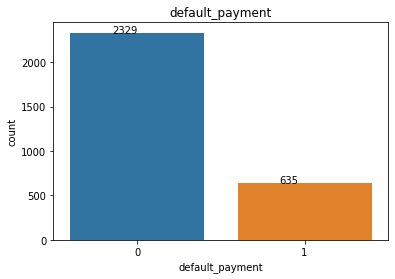

In [30]:
# Observe imbalance data
ax = sns.countplot(x="default_payment", data=df)
plt.title("default_payment")

for p in ax.patches: #Add data label
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

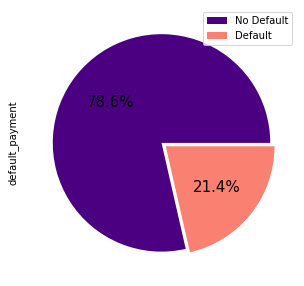

In [31]:
# distribution of data from the 'default_payment'/ target column
plt.figure(figsize=(7,5))

df['default_payment'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['indigo','salmon'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['No Default', 'Default'])
plt.show()

Terlihat bahwa sebaran datanya tidak seimbang *(imbalance)* dengan kategori orang yang tidak dapat menggunakan kartu kredit karena dinyatakan telat membayar tagihan kredit `1` hanya sekitar **21.42%** yaitu sebanyak 635 orang dan orang yang dapat menggunakan kembali kartu kreditnya karena sudah melakukan pembayaran tagihan kredit dengan tepat waktu `0` sekitar **78.58%** yaitu sebanyak 2.329 orang.

## Univariate analysis

Pada bagian ini Saya ingin melihat distribusi data dari:
- limit_balance
- gender
- education_level
- marital_status
- age
- Repayment Status (PAY_X)
- Amount of Bill Statement (bill_amt_X)
- Amount of Previous Payment (pay_amt_X)

### limit_balance

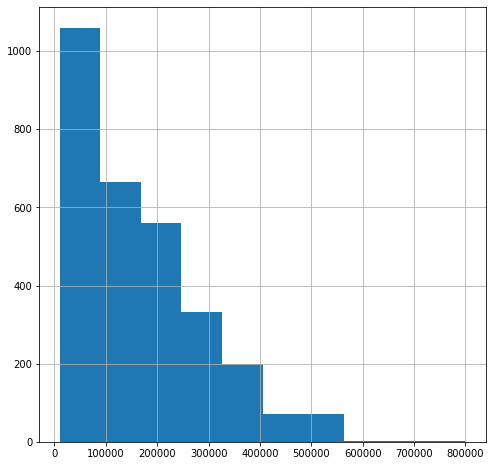

In [32]:
# distribution of data from the 'limit_balance' column
df['limit_balance'].hist(figsize=(8,8))
plt.show()

Histogram di atas menunjukkan bahwa: 
- Atribut `limit_balance` tidak simetris, yang menunjukkan data miring ke kanan. Tampak bahwa kebanyakan customer (sekitar 1.050 customer)memiliki limit kredit sekitar `NT$10.000 hingga NT$90.000`. Sedangkan customer yang memiliki limit kredit `di atas NT$550.000` sangat jarang terjadi.
- Limit kredit minimum dan maksimum masing-masing adalah 10.000 dan 800.000.

### gender

In [33]:
# number of customers per gender
df['gender'].value_counts()

2    1801
1    1163
Name: gender, dtype: int64

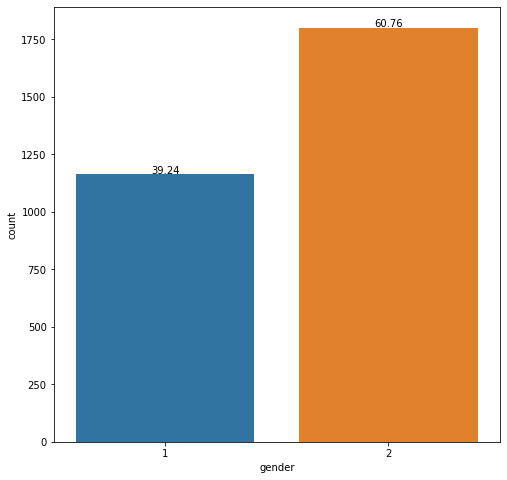

In [34]:
# distribution of data from the 'gender' column
plt.figure(figsize=(8,8))

total = float(len(df["default_payment"]))

ax = sns.countplot(x="gender", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Berdasarkan distribusi di atas menunjukkan bahwa:
- Gender memiliki 2 kategori unik `(Male dan Female)`.
- Tetapi frekuensi kategori `Female` lebih tinggi daripada kategori `Male`.
- Distribusi menunjukkan bahwa dataset ini condong ke `Female` dengan hampir `61%` yaitu sebanyak `1.801` customer.

### education_level

In [35]:
# number of customers per education_level
df['education_level'].value_counts()

2    1400
1    1038
3     483
4      43
Name: education_level, dtype: int64

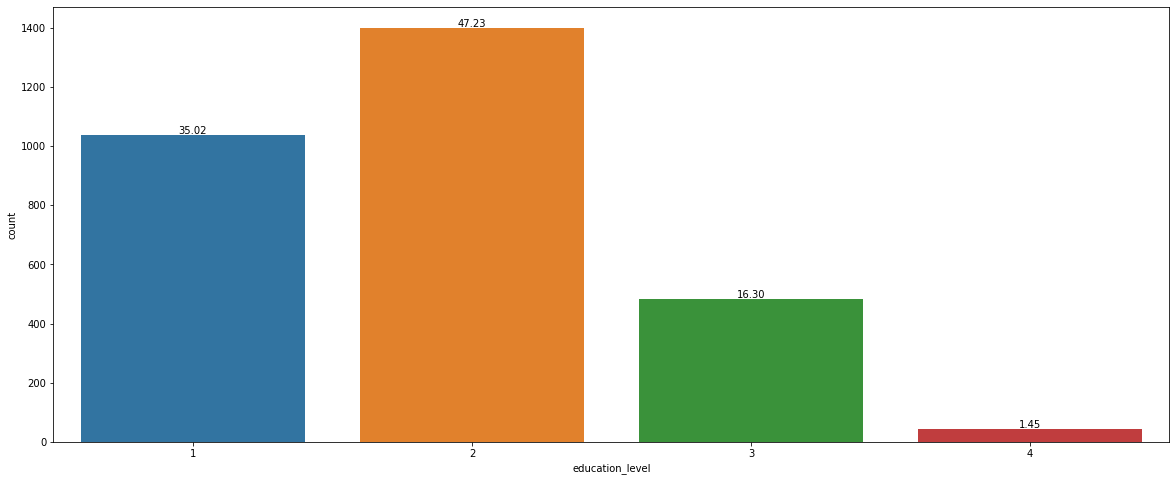

In [36]:
# distribution of data from the 'education_level' column
plt.figure(figsize=(20,8))

total = float(len(df["default_payment"]))

ax = sns.countplot(x="education_level", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Berdasarkan distribusi di atas menunjukkan bahwa:
- Ada 4 kategori unik yang ada di atribut `education_level`.
- Sebagian besar customer memiliki level pendidikan tertinggi `education_level` sebagai `university` sekitar `47,23%` yaitu sebanyak `1.400` customer.
- Pendidikan tertinggi setelah `university`, diikuti oleh `graduate_school` dan `high_school`.

### marital_status

In [37]:
# number of customers per marital_status
df['marital_status'].value_counts()

2    1594
1    1331
3      39
Name: marital_status, dtype: int64

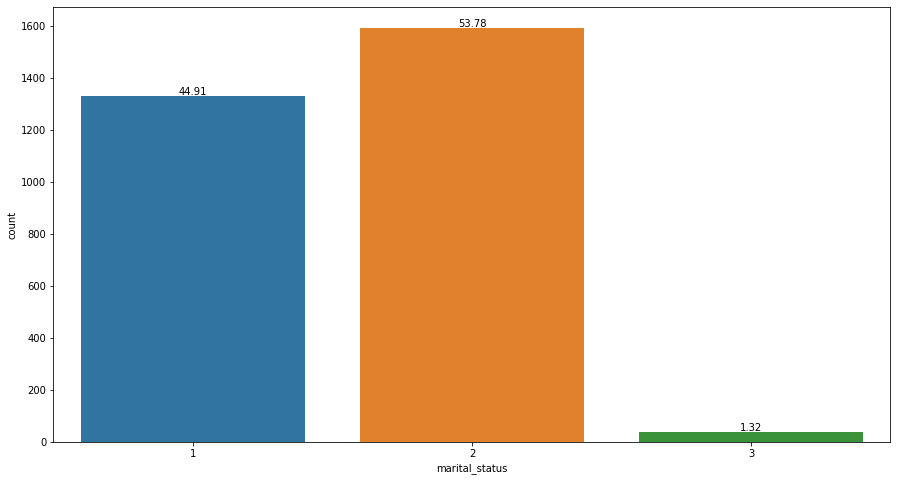

In [38]:
# distribution of data from the 'marital_status' column
plt.figure(figsize=(15,8))

total = float(len(df["default_payment"]))

ax = sns.countplot(x="marital_status", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Berdasarkan distribusi di atas menunjukkan bahwa:
- Atribut `marital_status` ini memiliki 3 kategori unik.
- Dua di antaranya mendominasi kategori lainnya yaitu `Single` sekitar `53.78%` sebanyak `1.594` customer dan `Married` sekitar `44.91%` sebanyak `1.331` customer.

### age

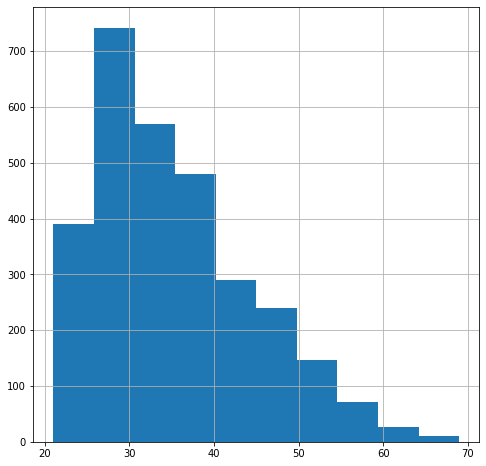

In [39]:
# distribution of data from the 'age' column
df['age'].hist(figsize=(8,8))
plt.show()

Histogram di atas menunjukkan bahwa: 
- Atribut `age` tidak simetris, yang menunjukkan data miring ke kanan. Kebanyakan customer dalam dataset ini berusia antara `25 dan 40 tahun`.
- Usia minimum dan maksimum masing-masing adalah `21 dan 69 tahun`.

### Repayment Status (pay_X)

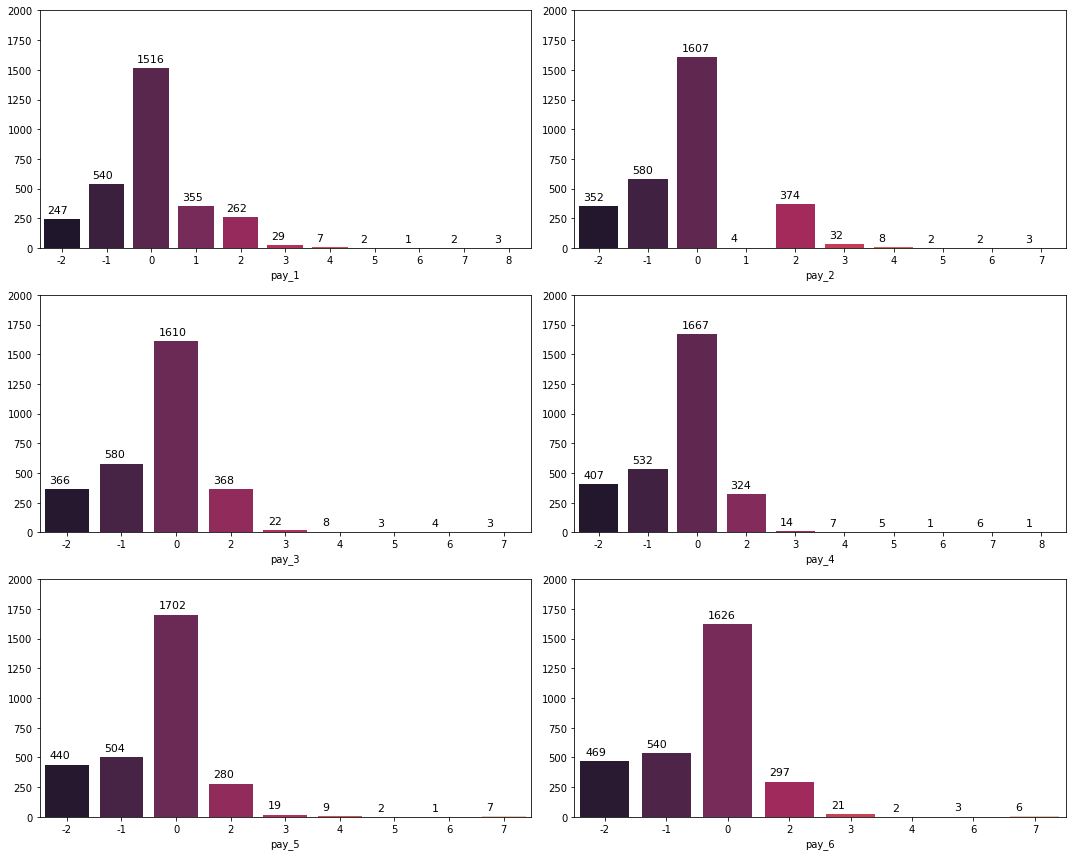

In [40]:
# distribution of data from the 'pay_X' column
pay_x_fts = ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_fts):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(df.loc[:,col], palette = 'rocket')
    plt.ylim(0,2000)
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.08, p.get_height()+50), fontsize = 11)

plt.show()

Berdasarkan distribusi di atas menunjukkan bahwa dalam dataset ini kebanyakan customer yang memiliki `repayment status` setiap bulannya di nilai `0` yang berarti customer membayar tagihan kredit sesuai dengan jatuh tempo.

### Amount of Bill Statement (bill_amt_X)

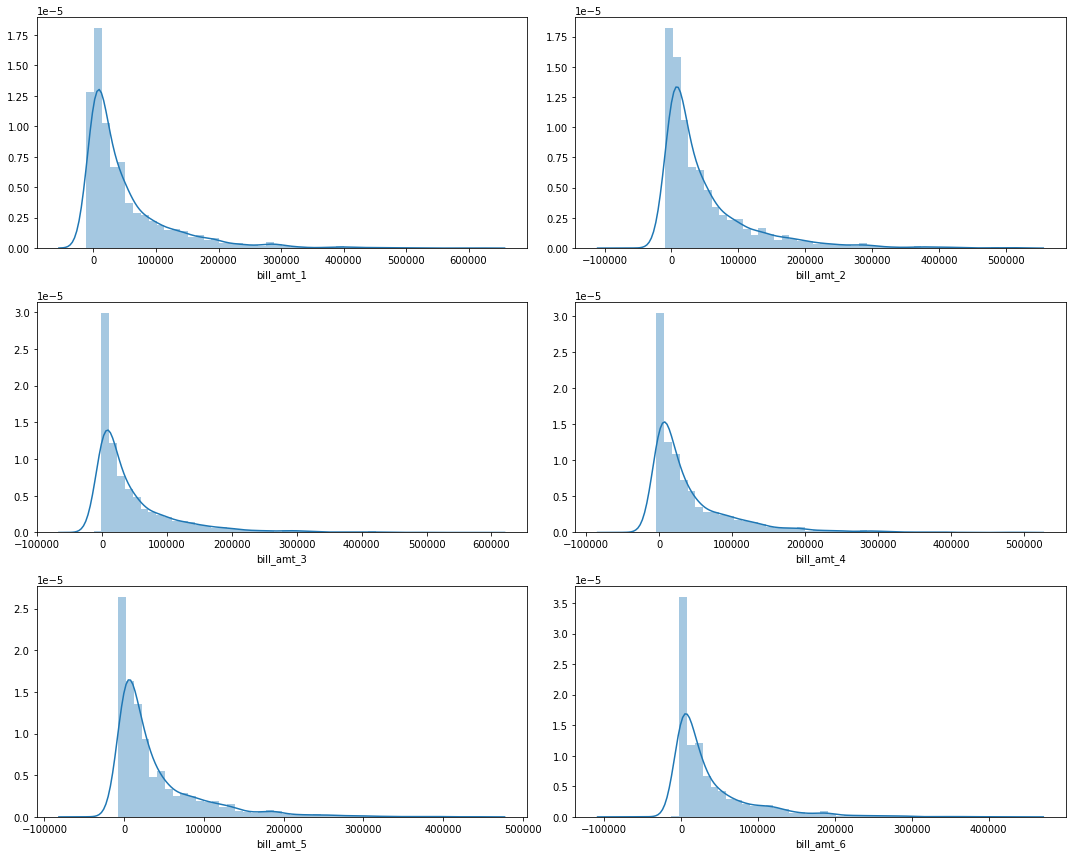

In [41]:
# distribution of data from the 'bill_amt_X' column
bill_amtx_fts = ['bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6']
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_fts):    
    plt.subplot(3,2,i + 1)
    sns.distplot(df.loc[:,col])
    plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation    
    plt.ylabel('')
    plt.tight_layout()

plt.show()

Berdasarkan distribusi di atas menunjukkan bahwa dalam dataset ini kebanyakan customer yang memiliki `Amount of Bill Statement` atau total tagihan kredit setiap bulannya `dibawah 100K`.

### Amount of Previous Payment (pay_amt_X)

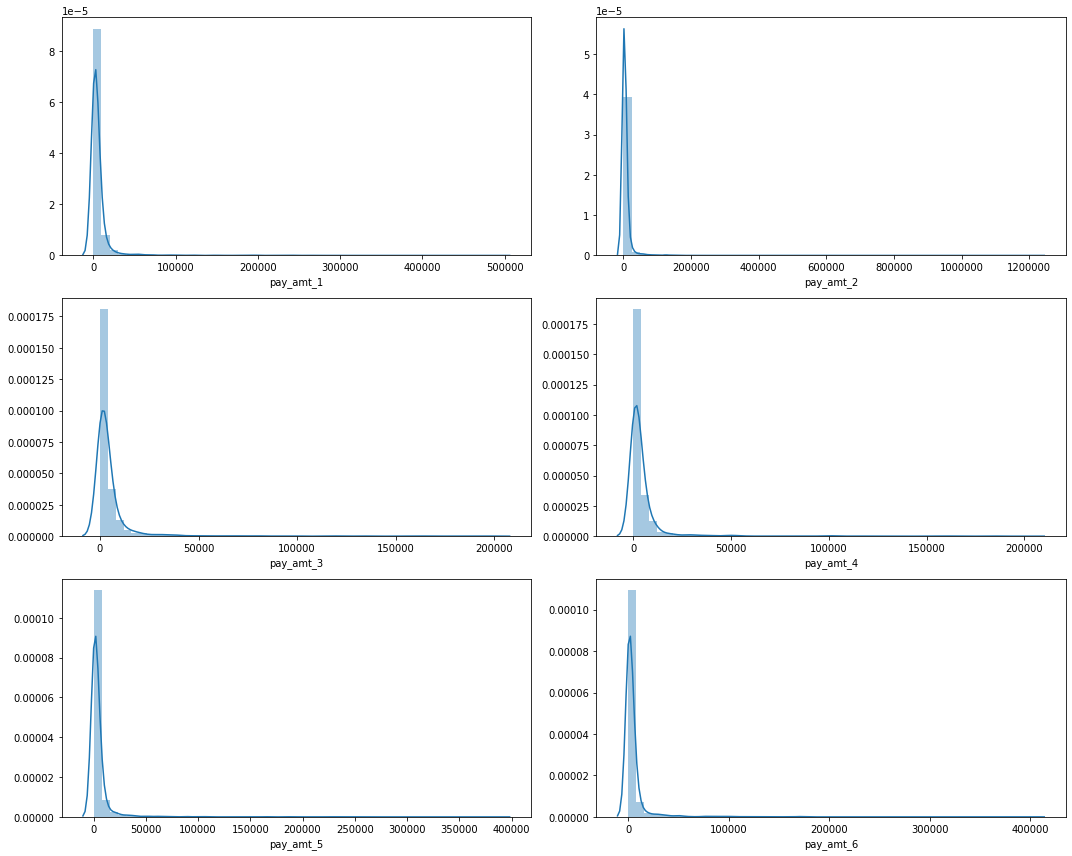

In [42]:
# distribution of data from the 'pay_amt_X' column
pay_amtx_fts = ['pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_amtx_fts):    
    plt.subplot(3,2,i + 1)
    sns.distplot(df.loc[:,col])
    plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation
    plt.ylabel('')
    plt.tight_layout()

plt.show()

Berdasarkan distribusi di atas menunjukkan bahwa dalam dataset ini kebanyakan customer yang memiliki `Amount of Previous Payment` atau total pembayaran kredit sebelumnya `dibawah 10K`.

## Bivariate analysis

Pada bagian ini Saya ingin melihat hubungan `(relationship)` data dari:
- `limit_balance` with `default_payment`
- `gender` with `default_payment`
- `education_level` with `default_payment`
- `marital_status` with `default_payment`
- `age` with `default_payment`
- Repayment Status (pay_X) with `default_payment`
- Amount of Bill Statement (bill_amt_X) with `default_payment`
- Amount of Previous Payment (pay_amt_X) with `default_payment`

### limit_balance with default_payment

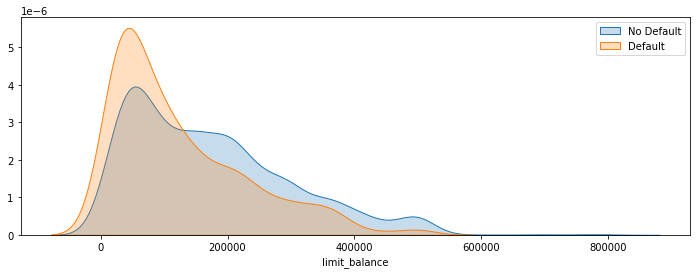

In [43]:
# Plot conditional distributions with hue mapping of a second variable
plt.figure(figsize=(12,4))

sns.kdeplot(df.loc[(df['default_payment'] == 0), 'limit_balance'], label = 'No Default', shade = True)
sns.kdeplot(df.loc[(df['default_payment'] == 1), 'limit_balance'], label = 'Default', shade = True)
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.legend()
plt.show()

Berdasarkan plot di atas menunjukkan bahwa sebagian besar pelanggan memiliki limit kredit `<=200K`, dan tampaknya kita akan menemukan konsentrasi pelanggan yang statusnya `default` yang lebih tinggi pada rentang tersebut.

Sekarang, coba kita lakukan `binning` untuk mendapatkan tampilan yang jelas:

In [44]:
# binning of limit_balance
df['LimitBin'] = pd.cut(df['limit_balance'],[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])
print(df['LimitBin'].value_counts())

(5000, 50000]        771
(200000, 300000]     522
(50000, 100000]      483
(100000, 150000]     408
(150000, 200000]     372
(300000, 400000]     258
(400000, 500000]     136
(500000, 1100000]     14
Name: LimitBin, dtype: int64


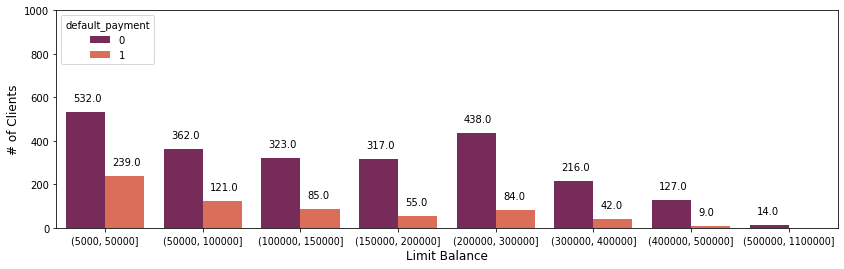

In [45]:
# plot limit_balance with default_payment
plt.figure(figsize=(14,4))

df['LimitBin'] = df['LimitBin'].astype('str')
LimitBin_order = ['(5000, 50000]', '(50000, 100000]', '(100000, 150000]', '(150000, 200000]',
                '(200000, 300000]', '(300000, 400000]', '(400000, 500000]', '(500000, 1100000]']

ax = sns.countplot(data = df, x = 'LimitBin', hue="default_payment", palette = 'rocket', order = LimitBin_order)

plt.xlabel("Limit Balance", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,1000)
ax.tick_params(axis="x", labelsize= 9.5)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+50))

plt.show()

In [46]:
# default_payment proportion groupby 'LimitBin'
df['default_payment'].groupby(df['LimitBin']).value_counts(normalize = True)

LimitBin           default_payment
(100000, 150000]   0                  0.791667
                   1                  0.208333
(150000, 200000]   0                  0.852151
                   1                  0.147849
(200000, 300000]   0                  0.839080
                   1                  0.160920
(300000, 400000]   0                  0.837209
                   1                  0.162791
(400000, 500000]   0                  0.933824
                   1                  0.066176
(5000, 50000]      0                  0.690013
                   1                  0.309987
(50000, 100000]    0                  0.749482
                   1                  0.250518
(500000, 1100000]  0                  1.000000
Name: default_payment, dtype: float64

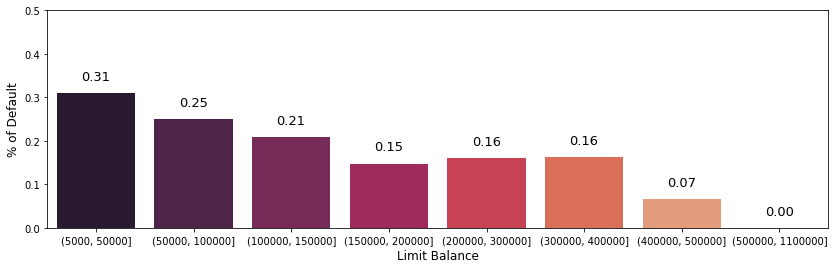

In [47]:
# plot default proportion groupby 'LimitBin'
plt.figure(figsize=(14,4))

ax = sns.barplot(x = "LimitBin", y = "default_payment", data = df, palette = 'rocket', ci = None, order = LimitBin_order)

plt.xlabel("Limit Balance", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

Sekarang cukup jelas bahwa ada tingkat customer default yang signifikan yaitu `(lebih dari 30%)` dari pelanggan dengan `limit kredit <=50K`. Kita juga dapat melihat bahwa `semakin tinggi limit kreditnya, semakin rendah kemungkinan untuk default (gagal bayar)`.

### gender with default_payment

In [48]:
# default_payment proportion groupby 'gender'
df['default_payment'].groupby(df['gender']).value_counts(normalize = True)

gender  default_payment
1       0                  0.774721
        1                  0.225279
2       0                  0.792893
        1                  0.207107
Name: default_payment, dtype: float64

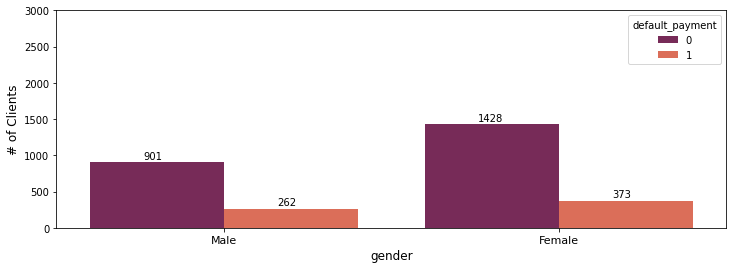

In [49]:
# plot gender with default_payment
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'gender', hue="default_payment", palette = 'rocket')

plt.xlabel("gender", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,3000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+50))

plt.show()

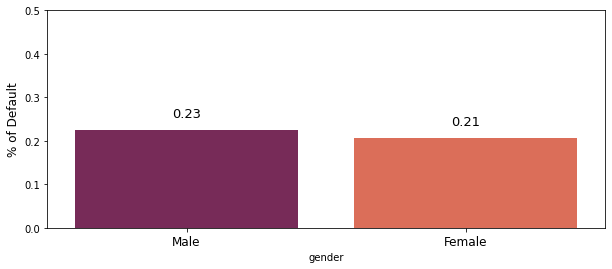

In [50]:
# plot default proportion groupby 'gender'
plt.figure(figsize=(10,4))

ax = sns.barplot(x = "gender", y = "default_payment", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=13)

plt.show()

Ada lebih banyak wanita daripada pria dalam dataset ini, namun tampaknya `pria` memiliki `peluang default (gagal bayar) yang sedikit lebih tinggi`.

#### **Hypothesis testing (to test the relationship between default_payment & gender)**

Determine a null and alternative hypothesis:

```
Null Hypothesis : There is no relationship between gender and default_payment.
Alternate Hypothesis : There is a relationship between gender and default_payment.
```

```
If Statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.
If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.
```



In [51]:
# contingency table
c_t = pd.crosstab(df['gender'].sample(frac=0.002, replace=True, random_state=2),df['default_payment'].sample(frac=0.002, replace=True, random_state=2),margins = False) 
c_t

default_payment,0,1
gender,,
1,3,1
2,2,0


In [52]:
# The result of hypothesis testing
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=1
p_value 1.0
[[3.33333333 0.66666667]
 [1.66666667 0.33333333]]
probability=0.950, critical=3.841, stat=0.000
Independent (fail to reject H0)


Dengan bantuan uji Chi-Squared hasilnya adalah kita gagal untuk menolak H0, artinya bahwa `tidak ada hubungan` antara kedua variabel kategorikal tersebut atau sederhananya tidak ada ketergantungan antara atribut `gender` dengan variabel target `default_payment`.

### education_level with default_payment

In [53]:
# default_payment proportion groupby 'education_level'
df['default_payment'].groupby(df['education_level']).value_counts(normalize = True)

education_level  default_payment
1                0                  0.829480
                 1                  0.170520
2                0                  0.755714
                 1                  0.244286
3                0                  0.766046
                 1                  0.233954
4                0                  0.930233
                 1                  0.069767
Name: default_payment, dtype: float64

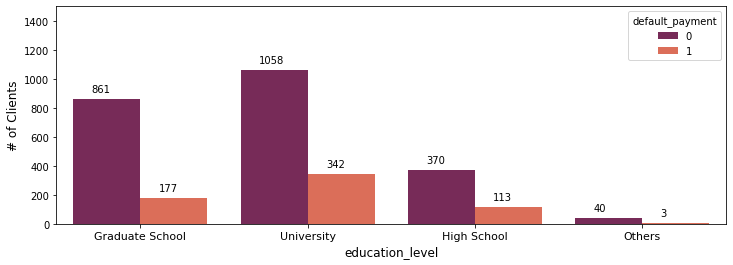

In [54]:
# plot education_level with default_payment
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'education_level', hue="default_payment", palette = 'rocket')

plt.xlabel("education_level", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,1500)
plt.xticks([0,1,2,3],['Graduate School','University','High School','Others'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+50))

plt.show()

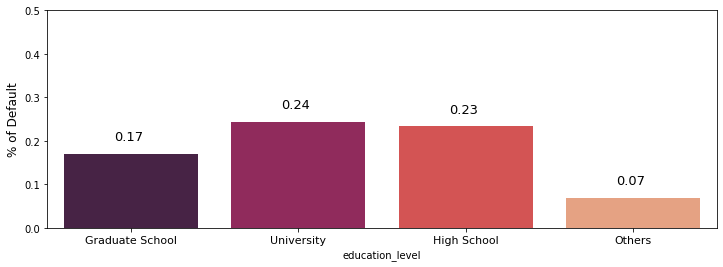

In [55]:
# plot default proportion groupby 'education_level'
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "education_level", y = "default_payment", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3],['Graduate School','University','High School','Others'], fontsize = 11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

plt.show()

Sebagian besar customer memiliki level pendidikan tertinggi `education_level` sebagai `university`, setelah `university` diikuti oleh `graduate_school` dan `high_school`.

Dengan mempertimbangkan tiga level pendidikan pertama, tampaknya pendidikan yang lebih ter-tinggi `(graduate_school)` memiliki `kemungkinan default (gagal bayar) yang lebih rendah`. Namun, `Others` (yang kita anggap berarti `tingkat pendidikan yang lebih rendah daripada high_school`), memiliki `probabilitas default yang jauh lebih rendah`.

#### **Hypothesis testing (to test the relationship between default_payment & education_level)**

Determine a null and alternative hypothesis:

```
Null Hypothesis : There is no relationship between education_level and default_payment.
Alternate Hypothesis : There is a relationship between education_level and default_payment.
```

```
If Statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.
If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.
```

In [56]:
# contingency table
c_t = pd.crosstab(df['education_level'].sample(frac=0.002, replace=True, random_state=2),df['default_payment'].sample(frac=0.002, replace=True, random_state=2),margins = False) 
c_t

default_payment,0,1
education_level,,
1,2,0
2,3,1


In [57]:
# The result of hypothesis testing
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=1
p_value 1.0
[[1.66666667 0.33333333]
 [3.33333333 0.66666667]]
probability=0.950, critical=3.841, stat=0.000
Independent (fail to reject H0)


Dengan bantuan uji Chi-Squared hasilnya bahwa kita gagal untuk menolak H0, artinya `tidak ada hubungan` antara kedua variabel kategori tersebut dan dapat disimpulkan bahwa tidak ada ketergantungan antara atribut `education_level` dengan variabel target `default_payment`.

### marital_status with default_payment

In [58]:
# default_payment proportion groupby 'marital_status'
df['default_payment'].groupby(df['marital_status']).value_counts(normalize = True)

marital_status  default_payment
1               0                  0.773103
                1                  0.226897
2               0                  0.794856
                1                  0.205144
3               0                  0.846154
                1                  0.153846
Name: default_payment, dtype: float64

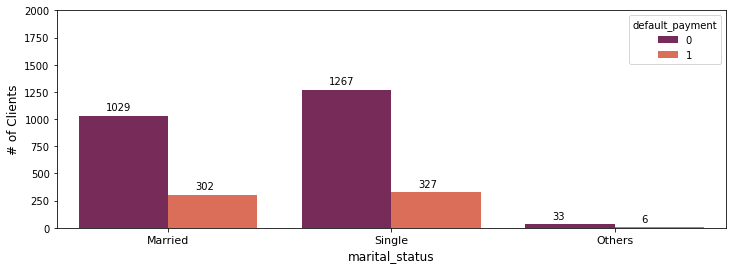

In [59]:
# plot marital_status with default_payment
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'marital_status', hue="default_payment", palette = 'rocket')

plt.xlabel("marital_status", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,2000)
plt.xticks([0,1,2],['Married', 'Single', 'Others'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+50))

plt.show()

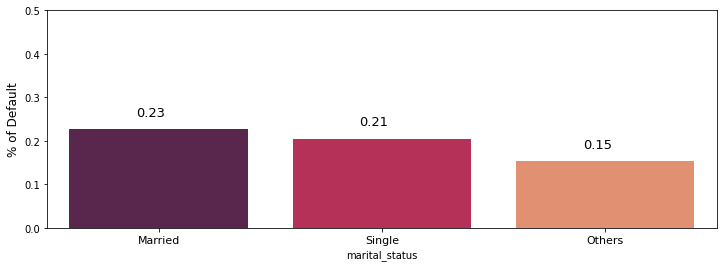

In [60]:
# plot default proportion groupby 'marital_status'
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "marital_status", y = "default_payment", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2],['Married', 'Single', 'Others'], fontsize = 11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

plt.show()

Kategori `Others` menunjukkan `probabilitas default (gagal bayar) yang lebih rendah`. Sedangkan orang yang sudah `Married` menunjukkan `lebih cenderung default (gagal bayar)`.

#### **Hypothesis testing (to test the relationship between default_payment & marital_status)**

Determine a null and alternative hypothesis:

```
Null Hypothesis : There is no relationship between marital_status and default_payment.
Alternate Hypothesis : There is a relationship between marital_status and default_payment.
```

```
If Statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.
If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.
```

In [61]:
# contingency table
c_t = pd.crosstab(df['marital_status'].sample(frac=0.002, replace=True, random_state=24),df['default_payment'].sample(frac=0.002, replace=True, random_state=24),margins = False) 
c_t

default_payment,0,1
marital_status,,
1,1,1
2,3,1


In [62]:
# The result of hypothesis testing
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=1
p_value 1.0
[[1.33333333 0.66666667]
 [2.66666667 1.33333333]]
probability=0.950, critical=3.841, stat=0.000
Independent (fail to reject H0)


Dengan bantuan uji Chi-Squared hasilnya bahwa kita gagal untuk menolak H0, artinya `tidak ada hubungan` antara kedua variabel kategori tersebut dan dapat disimpulkan bahwa tidak ada ketergantungan antara atribut `marital_status` dengan variabel target `default_payment`.

### age with default_payment

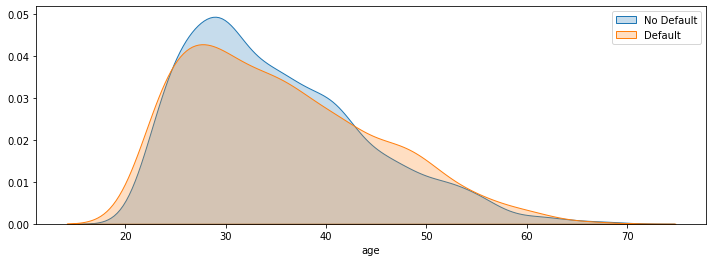

In [63]:
# Plot conditional distributions with hue mapping of a second variable
plt.figure(figsize=(12,4))

sns.kdeplot(df.loc[(df['default_payment'] == 0), 'age'], label = 'No Default', shade = True)
sns.kdeplot(df.loc[(df['default_payment'] == 1), 'age'], label = 'Default', shade = True)
plt.ylabel('')
plt.legend()
plt.show()

Kita telah mengetahui bahwa kebanyakan customer dalam dataset ini berusia antara `25 dan 40 tahun`. Namun pada rentang usia tersebut `kemungkinan customer default sedikit lebih rendah`. 

Setelah ini, Saya ingin membagi data `age` ke dalam bin dan mengecek persentase customer default di setiap kelompok umur untuk memastikannya.

In [64]:
# binning of age
df['AgeBin'] = pd.cut(df['age'],[20, 25, 30, 35, 40, 50, 60, 80])
print(df['AgeBin'].value_counts())

(25, 30]    742
(30, 35]    570
(40, 50]    567
(35, 40]    479
(20, 25]    390
(50, 60]    187
(60, 80]     29
Name: AgeBin, dtype: int64


In [65]:
# default_payment proportion groupby 'AgeBin'
df['default_payment'].groupby(df['AgeBin']).value_counts(normalize = True)

AgeBin    default_payment
(20, 25]  0                  0.746154
          1                  0.253846
(25, 30]  0                  0.811321
          1                  0.188679
(30, 35]  0                  0.796491
          1                  0.203509
(35, 40]  0                  0.797495
          1                  0.202505
(40, 50]  0                  0.760141
          1                  0.239859
(50, 60]  0                  0.780749
          1                  0.219251
(60, 80]  0                  0.793103
          1                  0.206897
Name: default_payment, dtype: float64

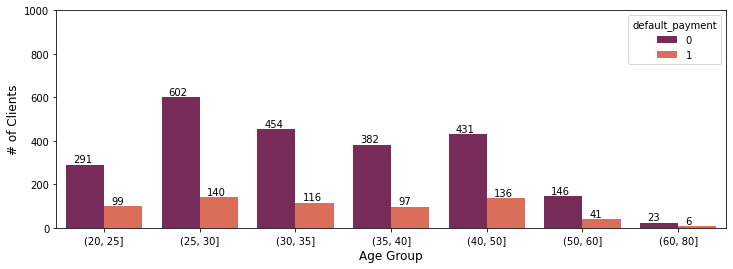

In [66]:
# plot age with default_payment
plt.figure(figsize=(12,4))

df['AgeBin'] = df['AgeBin'].astype('str')
AgeBin_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']

ax = sns.countplot(data = df, x = 'AgeBin', hue="default_payment", palette = 'rocket', order = AgeBin_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,1000)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+10))

plt.show()

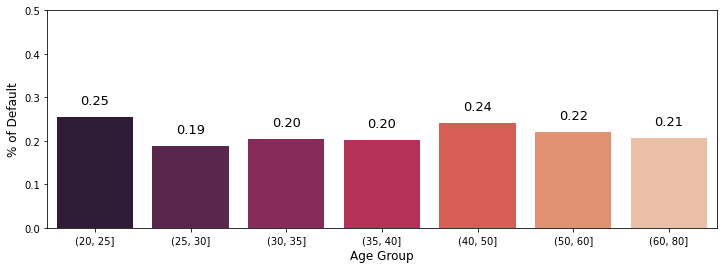

In [67]:
# plot default proportion groupby 'AgeBin'
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "AgeBin", y = "default_payment", data = df, palette = 'rocket', ci = None, order = AgeBin_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

Berdasarkan plot di atas, dapat dilihat bahwa `kemungkinan customer default terendah` ada dalam rentang umur sekitar `25-30 tahun`.Sedangkan `kemungkinan customer default yang tertinggi` terjadi pada rentang umur `20-25, 40-50 dan 50-60 tahun`.

### Repayment Status (pay_X) with default_payment

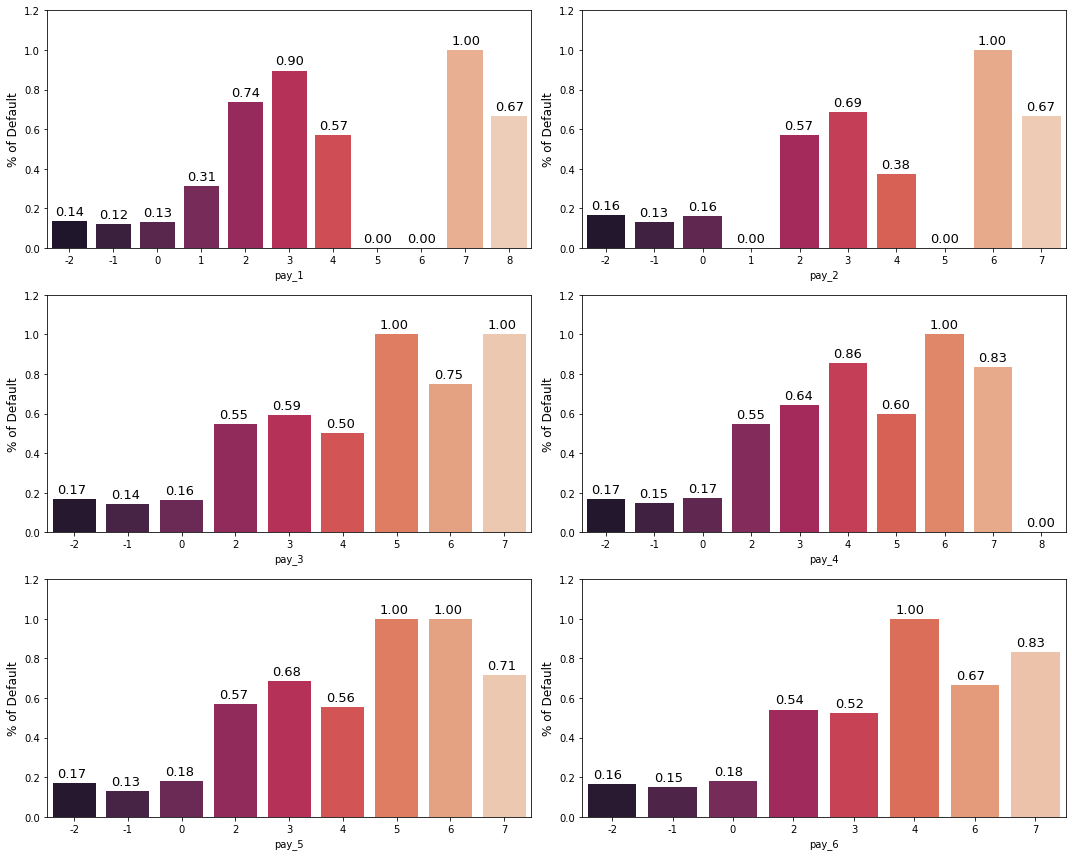

In [68]:
# plot default proportion groupby Repayment Status (pay_X)
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_fts):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "default_payment", data = df, palette = 'rocket', ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,1.2)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.09, p.get_height()+0.03),fontsize=13)

plt.show()

Dalam dataset ini, sesuai yang kita tahu sebelumnya bahwa ada lebih banyak customer yang memiliki `repayment status` di angka `0` artinya membayar tagihan kredit sesuai jatuh tempo, namun tampaknya jika customer memiliki `repayment status` di angka `1 hingga 8` itu memiliki `peluang default (gagal bayar) yang sangat tinggi`, yang artinya dalam rentang tersebut berarti customer menunggak pembayaran tagihan kredit.

### Amount of Bill Statement (bill_amt_X) with default_payment

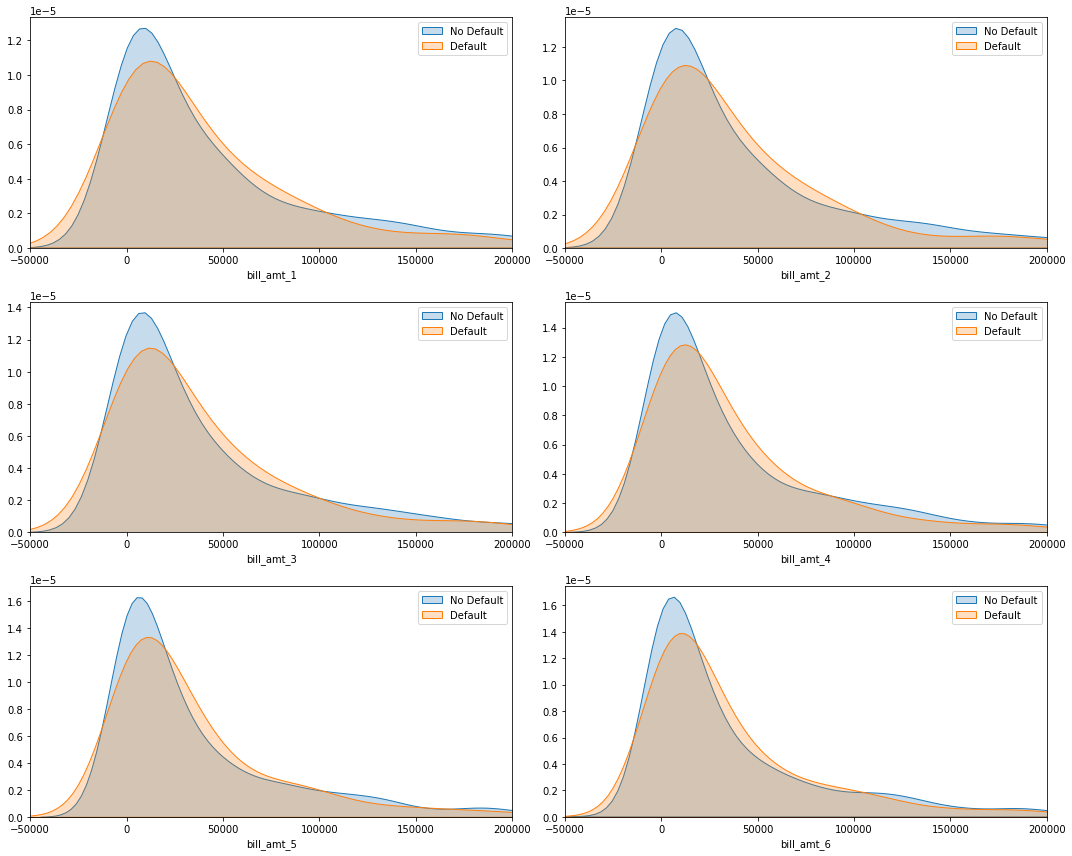

In [69]:
# Plot conditional distributions with hue mapping of a second variable
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_fts):    
    plt.subplot(3,2,i + 1)    
    sns.kdeplot(df.loc[(df['default_payment'] == 0), col], label = 'No Default', shade = True)
    sns.kdeplot(df.loc[(df['default_payment'] == 1), col], label = 'Default', shade = True)
    plt.xlim(-50000,200000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

Berdasarkan plot di atas menunjukkan bahwa sebagian besar pelanggan memiliki total tagihan kredit `<=50K`, dan tampaknya kita akan menemukan konsentrasi pelanggan yang statusnya `default` pada total tagihan kredit sekitar nilai `dibawah 0` atau dalam rentang `25K-100K`.

Sekarang, coba kita lakukan `binning` untuk mendapatkan tampilan yang jelas:

In [70]:
# duplicate 'bill_amt_X' data
df['bill_amt_1_bin'] = df['bill_amt_1'].copy()
df['bill_amt_2_bin'] = df['bill_amt_2'].copy()
df['bill_amt_3_bin'] = df['bill_amt_3'].copy()
df['bill_amt_4_bin'] = df['bill_amt_4'].copy()
df['bill_amt_5_bin'] = df['bill_amt_5'].copy()
df['bill_amt_6_bin'] = df['bill_amt_6'].copy()

In [71]:
# binning of 'bill_amt_X'
bill_amtx_bins = ['bill_amt_1_bin', 'bill_amt_2_bin', 'bill_amt_3_bin', 'bill_amt_4_bin', 'bill_amt_5_bin', 'bill_amt_6_bin']

for i, col in enumerate (bill_amtx_bins):
    df[col] = pd.cut(df[bill_amtx_fts[i]],[-350000,-1,0,25000, 75000, 200000, 2000000])
    print(df[col].value_counts())

(0, 25000]           1239
(25000, 75000]        773
(75000, 200000]       557
(-1, 0]               199
(200000, 2000000]     138
(-350000, -1]          58
Name: bill_amt_1_bin, dtype: int64
(0, 25000]           1238
(25000, 75000]        760
(75000, 200000]       535
(-1, 0]               232
(200000, 2000000]     140
(-350000, -1]          59
Name: bill_amt_2_bin, dtype: int64
(0, 25000]           1221
(25000, 75000]        768
(75000, 200000]       519
(-1, 0]               276
(200000, 2000000]     123
(-350000, -1]          57
Name: bill_amt_3_bin, dtype: int64
(0, 25000]           1253
(25000, 75000]        735
(75000, 200000]       512
(-1, 0]               305
(200000, 2000000]      94
(-350000, -1]          65
Name: bill_amt_4_bin, dtype: int64
(0, 25000]           1277
(25000, 75000]        707
(75000, 200000]       483
(-1, 0]               346
(200000, 2000000]      83
(-350000, -1]          68
Name: bill_amt_5_bin, dtype: int64
(0, 25000]           1293
(25000, 75000]     

In [72]:
# default_payment proportion groupby 'bill_amt_X'
for col in bill_amtx_bins:
    print(df['default_payment'].groupby(df[col]).value_counts(normalize = True))

bill_amt_1_bin     default_payment
(-350000, -1]      0                  0.913793
                   1                  0.086207
(-1, 0]            0                  0.748744
                   1                  0.251256
(0, 25000]         0                  0.784504
                   1                  0.215496
(25000, 75000]     0                  0.774903
                   1                  0.225097
(75000, 200000]    0                  0.806104
                   1                  0.193896
(200000, 2000000]  0                  0.775362
                   1                  0.224638
Name: default_payment, dtype: float64
bill_amt_2_bin     default_payment
(-350000, -1]      0                  0.864407
                   1                  0.135593
(-1, 0]            0                  0.771552
                   1                  0.228448
(0, 25000]         0                  0.788368
                   1                  0.211632
(25000, 75000]     0                  0.769737

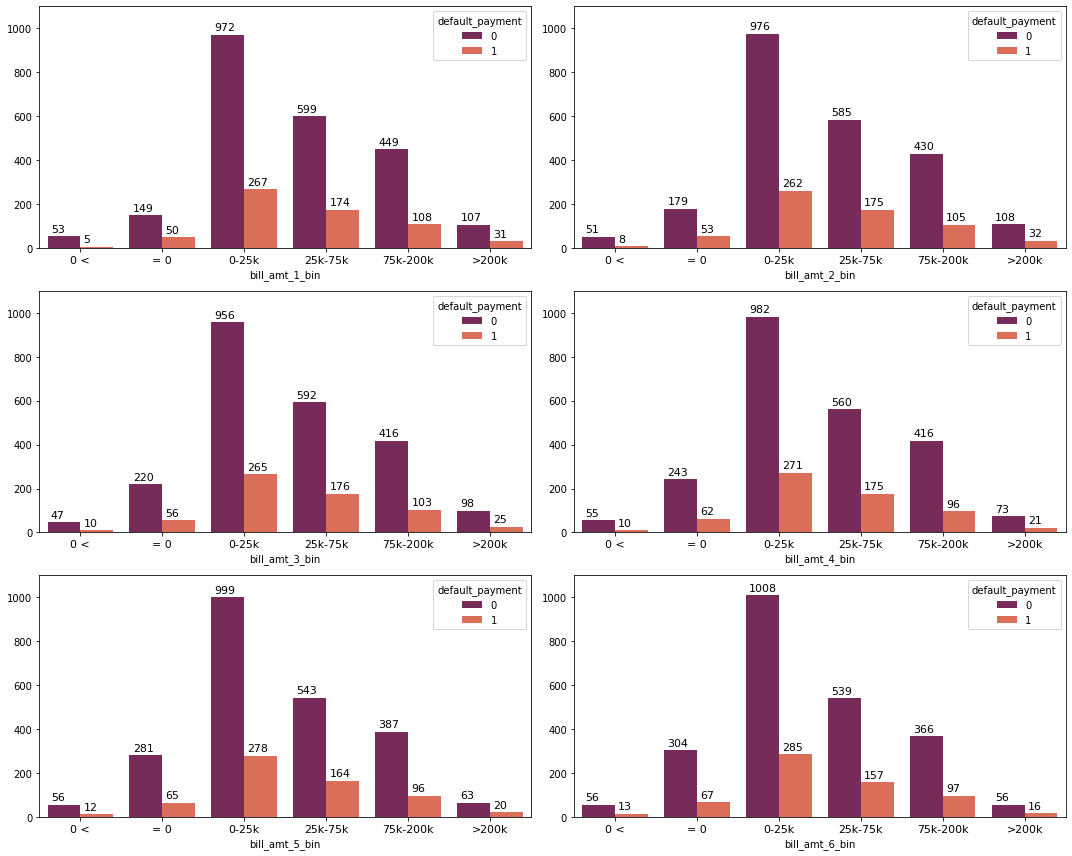

In [73]:
# plot 'bill_amt_X' with default_payment
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(data = df, x = col, hue="default_payment", palette = 'rocket')
    plt.ylim(0,1100)
    plt.ylabel('')
    plt.xticks([0,1,2,3,4,5],['0 <', '= 0', '0-25k', '25k-75k', '75k-200k', '>200k'], fontsize = 11)
    plt.tight_layout()

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.04, p.get_height()+20), fontsize = 11)    
        
plt.show()

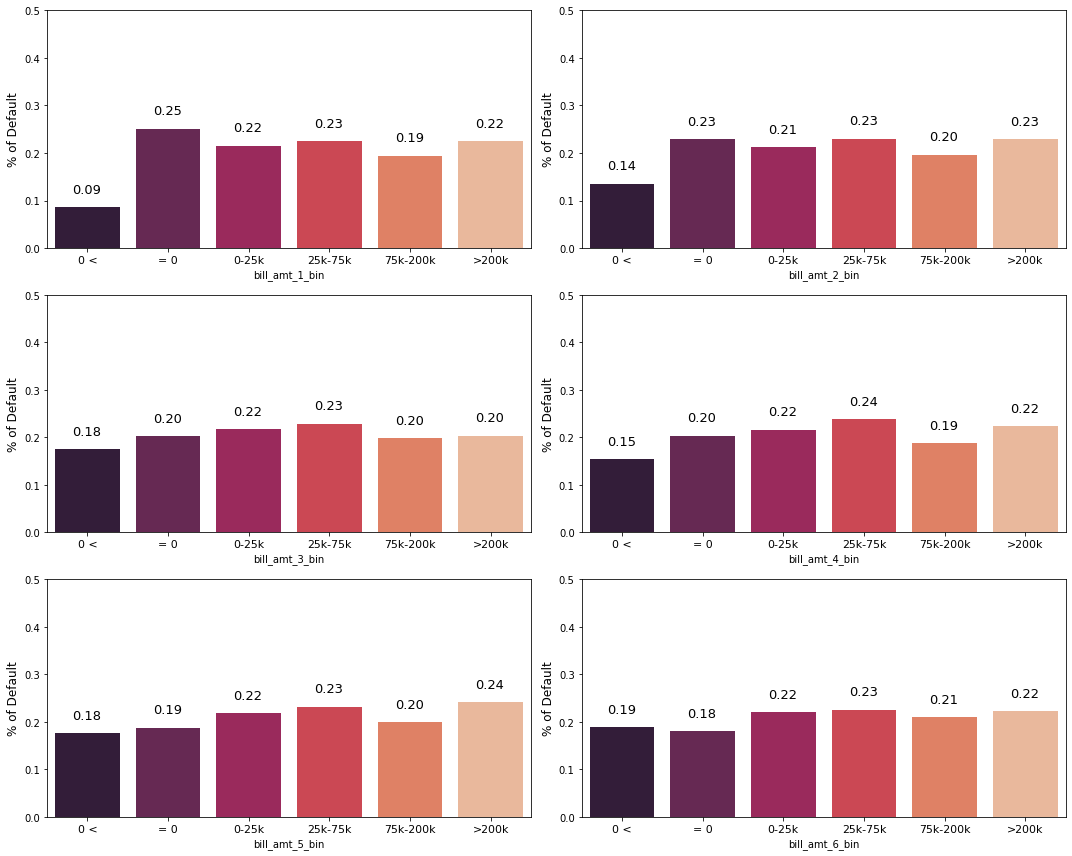

In [74]:
# plot default proportion groupby 'bill_amt_X'
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "default_payment", data = df, palette = 'rocket', ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,0.5)
    plt.xticks([0,1,2,3,4,5],['0 <', '= 0', '0-25k', '25k-75k', '75k-200k', '>200k'], fontsize = 11)    
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.21, p.get_height()+0.03),fontsize=13)

plt.show()

Berdasarkan informasi di atas didapatkan bahwa customer yang memiliki `total tagihan bernilai negatif` memiliki `kemungkinan default/gagal bayar yang lebih rendah` daripada yang lain. Customer yang menonjol untuk `berkemungkinan default/gagal bayar` sedikit lebih tinggi bagi mereka yang `tidak memiliki tagihan` atau yang total tagihannya di kategori `25K-75K`.

### Amount of Previous Payment (pay_amt_X) with default_payment

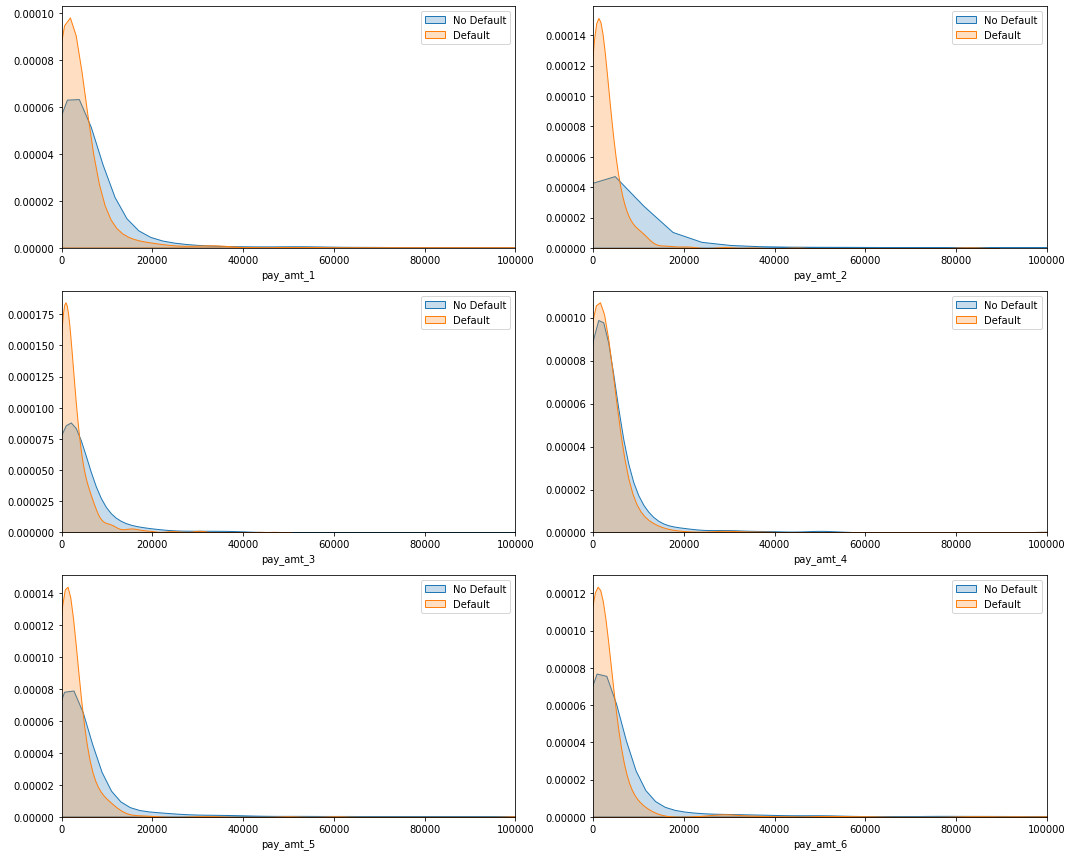

In [75]:
# Plot conditional distributions with hue mapping of a second variable
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_amtx_fts):    
    plt.subplot(3,2,i + 1)    
    sns.kdeplot(df.loc[(df['default_payment'] == 0), col], label = 'No Default', shade = True)
    sns.kdeplot(df.loc[(df['default_payment'] == 1), col], label = 'Default', shade = True)
    plt.xlim(0,100000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

Berdasarkan plot di atas menunjukkan bahwa sebagian besar pelanggan memiliki total pembayaran kredit sebelumnya sekitar `<=10K`, dan tampaknya kita akan menemukan konsentrasi pelanggan yang statusnya default yang lebih tinggi pada rentang tersebut.

Sekarang, coba kita lakukan `binning` untuk mendapatkan tampilan yang jelas:

In [76]:
# duplicate 'pay_amt_X' data
df['pay_amt_1_bin'] = df['pay_amt_1'].copy()
df['pay_amt_2_bin'] = df['pay_amt_2'].copy()
df['pay_amt_3_bin'] = df['pay_amt_3'].copy()
df['pay_amt_4_bin'] = df['pay_amt_4'].copy()
df['pay_amt_5_bin'] = df['pay_amt_5'].copy()
df['pay_amt_6_bin'] = df['pay_amt_6'].copy()

In [77]:
# binning of 'pay_amt_X'
pay_amtx_bins = ['pay_amt_1_bin', 'pay_amt_2_bin', 'pay_amt_3_bin', 'pay_amt_4_bin', 'pay_amt_5_bin', 'pay_amt_6_bin']

for i, col in enumerate (pay_amtx_bins):
    df[col] = pd.cut(df[pay_amtx_fts[i]],[-1, 0, 25000, 50000, 100000, 2000000])
    print(df[col].value_counts())

(0, 25000]           2364
(-1, 0]               494
(25000, 50000]         49
(50000, 100000]        34
(100000, 2000000]      23
Name: pay_amt_1_bin, dtype: int64
(0, 25000]           2343
(-1, 0]               515
(25000, 50000]         55
(50000, 100000]        32
(100000, 2000000]      19
Name: pay_amt_2_bin, dtype: int64
(0, 25000]           2279
(-1, 0]               581
(25000, 50000]         61
(50000, 100000]        27
(100000, 2000000]      16
Name: pay_amt_3_bin, dtype: int64
(0, 25000]           2243
(-1, 0]               632
(25000, 50000]         51
(50000, 100000]        22
(100000, 2000000]      16
Name: pay_amt_4_bin, dtype: int64
(0, 25000]           2238
(-1, 0]               637
(25000, 50000]         48
(50000, 100000]        23
(100000, 2000000]      18
Name: pay_amt_5_bin, dtype: int64
(0, 25000]           2147
(-1, 0]               695
(25000, 50000]         64
(50000, 100000]        38
(100000, 2000000]      20
Name: pay_amt_6_bin, dtype: int64


In [78]:
# default_payment proportion groupby 'pay_amt_X'
for col in pay_amtx_bins:
    print(df['default_payment'].groupby(df[col]).value_counts(normalize = True))

pay_amt_1_bin      default_payment
(-1, 0]            0                  0.645749
                   1                  0.354251
(0, 25000]         0                  0.810068
                   1                  0.189932
(25000, 50000]     0                  0.836735
                   1                  0.163265
(50000, 100000]    0                  0.970588
                   1                  0.029412
(100000, 2000000]  0                  0.913043
                   1                  0.086957
Name: default_payment, dtype: float64
pay_amt_2_bin      default_payment
(-1, 0]            0                  0.679612
                   1                  0.320388
(0, 25000]         0                  0.801963
                   1                  0.198037
(25000, 50000]     0                  0.927273
                   1                  0.072727
(50000, 100000]    0                  0.937500
                   1                  0.062500
(100000, 2000000]  0                  1.000000

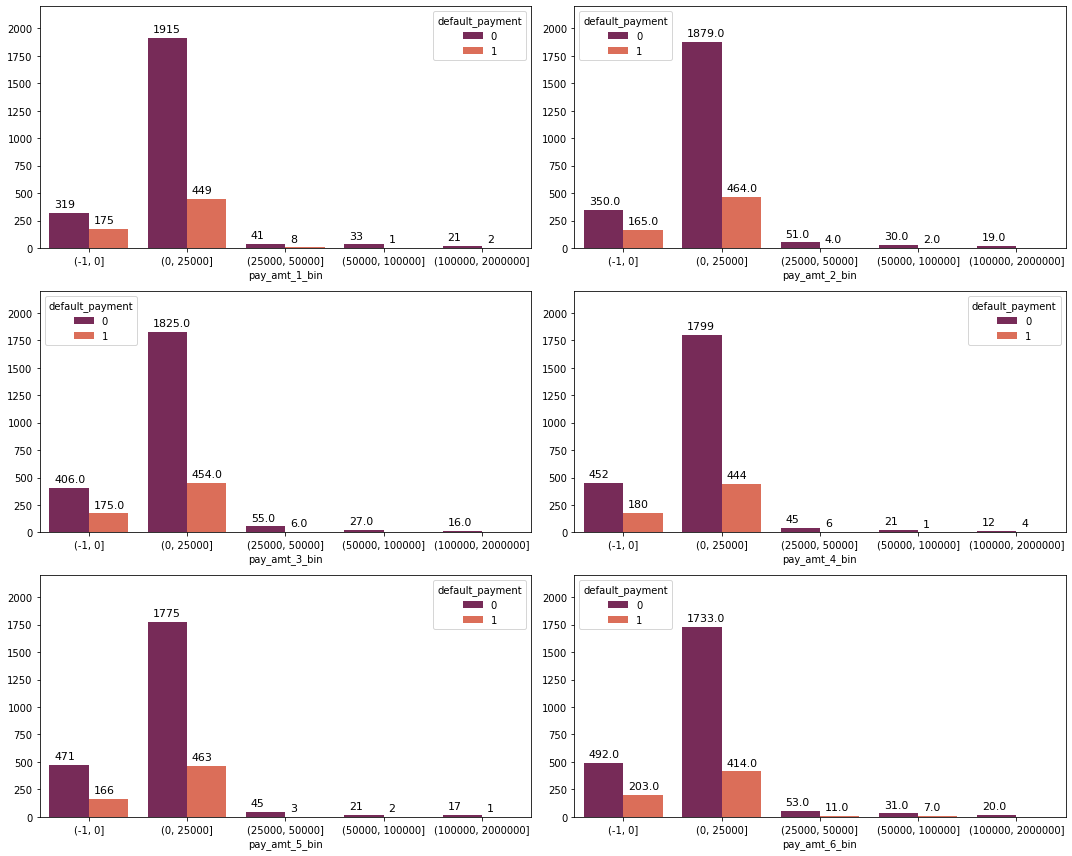

In [79]:
# plot 'pay_amt_X' with default_payment
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(data = df, x = col, hue="default_payment", palette = 'rocket')
    plt.ylim(0,2200)
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.05, p.get_height()+50), fontsize=11)    

plt.show()

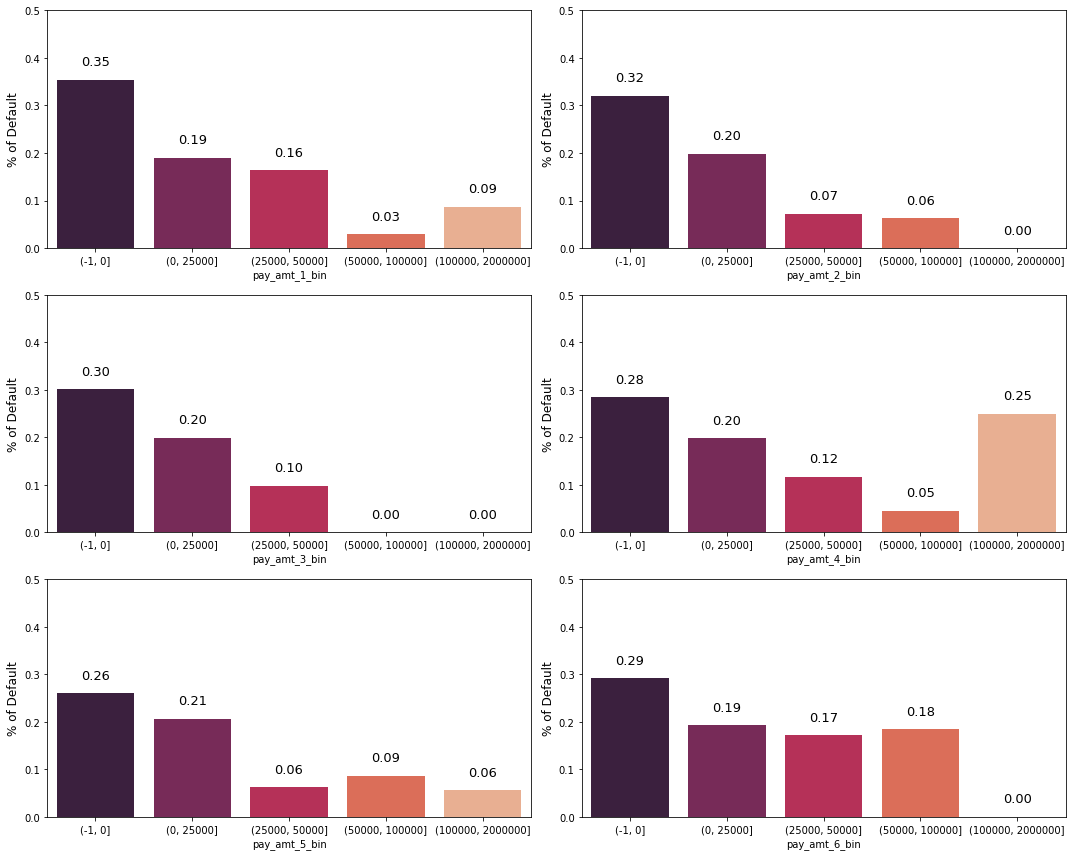

In [80]:
# plot default proportion groupby 'pay_amt_X'
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "default_payment", data = df, palette = 'rocket', ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,0.5)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

Berdasarkan informasi di atas didapatkan bahwa `customer yang tingkat default/gagal bayar tertinggi` berada diantara `mereka yang tidak membayar apa pun di bulan-bulan sebelumnya`, sedangkan `kemungkinan default rendah` berada diantara `mereka yang membayar diatas 25K NT dollar`.

## Multivariate analysis

Pada bagian ini Saya ingin melihat hubungan data dari:
- `gender` + `education_level/marital_status`
- `limit_balance` + Demographic Features

### gender + education_level/marital_status

Kita telah mengetahui bahwa laki-laki tampaknya lebih cenderung default/gagal bayar daripada perempuan. Disini, kita bisa lebih yakin dengan pernyataan tersebut dengan membandingkan dan mempertimbangkan dengan level pendidikan terakhir dan status perkawinan yang sama.

In [81]:
# default_payment proportion groupby 'gender' and 'marital_status'
df.groupby(by=['marital_status', 'gender'])['default_payment'].value_counts(normalize = True)

marital_status  gender  default_payment
1               1       0                  0.770428
                        1                  0.229572
                2       0                  0.774786
                        1                  0.225214
2               1       0                  0.781102
                        1                  0.218898
                2       0                  0.803962
                        1                  0.196038
3               1       0                  0.642857
                        1                  0.357143
                2       0                  0.960000
                        1                  0.040000
Name: default_payment, dtype: float64

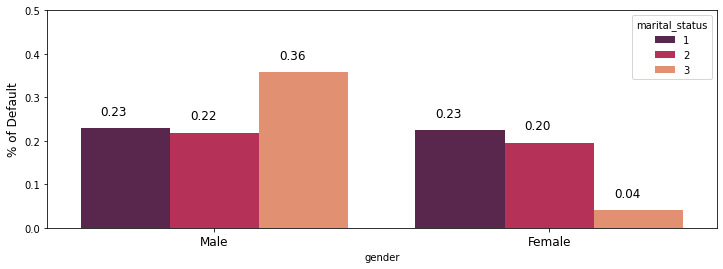

In [82]:
# plot default proportion groupby 'gender' and 'marital_status'
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "gender", y = "default_payment", hue = "marital_status", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.06, p.get_height()+0.03),fontsize=12)

plt.show()

In [83]:
# default_payment proportion groupby 'gender' and 'education_level'
df.groupby(by=['education_level', 'gender'])['default_payment'].value_counts(normalize = True)

education_level  gender  default_payment
1                1       0                  0.828431
                         1                  0.171569
                 2       0                  0.830159
                         1                  0.169841
2                1       0                  0.734317
                         1                  0.265683
                 2       0                  0.769231
                         1                  0.230769
3                1       0                  0.748663
                         1                  0.251337
                 2       0                  0.777027
                         1                  0.222973
4                1       0                  0.961538
                         1                  0.038462
                 2       0                  0.882353
                         1                  0.117647
Name: default_payment, dtype: float64

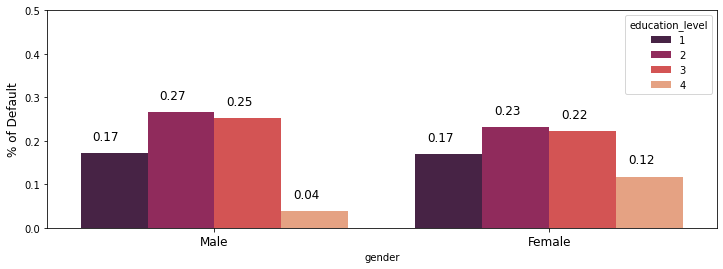

In [84]:
# plot default proportion groupby 'gender' and 'education_level'
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "gender", y = "default_payment", hue = "education_level", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.035, p.get_height()+0.03),fontsize=12)

plt.show()

Dalam setiap perbandingan, customer yang `kemungkinan default (gagal bayar)` lebih tinggi untuk `laki-laki `yang status perkawinannya `'others'` dan level pendidikan terakhirnya `'university'`.

### limit_balance + Demographic Features

In [85]:
# average of 'limit_balance' groupby 'gender'
df.groupby('gender')['limit_balance'].mean()

gender
1    158925.193465
2    166218.767351
Name: limit_balance, dtype: float64

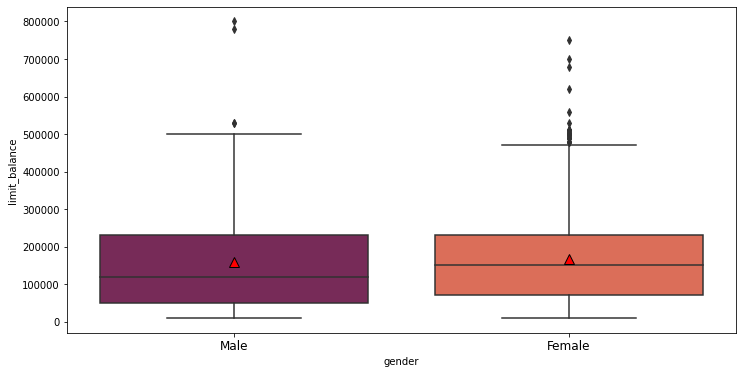

In [86]:
# boxplot 'limit_balance' + 'gender'
plt.figure(figsize=(12,6))

sns.boxplot(x = "gender", y = "limit_balance",data = df, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

plt.show()

In [87]:
# average of 'limit_balance' groupby 'education_level'
df.groupby('education_level')['limit_balance'].mean()

education_level
1    206030.828516
2    144964.285714
3    124409.937888
4    169534.883721
Name: limit_balance, dtype: float64

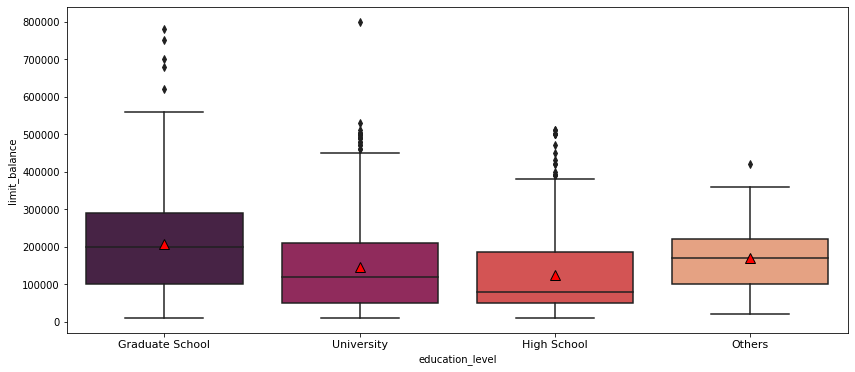

In [88]:
# boxplot 'limit_balance' + 'education_level'
plt.figure(figsize=(14,6))

sns.boxplot(x = "education_level", y = "limit_balance", data = df, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation   
plt.xticks([0,1,2,3],['Graduate School','University','High School','Others'], fontsize = 11)

plt.show()

In [89]:
# average of 'limit_balance' groupby 'marital_status'
df.groupby('marital_status')['limit_balance'].mean()

marital_status
1    179519.158527
2    151035.131744
3    115384.615385
Name: limit_balance, dtype: float64

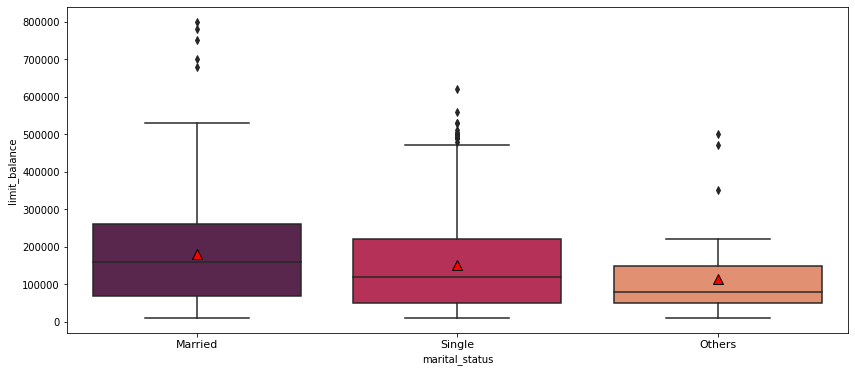

In [90]:
# boxplot 'limit_balance' + 'marital_status'
plt.figure(figsize=(14,6))

sns.boxplot(x = "marital_status", y = "limit_balance", data = df, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xticks([0,1,2],['Married', 'Single', 'Others'], fontsize = 11)

plt.show()

In [91]:
# average of 'limit_balance' groupby 'AgeBin'
df.groupby('AgeBin')['limit_balance'].mean()

AgeBin
(20, 25]     70410.256410
(25, 30]    164407.008086
(30, 35]    194017.543860
(35, 40]    193382.045929
(40, 50]    171111.111111
(50, 60]    155882.352941
(60, 80]    184482.758621
Name: limit_balance, dtype: float64

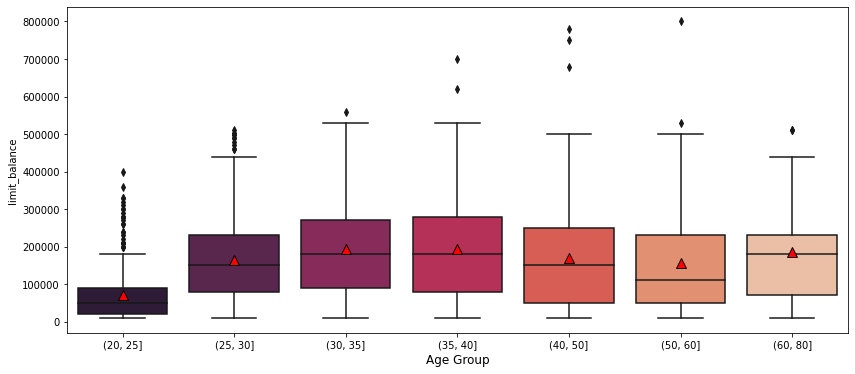

In [92]:
# boxplot 'limit_balance' + 'AgeBin'
plt.figure(figsize=(14,6))

sns.boxplot(x = "AgeBin", y = "limit_balance",data = df, palette = 'rocket', order = AgeBin_order, showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xlabel("Age Group", fontsize= 12)

plt.show()

Secara keseluruhan, limit kredit yang ditawarkan tampaknya sesuai dengan kemampuan membayar tepat waktu dalam setiap kategori. Semakin mampu customer membayar tepat waktu, kemungkinan limit kredit yang diberikan juga semakin tinggi. Semakin rendah limit kredit customer, maka kemungkinan besar customer itu default (gagal bayar).

Berdasarkan boxplot dari setiap kategori terhadap `limit_balance` di atas, kita mendapatkan informasi bahwa `kemungkinan customer default (gagal bayar) pada customer `yang berjenis kelamin `male`, level pendidikan tertinggi `high_school`, status perkawinan `others` dan rentang umurnya `20-25 tahun`.

Sekarang, kita dapat menganalisis hubungan antara `limit_balance` dan kombinasi dua fitur demografis untuk melihat apakah kita dapat menemukan sesuatu yang berbeda. Setelah ini, Saya hanya akan memplot fitur `gender` yang digabungkan dengan fitur demografis lainnya.

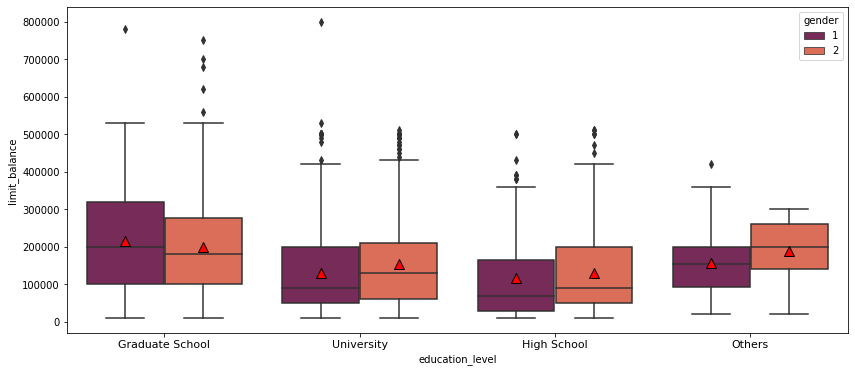

In [93]:
# boxplot 'limit_balance' + 'education_level' + 'gender'
plt.figure(figsize=(14,6))

sns.boxplot(x = "education_level", y = "limit_balance", hue = 'gender', data = df, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation   
plt.xticks([0,1,2,3],['Graduate School','University','High School','Others'], fontsize = 11)

plt.show()

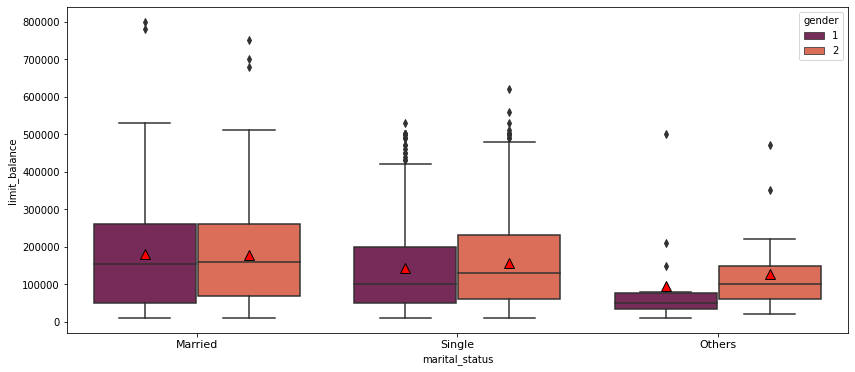

In [94]:
# boxplot 'limit_balance' + 'marital_status' + 'gender'
plt.figure(figsize=(14,6))

sns.boxplot(x = "marital_status", y = "limit_balance", hue = 'gender', data = df, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xticks([0,1,2],['Married', 'Single', 'Others'], fontsize = 11)

plt.show()

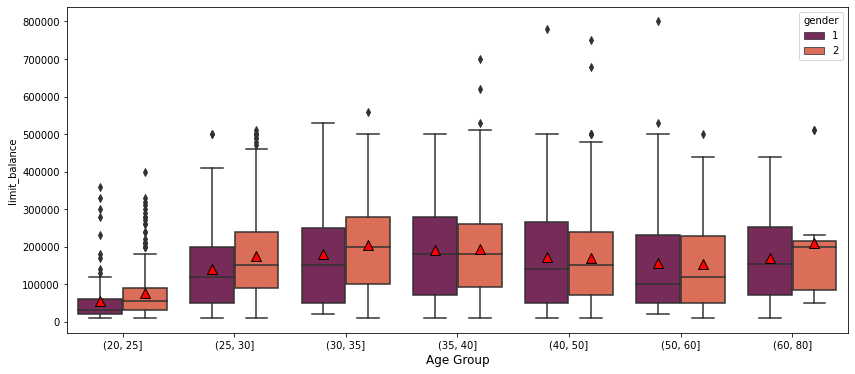

In [95]:
# boxplot 'limit_balance' + 'AgeBin' + 'gender'
plt.figure(figsize=(14,6))

sns.boxplot(x = "AgeBin", y = "limit_balance", hue = 'gender', data = df, palette = 'rocket', order = AgeBin_order, showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xlabel("Age Group", fontsize= 12)

plt.show()

Kita telah mengetahui sebelumnya bahwa rata-rata limit kredit yang diberikan untuk wanita sedikit lebih tinggi daripada pria. Pernyataan itu masih berlaku untuk beberapa kombinasi kategori, kecuali di antara customer yang:
- Memiliki level pendidikan tertinggi `graduate_school`
- Status pernikahan `married`
- Berusia `35-40 tahun`.

## Statistical analysis

In [99]:
# For statistical analysis
import scipy.stats as stats
# from scipy.stats import mannwhitneyu
from prettytable import PrettyTable
import scipy

In [100]:
# Uji chi-square antara data kategorikal dengan kolom target 'default_payment'
t = PrettyTable(['Column Name', 'P Values', 'Interpretation'])
for col in df.select_dtypes([np.int64,np.float64]).drop("default_payment",axis=1).columns :
    tab = pd.crosstab(df[col],df['default_payment'],margins = False)
    stat, p, dof, expected = scipy.stats.chi2_contingency(tab)
    if p<0.05:
        cm = 'Significant'
    else:
        cm = 'Not Significant'
    t.add_row([col,p,cm ])
print(t)

+-----------------+------------------------+-----------------+
|   Column Name   |        P Values        |  Interpretation |
+-----------------+------------------------+-----------------+
|  limit_balance  | 5.909227212291477e-10  |   Significant   |
|      gender     |  0.25782081791921546   | Not Significant |
| education_level | 1.0808923694602906e-05 |   Significant   |
|  marital_status |  0.23515167180748936   | Not Significant |
|       age       |  0.17762288014710254   | Not Significant |
|      pay_1      | 1.556692201428874e-131 |   Significant   |
|      pay_2      | 5.829611638362242e-79  |   Significant   |
|      pay_3      | 2.0928589200532856e-68 |   Significant   |
|      pay_4      | 5.1684799843466086e-61 |   Significant   |
|      pay_5      | 1.7522473441424544e-60 |   Significant   |
|      pay_6      | 1.164490951196713e-51  |   Significant   |
|    bill_amt_1   |   0.6452453471762543   | Not Significant |
|    bill_amt_2   |  0.41464756934223046   | Not Signif

Berdasarkan informasi di atas, kita mengetahui bahwa variabel yang mempunyai hubungan signifikan dengan target yaitu:
1. limit_balance
2. education_level
3. pay_1
4. pay_2
5. pay_3
6. pay_4
7. pay_5
8. pay_6

# v. Feature Engineering

>Bagian ini berisi proses penyiapan data untuk proses pelatihan model.

Feature Engineering yang dilakukan adalah:

1. Mengambil data untuk model inference
2. Memisahkan antara X (Features) and y (Target)
3. Memisahkan antara Train-Set dan Test-Set
4. Feature Selection analysis
5. Mendeteksi dan Handling data Outlier
6. Handling Missing Values
7. Memisahkan antara kolom Numerikal dan kolom Kategorikal
8. Feature Scaling
9. Handling Imbalanced Dataset using SMOTENC
10. Final Feature Selection
11. Feature Encoding
12. Menggabungkan (concate) kolom Numerikal dan kolom Kategorikal (Balanced Data)

## Mengambil data untuk Model Inference

In [101]:
# Retrieving sample data for Model Inference

df_inf = df.sample(10, random_state=10)
df_inf

,limit_balance,gender,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3_bin,bill_amt_4_bin,bill_amt_5_bin,bill_amt_6_bin,pay_amt_1_bin,pay_amt_2_bin,pay_amt_3_bin,pay_amt_4_bin,pay_amt_5_bin,pay_amt_6_bin
2424,240000,2,1,2,25,1,-1,-1,-1,-1,...,"(-1, 0]","(0, 25000]","(-1, 0]","(-1, 0]","(0, 25000]","(-1, 0]","(0, 25000]","(-1, 0]","(-1, 0]","(0, 25000]"
2556,170000,2,1,2,42,-1,-1,-1,-1,-1,...,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(-1, 0]"
1442,30000,1,3,2,31,0,0,0,0,0,...,"(25000, 75000]","(25000, 75000]","(-1, 0]","(-1, 0]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(-1, 0]"
1873,500000,1,1,1,46,-2,-2,-2,-2,-2,...,"(0, 25000]","(0, 25000]","(-1, 0]","(-1, 0]","(-1, 0]","(0, 25000]","(0, 25000]","(-1, 0]","(-1, 0]","(-1, 0]"
1561,100000,1,2,1,46,2,2,2,0,0,...,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
934,230000,2,2,1,32,0,0,0,0,0,...,"(25000, 75000]","(25000, 75000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
2263,260000,1,1,1,43,1,-1,2,0,-1,...,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
1013,390000,2,1,2,30,0,0,0,0,0,...,"(25000, 75000]","(25000, 75000]","(25000, 75000]","(25000, 75000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
913,230000,2,3,2,47,0,0,0,0,0,...,"(75000, 200000]","(75000, 200000]","(75000, 200000]","(75000, 200000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
1242,30000,2,1,2,27,0,0,0,0,0,...,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]"


In [102]:
# Drop the Inference-Set data in the dataset

df_train_test = df.drop(df_inf.index)
df_train_test

,limit_balance,gender,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3_bin,bill_amt_4_bin,bill_amt_5_bin,bill_amt_6_bin,pay_amt_1_bin,pay_amt_2_bin,pay_amt_3_bin,pay_amt_4_bin,pay_amt_5_bin,pay_amt_6_bin
0,130000,1,1,1,45,0,0,0,0,0,...,"(25000, 75000]","(25000, 75000]","(25000, 75000]","(25000, 75000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
1,230000,1,2,1,41,0,0,0,0,0,...,"(200000, 2000000]","(200000, 2000000]","(200000, 2000000]","(75000, 200000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
2,200000,1,1,1,58,0,0,0,0,0,...,"(75000, 200000]","(75000, 200000]","(75000, 200000]","(75000, 200000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
3,500000,1,1,1,39,0,0,0,0,0,...,"(75000, 200000]","(75000, 200000]","(75000, 200000]","(200000, 2000000]","(50000, 100000]","(0, 25000]","(0, 25000]","(0, 25000]","(100000, 2000000]","(0, 25000]"
4,230000,1,1,1,48,0,0,0,0,0,...,"(75000, 200000]","(75000, 200000]","(75000, 200000]","(75000, 200000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,30000,2,3,2,50,-1,-1,2,-1,-1,...,"(0, 25000]","(0, 25000]","(-1, 0]","(-1, 0]","(0, 25000]","(-1, 0]","(0, 25000]","(-1, 0]","(-1, 0]","(-1, 0]"
2961,20000,2,1,2,25,-1,-1,-1,-1,-1,...,"(0, 25000]","(0, 25000]","(-1, 0]","(-1, 0]","(-1, 0]","(0, 25000]","(0, 25000]","(-1, 0]","(-1, 0]","(0, 25000]"
2962,280000,2,1,2,52,-1,-1,-1,-1,-2,...,"(0, 25000]","(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]","(0, 25000]","(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]"
2963,360000,2,2,2,26,-1,-1,-1,-1,-2,...,"(0, 25000]","(-1, 0]","(-1, 0]","(-1, 0]","(0, 25000]","(0, 25000]","(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]"


In [103]:
# Reset index to minimize errors

df_train_test.reset_index(drop = True, inplace = True)
df_inf.reset_index(drop = True, inplace = True)
df_inf

,limit_balance,gender,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3_bin,bill_amt_4_bin,bill_amt_5_bin,bill_amt_6_bin,pay_amt_1_bin,pay_amt_2_bin,pay_amt_3_bin,pay_amt_4_bin,pay_amt_5_bin,pay_amt_6_bin
0,240000,2,1,2,25,1,-1,-1,-1,-1,...,"(-1, 0]","(0, 25000]","(-1, 0]","(-1, 0]","(0, 25000]","(-1, 0]","(0, 25000]","(-1, 0]","(-1, 0]","(0, 25000]"
1,170000,2,1,2,42,-1,-1,-1,-1,-1,...,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(-1, 0]"
2,30000,1,3,2,31,0,0,0,0,0,...,"(25000, 75000]","(25000, 75000]","(-1, 0]","(-1, 0]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(-1, 0]"
3,500000,1,1,1,46,-2,-2,-2,-2,-2,...,"(0, 25000]","(0, 25000]","(-1, 0]","(-1, 0]","(-1, 0]","(0, 25000]","(0, 25000]","(-1, 0]","(-1, 0]","(-1, 0]"
4,100000,1,2,1,46,2,2,2,0,0,...,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
5,230000,2,2,1,32,0,0,0,0,0,...,"(25000, 75000]","(25000, 75000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
6,260000,1,1,1,43,1,-1,2,0,-1,...,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
7,390000,2,1,2,30,0,0,0,0,0,...,"(25000, 75000]","(25000, 75000]","(25000, 75000]","(25000, 75000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
8,230000,2,3,2,47,0,0,0,0,0,...,"(75000, 200000]","(75000, 200000]","(75000, 200000]","(75000, 200000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
9,30000,2,1,2,27,0,0,0,0,0,...,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]"


Dari dataframe di atas tampaknya kolom bertambah karena hasil binning yang sebelumnya dilakukan pada proses EDA. Karena kolom-kolom itu hanya digunakan untuk membantu proses EDA dan tidak digunakan dalam model, maka setelah ini Saya akan drop kolom-kolom tersebut.

In [104]:
# create a new variable containing columns to drop
drop_col = df_inf[['LimitBin', 'AgeBin', 'bill_amt_1_bin', 'bill_amt_2_bin',
                    'bill_amt_3_bin', 'bill_amt_4_bin', 'bill_amt_5_bin',
                    'bill_amt_6_bin', 'pay_amt_1_bin', 'pay_amt_2_bin',
                    'pay_amt_3_bin', 'pay_amt_4_bin', 'pay_amt_5_bin', 'pay_amt_6_bin']]   

# drop columns in df_inf and df_train_test which are in `drop_col`
df_inf.drop(drop_col, axis=1, inplace=True)
df_train_test.drop(drop_col, axis=1, inplace=True)
df_inf

,limit_balance,gender,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment
0,240000,2,1,2,25,1,-1,-1,-1,-1,...,2417,0,0,587,0,2417,0,0,7642,0
1,170000,2,1,2,42,-1,-1,-1,-1,-1,...,316,948,632,316,316,316,948,0,0,0
2,30000,1,3,2,31,0,0,0,0,0,...,29784,0,0,1703,1200,2196,2500,0,0,1
3,500000,1,1,1,46,-2,-2,-2,-2,-2,...,1400,0,0,0,1656,1400,0,0,0,0
4,100000,1,2,1,46,2,2,2,0,0,...,18036,18446,18840,1300,0,700,700,700,800,1
5,230000,2,2,1,32,0,0,0,0,0,...,34158,22872,22592,2500,3000,3000,1500,1500,2000,1
6,260000,1,1,1,43,1,-1,2,0,-1,...,3804,5009,3035,5182,9,2998,5034,3050,2965,0
7,390000,2,1,2,30,0,0,0,0,0,...,57852,55903,53516,5000,2506,3000,2500,2000,2000,0
8,230000,2,3,2,47,0,0,0,0,0,...,94225,96616,95849,10000,5000,4000,4000,5000,4000,0
9,30000,2,1,2,27,0,0,0,0,0,...,22544,24061,23428,2000,3000,2000,2000,1000,0,1


Setelah ini, Saya akan export data inference ke dalam format csv untuk dilakukan prediksi `default_payment` kedepannya di notebook yang berbeda.

In [105]:
# Export data inference to csv
df_inf_csv = df_inf.to_csv('/content/drive/MyDrive/RMT - 018/MILESTONE 1 PHASE 1.csv', index=False)
df_inf_csv

## Memisahkan antara `X` (Features) dan `y` (Target)

In [106]:
# Splitting between `X` and `y`

X = df_train_test.drop(['default_payment'], axis=1)
y = df_train_test['default_payment']
X

,limit_balance,gender,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,130000,1,1,1,45,0,0,0,0,0,...,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291
1,230000,1,2,1,41,0,0,0,0,0,...,213058,216260,215968,174195,9405,7769,7757,8030,6549,5226
2,200000,1,1,1,58,0,0,0,0,0,...,122214,124647,126921,129167,7822,4417,4446,4597,4677,4698
3,500000,1,1,1,39,0,0,0,0,0,...,171106,174500,137406,204975,54209,4607,4603,5224,207440,7509
4,230000,1,1,1,48,0,0,0,0,0,...,165107,105508,108101,110094,7000,6607,3773,4290,4164,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,30000,2,3,2,50,-1,-1,2,-1,-1,...,940,1110,0,0,1860,0,1110,0,0,0
2950,20000,2,1,2,25,-1,-1,-1,-1,-1,...,855,640,0,0,0,855,640,0,0,2742
2951,280000,2,1,2,52,-1,-1,-1,-1,-2,...,930,0,0,0,0,930,0,0,0,0
2952,360000,2,2,2,26,-1,-1,-1,-1,-2,...,2500,0,0,0,463,2500,0,0,0,0


## Memisahkan antara Train-Set dan Test-Set

In [107]:
# Splitting between Train-Set and Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (2363, 23)
Test Size  :  (591, 23)


Berdasarkan informasi di atas, diketahui bahwa data Train-Set terdiri dari 2.363 baris dan 23 kolom. Sedangkan data Test-Set adalah 591 baris dan 23 kolom.

In [108]:
# Reset index to minimize errors

X_train.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)
X_train

,limit_balance,gender,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,160000,2,3,1,53,1,-2,-1,2,2,...,3613,2722,0,0,0,3613,0,0,0,0
1,110000,2,1,2,29,2,2,2,2,2,...,105676,106506,103591,109276,11000,3800,4000,0,8800,0
2,20000,1,2,2,44,0,-1,-1,0,0,...,19378,19961,19962,19981,203,20710,1305,696,712,860
3,360000,1,2,1,40,0,0,0,-1,0,...,43429,45895,27851,25408,10034,15011,45919,5036,5022,6010
4,150000,2,1,2,28,-1,-1,-2,-1,-1,...,500,2727,712,0,2730,500,2727,712,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,310000,2,2,1,44,-1,0,0,0,0,...,113788,106919,100656,93846,10000,56000,5000,4000,3300,5000
2359,20000,2,1,2,23,-1,-1,0,0,0,...,10130,6165,6165,6315,14000,1145,950,0,150,6000
2360,150000,2,1,2,33,0,-1,-1,-1,-1,...,1420,1141,1067,1128,237,1426,1141,1067,1200,1150
2361,100000,1,2,1,44,2,2,2,2,3,...,61749,65130,63816,65011,2800,2500,5000,0,2400,2400


Setelah ini, Saya ingin melihat apakah data yang kita punya itu dapat dipisahkan oleh garis linear atau dapat dipisahkan secara non-linear??
Disini Saya mengambil 2 fitur untuk mewakilkan visualisasinya dengan 2 dimensi yaitu fitur `pay_2` dan `pay_1`:

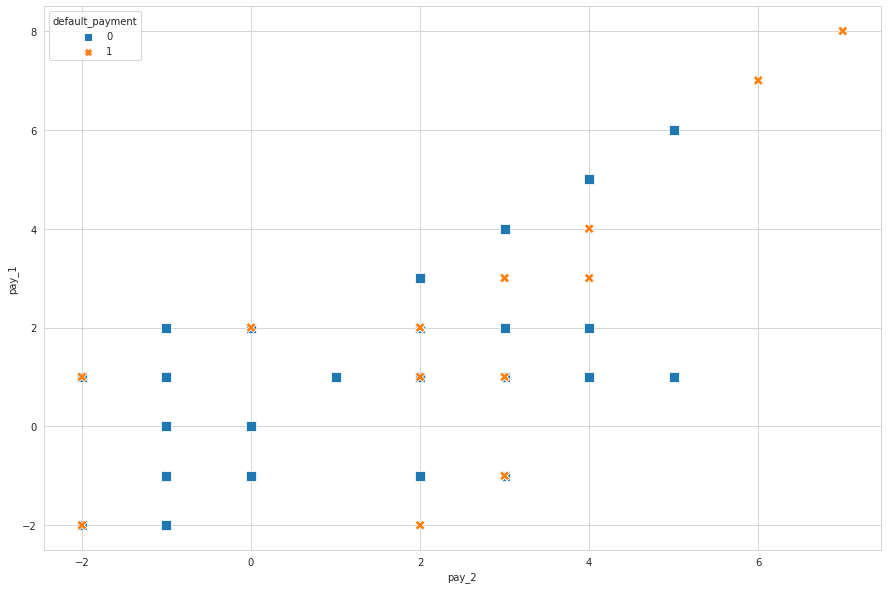

In [109]:
# Visualize Dataset

markers = {
    0: "s", 
    1: "X"
}

sns.set_style("whitegrid")
plt.figure(figsize = (15, 10))
sns.scatterplot(
    x       = 'pay_2', 
    y       = 'pay_1',
    data    = X_train,
    hue     = y_train,
    style   = y_train,
    markers = markers,
    s       = 100
);

Berdasarkan hasil visualisasi data scatterplot di atas, dapat disimpulkan bahwa data yang kita punya sebenarnya tidak dapat dipisahkan oleh garis linear, berarti untuk melakukan training model-nya nanti cocoknya menggunakan algoritma yang dapat bekerja dengan baik untuk memisahkan data non-linear.

## Feature Selection analysis

Disini Saya ingin menggabungkan data X_train dan y_train terlebih dahulu. Karena setelah ini Saya ingin mendapatkan fitur apa saja yang mempunyai korelasi dengan variabel target *default_payment*. 

Tujuannya disini adalah untuk menyeleksi fitur-fitur yang akan mengalami proses Feature Engineering (FE) lebih lanjut dan juga yang akan digunakan dalam membuat model machine learning.

In [110]:
# concate data train
data_train = pd.concat([X_train, y_train], axis=1)
data_train

,limit_balance,gender,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment
0,160000,2,3,1,53,1,-2,-1,2,2,...,2722,0,0,0,3613,0,0,0,0,0
1,110000,2,1,2,29,2,2,2,2,2,...,106506,103591,109276,11000,3800,4000,0,8800,0,1
2,20000,1,2,2,44,0,-1,-1,0,0,...,19961,19962,19981,203,20710,1305,696,712,860,0
3,360000,1,2,1,40,0,0,0,-1,0,...,45895,27851,25408,10034,15011,45919,5036,5022,6010,0
4,150000,2,1,2,28,-1,-1,-2,-1,-1,...,2727,712,0,2730,500,2727,712,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,310000,2,2,1,44,-1,0,0,0,0,...,106919,100656,93846,10000,56000,5000,4000,3300,5000,0
2359,20000,2,1,2,23,-1,-1,0,0,0,...,6165,6165,6315,14000,1145,950,0,150,6000,0
2360,150000,2,1,2,33,0,-1,-1,-1,-1,...,1141,1067,1128,237,1426,1141,1067,1200,1150,0
2361,100000,1,2,1,44,2,2,2,2,3,...,65130,63816,65011,2800,2500,5000,0,2400,2400,1


Tujuan dari project ini mengarah ke pemodelan prediktif klasifikasi dengan variabel input numerik (continuous) dan variabel kategorik yang sudah berbentuk numerik serta variabel target (output-nya) juga numerik yang merepresentasikan data kategorik (nominal). Sehingga, dalam proses menyelesi fitur dalam kasus ini, Saya menggunakan metode `Pearson’s correlation coefficient`.

### Pearson’s correlation coefficient

<AxesSubplot:>

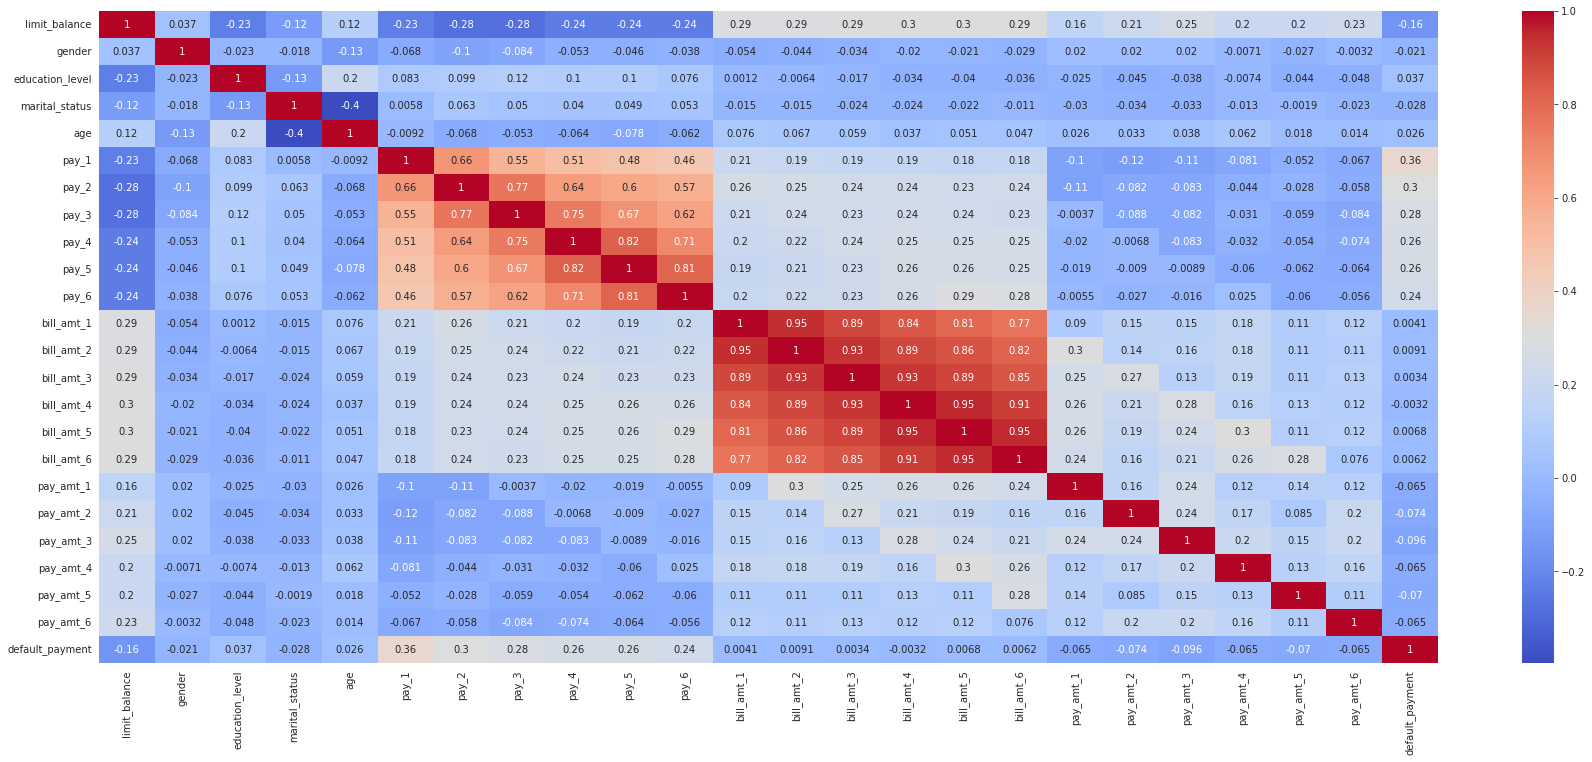

In [111]:
# correlation matrix (heatmap style)
plt.figure(figsize=(30,12))
sns.heatmap(data_train.corr(method='pearson'),annot=True,cmap="coolwarm")

<AxesSubplot:title={'center':'Correlation with Default Payment'}>

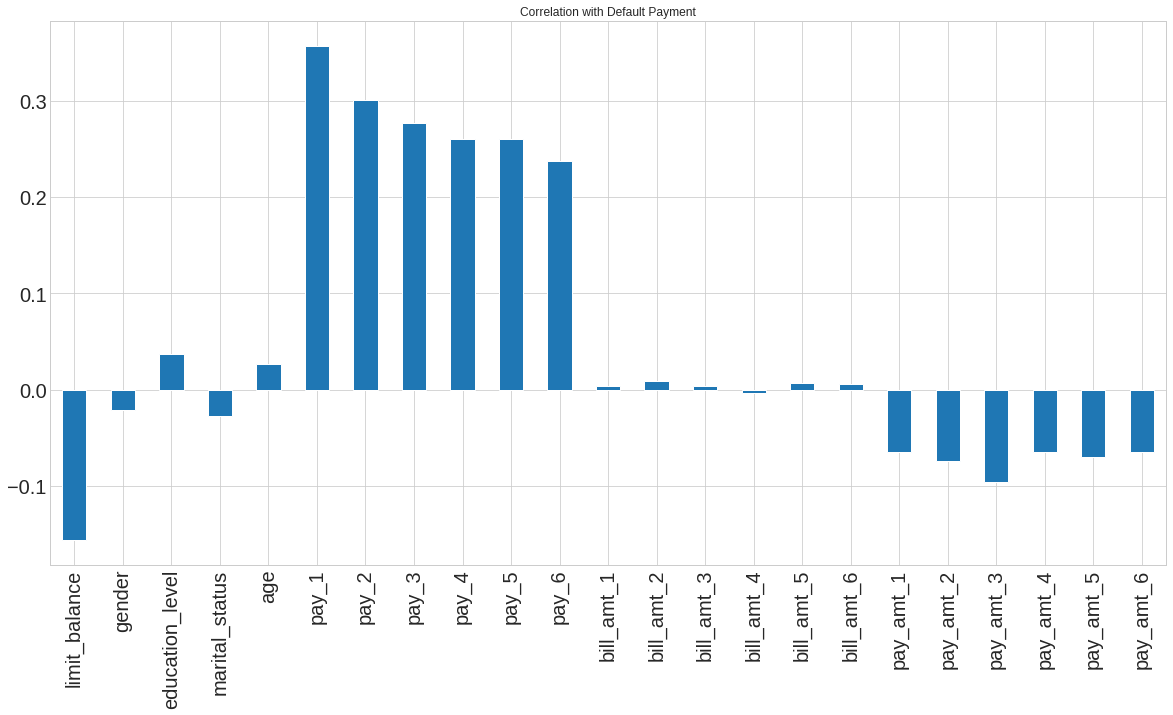

In [112]:
# check the positive and negative correlations between features and the target variable 'default_payment'
X = data_train.drop(['default_payment'],axis=1)
plt.style.use('seaborn-whitegrid')
X.corrwith(data_train['default_payment']).plot.bar(figsize = (20, 10), title = "Correlation with Default Payment", fontsize = 20,rot = 90, grid = True)

Suatu variabel dikatakan mempunyai korelasi yang positif terhadap target ketika nilai variabel tersebut mendekati nilai 1 atau sebaliknya, suatu variabel dikatakan mempunyai korelasi yang negatif terhadap target ketika nilai variabel tersebut mendekati nilai -1. Jika nilai variabel semakin mendekati 0, maka variabel tersebut semakin tidak ada korelasi terhadap target. Sehingga pada proses *final feature selection* nanti, Saya akan melakukan `drop` untuk variabel yang mendekati nilai 0. Berdasarkan heatmap di atas, nilai korelasi variabel yang mendekati 0 seperti:
1. bill_amt_1
2. bill_amt_2
3. bill_amt_3
4. bill_amt_4
5. bill_amt_5
6. bill_amt_6

Sedangkan variabel yang mempunyai korelasi kuat sampai ke cukup kuat terhadap target *default_payment* adalah:
1. pay_1
2. pay_2
3. pay_3
4. pay_4
5. pay_5
6. pay_6
7. limit_balance
8. pay_amt_1
9. pay_amt_2
10. pay_amt_3
11. pay_amt_4
12. pay_amt_5
13. pay_amt_6
14. education_level
15. age
16. marital_status
17. gender

## Mendeteksi dan Handling data Outlier

Berhubungan dengan tujuan dari project ini adalah membuat model Classification dan karena ada beberapa model yang akan kita gunakan nantinya **sangat sensitif** terhadap outlier, maka proses handling data outlier ini sangat dibutuhkan.<br>

Sebelum proses handling outlier, sebaiknya kita melakukan pendeteksian outlier untuk masing-masing variabel numerik baik yang datanya terdistribusi normal maupun yang datanya tidak terdistribusi normal *(skewed)*.

Pada saat proses ***Data Loading*** dan **EDA**, kita sudah mengetahui distribusi data dari setiap variabel numerik, yang dapat dijabarkan seperti berikut:
>Normal Distribution:<br>
1. gender
2. marital_status

>Skewed Distribution:<br>
1. limit_balance
2. education_level
3. age
4. pay_1
5. pay_2
6. pay_3
7. pay_4
8. pay_5
9. pay_6
10. bill_amt_1
11. bill_amt_2
12. bill_amt_3
13. bill_amt_4
14. bill_amt_5
15. bill_amt_6
16. pay_amt_1
17. pay_amt_2
18. pay_amt_3
19. pay_amt_4
20. pay_amt_5
21. pay_amt_6

Pertama, Saya ingin mengecek dulu variabel apa saja yang memiliki outlier dengan `box plot`:

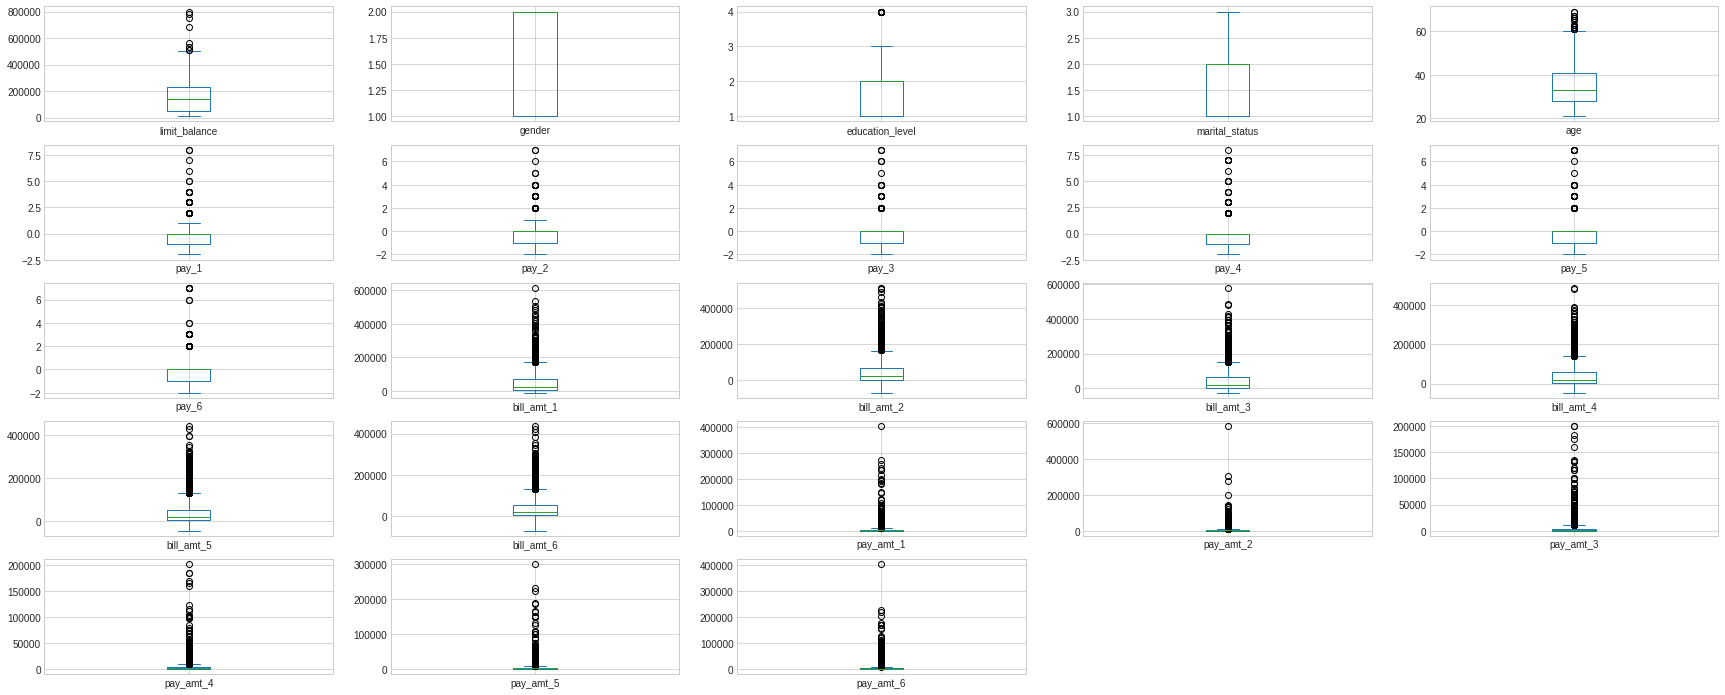

In [113]:
# Check outlier
X_train.plot(kind = 'box', subplots=True, figsize=(30,25), layout = (10,5))
plt.show()

Berdasarkan box plot di atas, dapat dilihat bahwa variabel yang memiliki outlier adalah:
1. limit_balance
2. education_level
3. age
4. pay_1
5. pay_2
6. pay_3
7. pay_4
8. pay_5
9. pay_6
10. bill_amt_1
11. bill_amt_2
12. bill_amt_3
13. bill_amt_4
14. bill_amt_5
15. bill_amt_6
16. pay_amt_1
17. pay_amt_2
18. pay_amt_3
19. pay_amt_4
20. pay_amt_5
21. pay_amt_6
<br>

Namun dari variabel di atas sebenarnya ada variabel yang tidak perlu dilakukan handling outlier seperti variabel `education_level, pay_1, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6`.<br>
Kalau kita lihat pada variabel `education_level, pay_1, pay_2, pay_3, pay_4, pay_5, pay_6` itu sebenarnya data kategorik yang sudah direpresentasikan dalam bentuk numerik. Sehingga kita tidak perlu melakukan handling pada variabel tersebut. Sementara untuk variabel `bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6` tidak perlu dilakukan handling outlier karena nantinya variabel ini tidak kita masukkan ke dalam model (di drop).
<br>
Sehingga, variabel yang kita proses untuk mendeteksi outlier adalah 8 variabel yang tersisa, seperti:<br>
1. limit_balance
2. age
3. pay_amt_1
4. pay_amt_2
5. pay_amt_3
6. pay_amt_4
7. pay_amt_5
8. pay_amt_6

Ini adalah fungsi untuk membuat histogram distribusi data-nya dan boxplot outlier-nya dari semua variabel yang akan dideteksi outlier-nya.

In [114]:
# Create function for creating histograms and boxplots

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

### Outlier detection for skewed variables

#### limit_balance

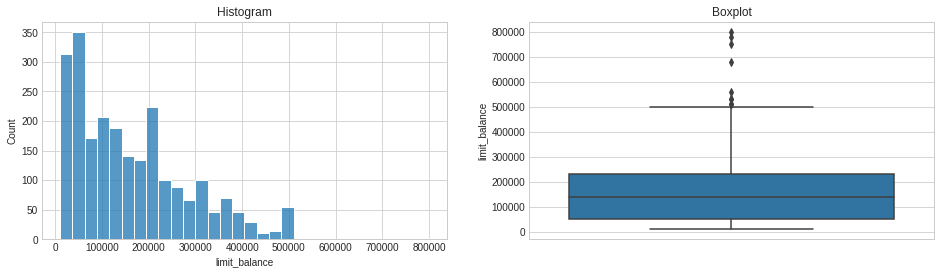


Skewness Value :  1.0018984794226522


In [115]:
# Check data distribution and outlier data in variable 'limit_balance'

diagnostic_plots(X_train, 'limit_balance')
print('\nSkewness Value : ', X_train['limit_balance'].skew())

Dari histogram di atas, kita melihat bahwa variabel `limit_balance` tidak berdistribusi normal dan distribusi-nya miring ke kanan *(right-skewed)*. Dalam box plot di atas, kita melihat bahwa variabel ini memiliki outlier, karena ada beberapa titik di luar kanan tail distribusi.

Selanjutnya akan dilakukan proses pendeteksian outlier. Di bawah ini merupakan fungsi untuk menemukan batas upper dan lower untuk variabel yang tidak berdistribusi normal/*skewed* dengan **(Inter-Quantile Range/IQR)**:

In [116]:
# Function to find upper and lower boundaries for skewed distributed variables
# Let's calculate the boundaries outside which sit the outliers for skewed distributions
# Distance passed as an argument, gives us the option to estimate 1.5 times or 3 times the IQR to calculate the boundaries.

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [117]:
# Looking for outliers in variable 'limit_balance', using the interquantile proximity rule IQR * 3

upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'limit_balance', 3)
print('Nilai Batas Atas limit_balance     : ', upper_boundary)
print('Nilai Batas Bawah limit_balance    : ', lower_boundary)

Nilai Batas Atas limit_balance     :  770000.0
Nilai Batas Bawah limit_balance    :  -490000.0


In [118]:
# Lets look at the number and percentage of outliers for `limit_balance`

print('Total observasi : {}'.format(len(X_train)))
print('limit_balance yang lebih besar dari 770000 (right end outliers) : {}'.format(len(X_train[X_train['limit_balance'] > upper_boundary])))
print('')
print('% right end outliers : {}'.format(len(X_train[X_train['limit_balance'] > upper_boundary])/len(X_train) * 100))

Total observasi : 2363
limit_balance yang lebih besar dari 770000 (right end outliers) : 2

% right end outliers : 0.08463817181548879


Karena nilai skew distribusi datanya extreme, maka Saya menggunakan parameter distance **3*IQR** untuk mendeteksi outlier. 

Hasilnya menunjukkan bahwa nilai batas atas sekitar 770.000.  Batas bawahnya negatif, namun variabel `limit_balance` tidak mengambil nilai negatif. Jadi untuk menghitung outlier disini Saya hanya menggunakan batas atas. Hal ini bertepatan dengan apa yang Saya amati di box plot di atas bahwa outlier hanya ada di tail kanan distribusi. **Saya mengamati ada outlier sebanyak 2 atau ~0.08% dari dataset mempunyai nilai yang sangat tinggi untuk variabel `limit_balance`.**

#### age

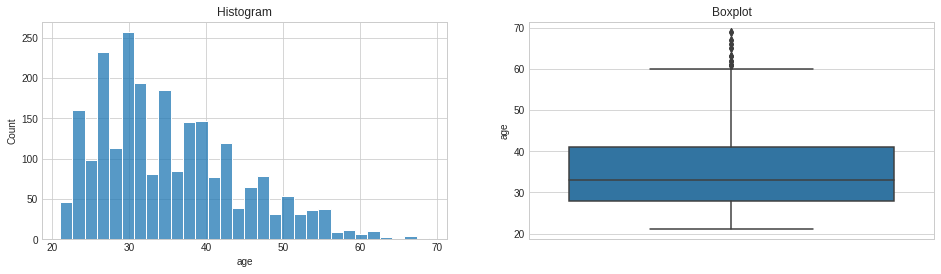


Skewness Value :  0.7822434194240467


In [119]:
# Check data distribution and outlier data in variable 'age'

diagnostic_plots(X_train, 'age')
print('\nSkewness Value : ', X_train['age'].skew())

Dari histogram di atas, kita melihat bahwa variabel `age` tidak berdistribusi normal dan distribusi-nya miring ke kanan *(right-skewed)*. Dalam box plot di atas, kita melihat bahwa variabel ini memiliki outlier, karena ada beberapa titik di luar kanan tail distribusi.

Selanjutnya akan dilakukan proses pendeteksian outlier. Saya akan menemukan batas upper dan lower untuk variabel ini dengan **(Inter-Quantile Range/IQR)**:

In [120]:
# Looking for outliers in variable 'age', using the interquantile proximity rule IQR * 1.5

upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'age', 1.5)
print('Nilai Batas Atas age     : ', upper_boundary)
print('Nilai Batas Bawah age    : ', lower_boundary)

Nilai Batas Atas age     :  60.5
Nilai Batas Bawah age    :  8.5


In [121]:
# Lets look at the number and percentage of outliers for `age`

print('Total observasi : {}'.format(len(X_train)))
print('age yang lebih besar dari 60.5 (right end outliers) : {}'.format(len(X_train[X_train['age'] > upper_boundary])))
print('')
print('% right end outliers : {}'.format(len(X_train[X_train['age'] > upper_boundary])/len(X_train) * 100))

Total observasi : 2363
age yang lebih besar dari 60.5 (right end outliers) : 21

% right end outliers : 0.8887008040626322


Karena nilai skew distribusi datanya tidak extreme, maka Saya menggunakan parameter distance **1.5*IQR** untuk mendeteksi outlier. 

Hasilnya menunjukkan bahwa nilai batas atas sekitar 60.5. Batas bawahnya 8.5, namun variabel `age` tidak mengambil nilai batas bawah. Jadi untuk menghitung outlier disini Saya hanya menggunakan batas atas. Hal ini bertepatan dengan apa yang Saya amati di box plot di atas bahwa outlier hanya ada di tail kanan distribusi. **Saya mengamati ada outlier sebanyak 21 atau ~0.88% dari dataset mempunyai nilai yang sangat tinggi untuk variabel `age`.**

#### pay_amt_1

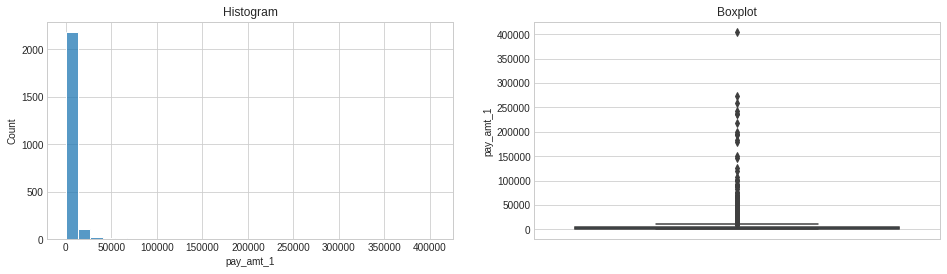


Skewness Value :  10.127921326665772


In [122]:
# Check data distribution and outlier data in variable 'pay_amt_1'

diagnostic_plots(X_train, 'pay_amt_1')
print('\nSkewness Value : ', X_train['pay_amt_1'].skew())

Dari histogram di atas, kita melihat bahwa variabel `pay_amt_1` tidak berdistribusi normal / sangat miring ke kanan *(right-skewed)*. Dalam box plot di atas, kita melihat bahwa variabel ini memiliki outlier, karena ada banyak titik di luar kanan tail distribusi.

Selanjutnya akan dilakukan proses pendeteksian outlier. Saya akan menemukan batas upper dan lower untuk variabel ini dengan **(Inter-Quantile Range/IQR)**:

In [123]:
# Looking for outliers in variable 'pay_amt_1', using the interquantile proximity rule IQR * 3

upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'pay_amt_1', 3)
print('Nilai Batas Atas pay_amt_1     : ', upper_boundary)
print('Nilai Batas Bawah pay_amt_1    : ', lower_boundary)

Nilai Batas Atas pay_amt_1     :  17224.0
Nilai Batas Bawah pay_amt_1    :  -11168.0


In [124]:
# Lets look at the number and percentage of outliers for `pay_amt_1`

print('Total observasi : {}'.format(len(X_train)))
print('pay_amt_1 yang lebih besar dari 17224.0 (right end outliers) : {}'.format(len(X_train[X_train['pay_amt_1'] > upper_boundary])))
print('')
print('% right end outliers : {}'.format(len(X_train[X_train['pay_amt_1'] > upper_boundary])/len(X_train) * 100))

Total observasi : 2363
pay_amt_1 yang lebih besar dari 17224.0 (right end outliers) : 132

% right end outliers : 5.586119339822259


Karena nilai skew distribusi datanya sangat extreme, maka Saya menggunakan parameter distance **3*IQR** untuk mendeteksi outlier. 

Hasilnya menunjukkan bahwa nilai batas atas sekitar 17224.0. Batas bawahnya negatif, namun variabel `pay_amt_1` tidak mengambil nilai negatif. Jadi untuk menghitung outlier disini Saya hanya menggunakan batas atas. Hal ini bertepatan dengan apa yang Saya amati di box plot di atas bahwa outlier hanya ada di tail kanan distribusi. **Saya mengamati ada outlier sebanyak 132 atau ~5.59% dari dataset mempunyai nilai yang sangat tinggi untuk variabel `pay_amt_1`.**

#### pay_amt_2

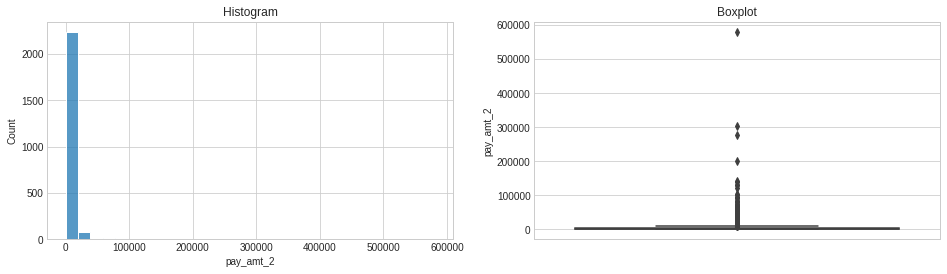


Skewness Value :  17.17834442443449


In [125]:
# Check data distribution and outlier data in variable 'pay_amt_2'

diagnostic_plots(X_train, 'pay_amt_2')
print('\nSkewness Value : ', X_train['pay_amt_2'].skew())

Dari histogram di atas, kita melihat bahwa variabel `pay_amt_2` tidak berdistribusi normal / sangat miring ke kanan *(right-skewed)*. Dalam box plot di atas, kita melihat bahwa variabel ini memiliki outlier, karena ada banyak titik di luar kanan tail distribusi.

Selanjutnya akan dilakukan proses pendeteksian outlier. Saya akan menemukan batas upper dan lower untuk variabel ini dengan **(Inter-Quantile Range/IQR)**:

In [126]:
# Looking for outliers in variable 'pay_amt_2', using the interquantile proximity rule IQR * 3

upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'pay_amt_2', 3)
print('Nilai Batas Atas pay_amt_2     : ', upper_boundary)
print('Nilai Batas Bawah pay_amt_2    : ', lower_boundary)

Nilai Batas Atas pay_amt_2     :  17099.0
Nilai Batas Bawah pay_amt_2    :  -11132.0


In [127]:
# Lets look at the number and percentage of outliers for `pay_amt_2`

print('Total observasi : {}'.format(len(X_train)))
print('pay_amt_2 yang lebih besar dari 17099.0 (right end outliers) : {}'.format(len(X_train[X_train['pay_amt_2'] > upper_boundary])))
print('')
print('% right end outliers : {}'.format(len(X_train[X_train['pay_amt_2'] > upper_boundary])/len(X_train) * 100))

Total observasi : 2363
pay_amt_2 yang lebih besar dari 17099.0 (right end outliers) : 141

% right end outliers : 5.966991112991959


Karena nilai skew distribusi datanya sangat extreme, maka Saya menggunakan parameter distance **3*IQR** untuk mendeteksi outlier. 

Hasilnya menunjukkan bahwa nilai batas atas sekitar 17099.0. Batas bawahnya negatif, namun variabel `pay_amt_2` tidak mengambil nilai negatif. Jadi untuk menghitung outlier disini Saya hanya menggunakan batas atas. Hal ini bertepatan dengan apa yang Saya amati di box plot di atas bahwa outlier hanya ada di tail kanan distribusi. **Saya mengamati ada outlier sebanyak 141 atau ~5.97% dari dataset mempunyai nilai yang sangat tinggi untuk variabel `pay_amt_2`.**

#### pay_amt_3

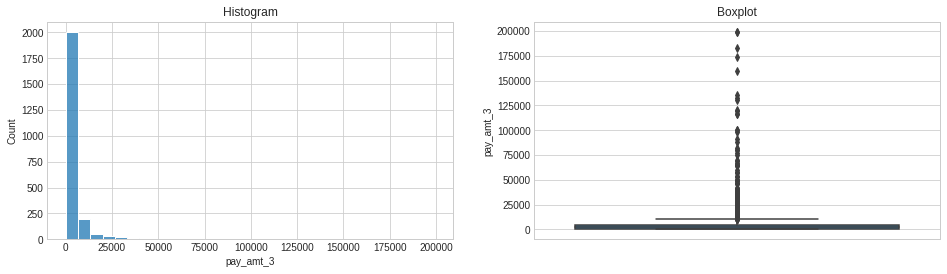


Skewness Value :  7.832152919765669


In [128]:
# Check data distribution and outlier data in variable 'pay_amt_3'

diagnostic_plots(X_train, 'pay_amt_3')
print('\nSkewness Value : ', X_train['pay_amt_3'].skew())

Dari histogram di atas, kita melihat bahwa variabel `pay_amt_3` tidak berdistribusi normal / sangat miring ke kanan *(right-skewed)*. Dalam box plot di atas, kita melihat bahwa variabel ini memiliki outlier, karena ada banyak titik di luar kanan tail distribusi.

Selanjutnya akan dilakukan proses pendeteksian outlier. Saya akan menemukan batas upper dan lower untuk variabel ini dengan **(Inter-Quantile Range/IQR)**:

In [129]:
# Looking for outliers in variable 'pay_amt_3', using the interquantile proximity rule IQR * 3

upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'pay_amt_3', 3)
print('Nilai Batas Atas pay_amt_3     : ', upper_boundary)
print('Nilai Batas Bawah pay_amt_3    : ', lower_boundary)

Nilai Batas Atas pay_amt_3     :  16432.5
Nilai Batas Bawah pay_amt_3    :  -11536.0


In [130]:
# Lets look at the number and percentage of outliers for `pay_amt_3`

print('Total observasi : {}'.format(len(X_train)))
print('pay_amt_3 yang lebih besar dari 16432.5 (right end outliers) : {}'.format(len(X_train[X_train['pay_amt_3'] > upper_boundary])))
print('')
print('% right end outliers : {}'.format(len(X_train[X_train['pay_amt_3'] > upper_boundary])/len(X_train) * 100))

Total observasi : 2363
pay_amt_3 yang lebih besar dari 16432.5 (right end outliers) : 133

% right end outliers : 5.628438425730004


Karena nilai skew distribusi datanya sangat extreme, maka Saya menggunakan parameter distance **3*IQR** untuk mendeteksi outlier. 

Hasilnya menunjukkan bahwa nilai batas atas sekitar 16432.5. Batas bawahnya negatif, namun variabel `pay_amt_3` tidak mengambil nilai negatif. Jadi untuk menghitung outlier disini Saya hanya menggunakan batas atas. Hal ini bertepatan dengan apa yang Saya amati di box plot di atas bahwa outlier hanya ada di tail kanan distribusi. **Saya mengamati ada outlier sebanyak 133 atau ~5.63% dari dataset mempunyai nilai yang sangat tinggi untuk variabel `pay_amt_3`.**

#### pay_amt_4

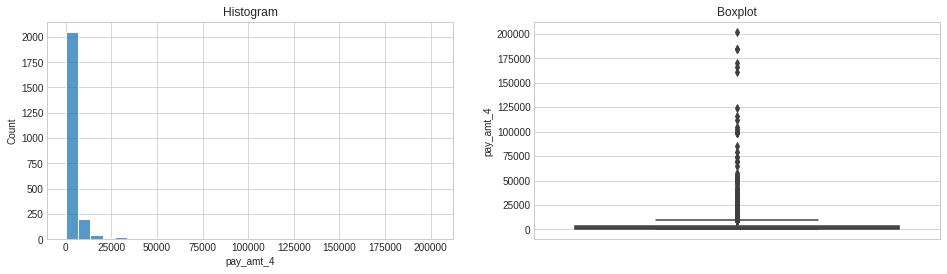


Skewness Value :  8.58026334798681


In [131]:
# Check data distribution and outlier data in variable 'pay_amt_4'

diagnostic_plots(X_train, 'pay_amt_4')
print('\nSkewness Value : ', X_train['pay_amt_4'].skew())

Dari histogram di atas, kita melihat bahwa variabel `pay_amt_4` tidak berdistribusi normal / sangat miring ke kanan *(right-skewed)*. Dalam box plot di atas, kita melihat bahwa variabel ini memiliki outlier, karena ada banyak titik di luar kanan tail distribusi.

Selanjutnya akan dilakukan proses pendeteksian outlier. Saya akan menemukan batas upper dan lower untuk variabel ini dengan **(Inter-Quantile Range/IQR)**:

In [132]:
# Looking for outliers in variable 'pay_amt_4', using the interquantile proximity rule IQR * 3

upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'pay_amt_4', 3)
print('Nilai Batas Atas pay_amt_4     : ', upper_boundary)
print('Nilai Batas Bawah pay_amt_4    : ', lower_boundary)

Nilai Batas Atas pay_amt_4     :  15100.0
Nilai Batas Bawah pay_amt_4    :  -10800.0


In [133]:
# Lets look at the number and percentage of outliers for `pay_amt_4`

print('Total observasi : {}'.format(len(X_train)))
print('pay_amt_4 yang lebih besar dari 15100.0 (right end outliers) : {}'.format(len(X_train[X_train['pay_amt_4'] > upper_boundary])))
print('')
print('% right end outliers : {}'.format(len(X_train[X_train['pay_amt_4'] > upper_boundary])/len(X_train) * 100))

Total observasi : 2363
pay_amt_4 yang lebih besar dari 15100.0 (right end outliers) : 107

% right end outliers : 4.52814219212865


Karena nilai skew distribusi datanya sangat extreme, maka Saya menggunakan parameter distance **3*IQR** untuk mendeteksi outlier. 

Hasilnya menunjukkan bahwa nilai batas atas sekitar 15100.0. Batas bawahnya negatif, namun variabel `pay_amt_4` tidak mengambil nilai negatif. Jadi untuk menghitung outlier disini Saya hanya menggunakan batas atas. Hal ini bertepatan dengan apa yang Saya amati di box plot di atas bahwa outlier hanya ada di tail kanan distribusi. **Saya mengamati ada outlier sebanyak 107 atau ~4.53% dari dataset mempunyai nilai yang sangat tinggi untuk variabel `pay_amt_4`.**

#### pay_amt_5

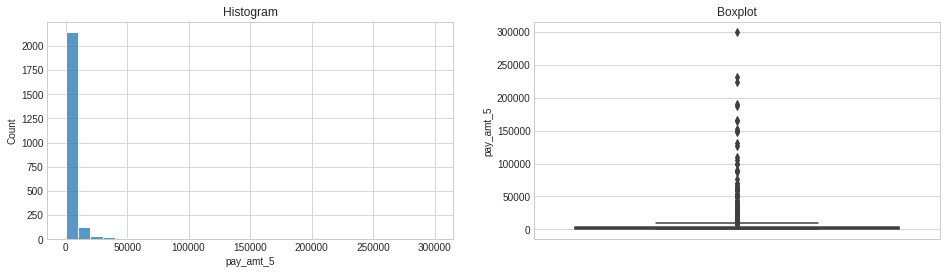


Skewness Value :  9.952253376453925


In [134]:
# Check data distribution and outlier data in variable 'pay_amt_5'

diagnostic_plots(X_train, 'pay_amt_5')
print('\nSkewness Value : ', X_train['pay_amt_5'].skew())

Dari histogram di atas, kita melihat bahwa variabel `pay_amt_5` tidak berdistribusi normal / sangat miring ke kanan *(right-skewed)*. Dalam box plot di atas, kita melihat bahwa variabel ini memiliki outlier, karena ada banyak titik di luar kanan tail distribusi.

Selanjutnya akan dilakukan proses pendeteksian outlier. Saya akan menemukan batas upper dan lower untuk variabel ini dengan **(Inter-Quantile Range/IQR)**:

In [135]:
# Looking for outliers in variable 'pay_amt_5', using the interquantile proximity rule IQR * 3

upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'pay_amt_5', 3)
print('Nilai Batas Atas pay_amt_5     : ', upper_boundary)
print('Nilai Batas Bawah pay_amt_5    : ', lower_boundary)

Nilai Batas Atas pay_amt_5     :  14917.0
Nilai Batas Bawah pay_amt_5    :  -10521.0


In [136]:
# Lets look at the number and percentage of outliers for `pay_amt_5`

print('Total observasi : {}'.format(len(X_train)))
print('pay_amt_5 yang lebih besar dari 14917.0 (right end outliers) : {}'.format(len(X_train[X_train['pay_amt_5'] > upper_boundary])))
print('')
print('% right end outliers : {}'.format(len(X_train[X_train['pay_amt_5'] > upper_boundary])/len(X_train) * 100))

Total observasi : 2363
pay_amt_5 yang lebih besar dari 14917.0 (right end outliers) : 127

% right end outliers : 5.374523910283538


Karena nilai skew distribusi datanya sangat extreme, maka Saya menggunakan parameter distance **3*IQR** untuk mendeteksi outlier. 

Hasilnya menunjukkan bahwa nilai batas atas sekitar 14917.0. Batas bawahnya negatif, namun variabel `pay_amt_5` tidak mengambil nilai negatif. Jadi untuk menghitung outlier disini Saya hanya menggunakan batas atas. Hal ini bertepatan dengan apa yang Saya amati di box plot di atas bahwa outlier hanya ada di tail kanan distribusi. **Saya mengamati ada outlier sebanyak 127 atau ~5.4% dari dataset mempunyai nilai yang sangat tinggi untuk variabel `pay_amt_5`.**

#### pay_amt_6

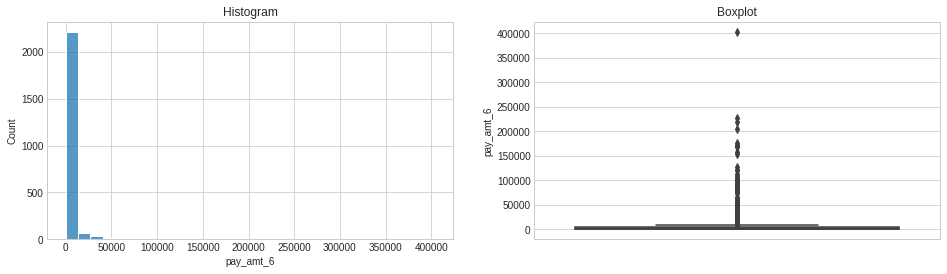


Skewness Value :  9.75007569734768


In [137]:
# Check data distribution and outlier data in variable 'pay_amt_6'

diagnostic_plots(X_train, 'pay_amt_6')
print('\nSkewness Value : ', X_train['pay_amt_6'].skew())

Dari histogram di atas, kita melihat bahwa variabel `pay_amt_6` tidak berdistribusi normal / sangat miring ke kanan *(right-skewed)*. Dalam box plot di atas, kita melihat bahwa variabel ini memiliki outlier, karena ada banyak titik di luar kanan tail distribusi.

Selanjutnya akan dilakukan proses pendeteksian outlier. Saya akan menemukan batas upper dan lower untuk variabel ini dengan **(Inter-Quantile Range/IQR)**:

In [138]:
# Looking for outliers in variable 'pay_amt_6', using the interquantile proximity rule IQR * 3

upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'pay_amt_6', 3)
print('Nilai Batas Atas pay_amt_6     : ', upper_boundary)
print('Nilai Batas Bawah pay_amt_6    : ', lower_boundary)

Nilai Batas Atas pay_amt_6     :  15499.0
Nilai Batas Bawah pay_amt_6    :  -11332.0


In [139]:
# Lets look at the number and percentage of outliers for `pay_amt_6`

print('Total observasi : {}'.format(len(X_train)))
print('pay_amt_6 yang lebih besar dari 15499.0 (right end outliers) : {}'.format(len(X_train[X_train['pay_amt_6'] > upper_boundary])))
print('')
print('% right end outliers : {}'.format(len(X_train[X_train['pay_amt_6'] > upper_boundary])/len(X_train) * 100))

Total observasi : 2363
pay_amt_6 yang lebih besar dari 15499.0 (right end outliers) : 140

% right end outliers : 5.924672027084215


Karena nilai skew distribusi datanya sangat extreme, maka Saya menggunakan parameter distance **3*IQR** untuk mendeteksi outlier. 

Hasilnya menunjukkan bahwa nilai batas atas sekitar 15499.0. Batas bawahnya negatif, namun variabel `pay_amt_6` tidak mengambil nilai negatif. Jadi untuk menghitung outlier disini Saya hanya menggunakan batas atas. Hal ini bertepatan dengan apa yang Saya amati di box plot di atas bahwa outlier hanya ada di tail kanan distribusi. **Saya mengamati ada outlier sebanyak 140 atau ~5.92% dari dataset mempunyai nilai yang sangat tinggi untuk variabel `pay_amt_6`.**

### Alternative way to detect outlier 

In [140]:
# Input Paramater Distribution  Check
dist_check = X_train.skew(numeric_only=True)

normal_dist = []
skew_dist = []
extreme_skew_dist = []

for i in range(len(dist_check)):
    if -1 <= dist_check.values[i] < -0.5:
        skew_dist.append(dist_check.index[i])
    elif 1 >= dist_check.values[i] > 0.5:
        skew_dist.append(dist_check.index[i])
    elif dist_check.values[i] > 1:
        extreme_skew_dist.append(dist_check.index[i])
    elif dist_check.values[i] < -1:
        extreme_skew_dist.append(dist_check.index[i])
    else:
        normal_dist.append(dist_check.index[i])

In [141]:
# Extreme skew dist
print('extreme_skew_dist :', extreme_skew_dist)
print(' ')
# Skew dist
print('skew_dist :', skew_dist)
print(' ')
# normal_dist
print('normal_dist :',normal_dist)

extreme_skew_dist : ['limit_balance', 'pay_4', 'pay_5', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
 
skew_dist : ['age', 'pay_1', 'pay_2', 'pay_3', 'pay_6']
 
normal_dist : ['gender', 'education_level', 'marital_status']


In [142]:
# Outliers Detection Function
# for Normally Distributed Data

def detect_normal(df, parameter):
    
    threshold = 3
    mean_ = np.mean(df[parameter])
    std_ = np.std(df[parameter])

    upper_count = df[
                    ((df[parameter]-mean_)/std_) > threshold
                    ][parameter].count()

    bottom_count = df[
                    ((df[parameter]-mean_)/std_) < -threshold
                    ][parameter].count()

    total_count = upper_count + bottom_count

    percentage = (total_count/len(df[parameter])*100).round(2)

    a = ({'Parameter':parameter, 'Total Outliers':total_count, 'Percentage':percentage})

    return print(a)

In [143]:
# Outliers Detection Function
# for Skew Distributed Data

def detect_skew(df, parameter, fold=1.5):
    
    for i in parameter:
        
        IQR = df[parameter].quantile(0.75) - df[parameter].quantile(0.25)
        upper = df[parameter].quantile(0.75) + (fold*IQR)
        bottom = df[parameter].quantile(0.25) - (fold*IQR)

        upper_count = df[
            (df[parameter] > upper)
        ][parameter].count()

        bottom_count = df[
            (df[parameter] < bottom)
        ][parameter].count()
        
        total_count = upper_count + bottom_count

        percentage = (total_count/len(df[parameter])*100).round(2)

        a = ({'Parameter':parameter, 'Total Outliers':total_count, 'Percentage':percentage})

    return print(a)

In [144]:
# Outliers Detection Function
# for Extreme Skew Distributed Data

def detect_extreme_skew(df, parameter, fold=3):
    
    for i in parameter:
        
        IQR = df[parameter].quantile(0.75) - df[parameter].quantile(0.25)
        upper = df[parameter].quantile(0.75) + (fold*IQR)
        bottom = df[parameter].quantile(0.25) - (fold*IQR)

        upper_count = df[
            (df[parameter] > upper)
        ][parameter].count()

        bottom_count = df[
            (df[parameter] < bottom)
        ][parameter].count()
        
        total_count = upper_count + bottom_count

        percentage = (total_count/len(df[parameter])*100).round(2)

        a = ({'Parameter':parameter, 'Total Outliers':total_count, 'Percentage':percentage})

    return print(a)

In [145]:
# Outlier summary
# For normally distributed input parameter

for i in normal_dist:
    detect_normal(X_train, parameter=i)

{'Parameter': 'gender', 'Total Outliers': 0, 'Percentage': 0.0}
{'Parameter': 'education_level', 'Total Outliers': 0, 'Percentage': 0.0}
{'Parameter': 'marital_status', 'Total Outliers': 0, 'Percentage': 0.0}


In [146]:
# Outlier summary
# For skew distributed input parameter

for i in skew_dist:
    detect_skew(X_train, parameter=i)

{'Parameter': 'age', 'Total Outliers': 21, 'Percentage': 0.89}
{'Parameter': 'pay_1', 'Total Outliers': 248, 'Percentage': 10.5}
{'Parameter': 'pay_2', 'Total Outliers': 342, 'Percentage': 14.47}
{'Parameter': 'pay_3', 'Total Outliers': 338, 'Percentage': 14.3}
{'Parameter': 'pay_6', 'Total Outliers': 267, 'Percentage': 11.3}


In [147]:
# Outlier summary
# For extreme skew distributed input parameter

for i in extreme_skew_dist:
    detect_extreme_skew(X_train, parameter=i)

{'Parameter': 'limit_balance', 'Total Outliers': 2, 'Percentage': 0.08}
{'Parameter': 'pay_4', 'Total Outliers': 15, 'Percentage': 0.63}
{'Parameter': 'pay_5', 'Total Outliers': 16, 'Percentage': 0.68}
{'Parameter': 'bill_amt_1', 'Total Outliers': 56, 'Percentage': 2.37}
{'Parameter': 'bill_amt_2', 'Total Outliers': 51, 'Percentage': 2.16}
{'Parameter': 'bill_amt_3', 'Total Outliers': 58, 'Percentage': 2.45}
{'Parameter': 'bill_amt_4', 'Total Outliers': 56, 'Percentage': 2.37}
{'Parameter': 'bill_amt_5', 'Total Outliers': 55, 'Percentage': 2.33}
{'Parameter': 'bill_amt_6', 'Total Outliers': 50, 'Percentage': 2.12}
{'Parameter': 'pay_amt_1', 'Total Outliers': 132, 'Percentage': 5.59}
{'Parameter': 'pay_amt_2', 'Total Outliers': 141, 'Percentage': 5.97}
{'Parameter': 'pay_amt_3', 'Total Outliers': 133, 'Percentage': 5.63}
{'Parameter': 'pay_amt_4', 'Total Outliers': 107, 'Percentage': 4.53}
{'Parameter': 'pay_amt_5', 'Total Outliers': 127, 'Percentage': 5.37}
{'Parameter': 'pay_amt_6', '

Berdasarkan personal judgement, variabel yang tidak tidak perlu dilakukan handling outlier disini adalah:
- education_level
- age
- pay_1
- pay_2
- pay_3
- pay_4
- pay_5
- pay_6
- bill_amt_1
- bill_amt_2
- bill_amt_3
- bill_amt_4
- bill_amt_5
- bill_amt_6
- pay_amt_1
- pay_amt_2
- pay_amt_3
- pay_amt_4
- pay_amt_5
- pay_amt_6

Menurut Saya, variabel-variabel tersebut dianggap sebagai natural outlier. Misalnya pada variabel `education_level`, variabel ini merepresentasikan tingkat level pendidikan tertinggi yang berarti sebenarnya tipe data ini adalah numerik diskrit (data kategori ordinal yang berbentuk numerik). Tipe data ini tidak perlu dilakukan handling outlier dan outlier yang terdeteksi pada variabel inipun bisa saja karena observasi-nya jarang dilakukan untuk seseorang yang level pendidikannya tinggi. Kemudian untuk variabel lain seperti `age`, `pay_X`, `bill_amt_X`dan `pay_amt_X` juga dianggap sebagai natural outlier. 

Jadi, yang akan Saya lakukan adalah handling outlier untuk variabel `limit_balance`. Saya menggunakan teknik `capping` yang akan mentransformasi outlier di tail kanan menjadi nilai `upper boundary` dan outlier di tail kiri menjadi nilai `lower_boundary`.

### Handling outlier with capping censoring method

In [148]:
# Use Winsorizer to remove outliers
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=3,
                          variables=['limit_balance'])

windsoriser.fit(X_train)

X_train_fix = windsoriser.transform(X_train)

In [149]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'limit_balance': -490000.0}
Right Tail Caps :  {'limit_balance': 770000.0}


In [150]:
print('X_train Dataframe - Before Capping')
print(X_train.describe())
print('')
print('X_train Dataframe - After Capping')
print(X_train_fix.describe())

X_train Dataframe - Before Capping
       limit_balance       gender  education_level  marital_status  \
count      2363.0000  2363.000000      2363.000000     2363.000000   
mean     163152.7719     1.608125         1.834532        1.568345   
std      124319.6759     0.488272         0.735084        0.522043   
min       10000.0000     1.000000         1.000000        1.000000   
25%       50000.0000     1.000000         1.000000        1.000000   
50%      140000.0000     2.000000         2.000000        2.000000   
75%      230000.0000     2.000000         2.000000        2.000000   
max      800000.0000     2.000000         4.000000        3.000000   

               age        pay_1        pay_2        pay_3        pay_4  \
count  2363.000000  2363.000000  2363.000000  2363.000000  2363.000000   
mean     35.144731     0.012696    -0.120609    -0.134575    -0.174355   
std       9.080609     1.110267     1.186044     1.197515     1.189170   
min      21.000000    -2.000000    -2.

distance - Before Capping


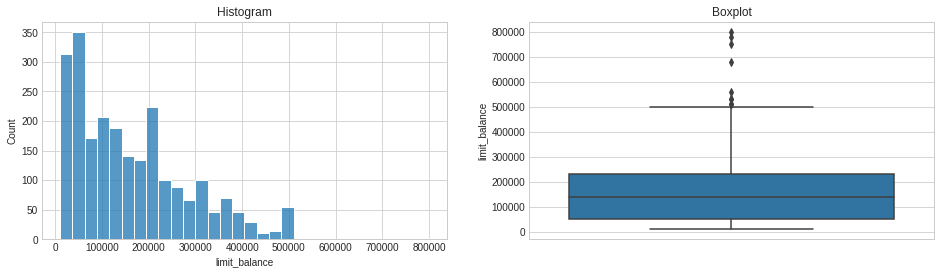

distance - After Capping


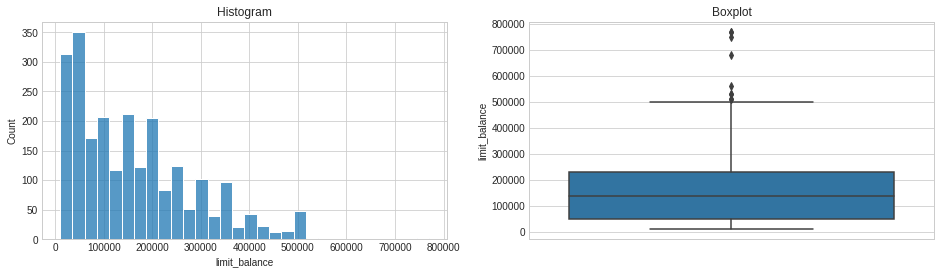

In [151]:
# Let's find outliers in `limit_balance`

print('distance - Before Capping')
diagnostic_plots(X_train, 'limit_balance')
print('distance - After Capping')
diagnostic_plots(X_train_fix, 'limit_balance')

In [152]:
# let's inspect now the variable limit_balance from X_train after capping

print('\nSkewness Value limit balance after caping : ', X_train_fix['limit_balance'].skew())


Skewness Value limit balance after caping :  0.9941768880916189


Berdasarkan grafik overview tersebut meskipun masih terdapat outlier pada grafik tersebut namun nilai skew berkurang meskipun grafik tersebut tetap tidak terdistribusi normal.

## Handling Missing Values

In [153]:
# Check Missing Values in `X_train`

X_train.isnull().sum()

limit_balance      0
gender             0
education_level    0
marital_status     0
age                0
pay_1              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [154]:
# Check Missing Values in `X_test`

X_test.isnull().sum()

limit_balance      0
gender             0
education_level    0
marital_status     0
age                0
pay_1              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

Berdasarkan informasi di atas menunjukkan bahwa tidak ada missing value pada X_train dan X_test. Sehingga, tidak ada proses handling missing value pada kedua data tersebut.

In [155]:
# Check Missing Values in `y_train`
mv_y_train = y_train.isnull().sum()
print('Jumlah Missing Value di y_train : ', mv_y_train)

# Check Missing Values in `y_test`
mv_y_test = y_test.isnull().sum()
print('Jumlah Missing Value di y_test : ', mv_y_test)

Jumlah Missing Value di y_train :  0
Jumlah Missing Value di y_test :  0


Berdasarkan informasi di atas menunjukkan bahwa tidak ada missing value pada y_train dan y_test. Sehingga, tidak ada proses handling missing value pada kedua data tersebut.

## Memisahkan antara kolom Numerikal dan kolom Kategorikal

In [156]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['limit_balance', 'gender', 'education_level', 'marital_status', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
Cat Columns :  []


Berdasarkan tipe data menunjukkan bahwa tidak ada tipe data yang termasuk dalam data kategorik. Namun, sebenarnya ada data kategorik yang sudah berbentuk numerik. Sehingga kita perlu memisahkan kolom numerikal dengan kategorikal secara manual.

In [157]:
# Create a new variable containing categorical columns and numerical columns
cat_col = X_train[['gender', 'education_level', 'marital_status', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']]
num_col = X_train.drop(cat_col, axis=1)

# Get Numerical Columns and Categorical Columns in List
num_columns = num_col.columns.tolist()
cat_columns = cat_col.columns.tolist()

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
Cat Columns :  ['gender', 'education_level', 'marital_status', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']


In [158]:
# Split Train-Set and Test-Set based on Column Types

X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,limit_balance,age,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,160000,53,0,0,3613,2722,0,0,0,3613,0,0,0,0
1,110000,29,95690,105101,105676,106506,103591,109276,11000,3800,4000,0,8800,0
2,20000,44,19696,203,19378,19961,19962,19981,203,20710,1305,696,712,860
3,360000,40,69464,55638,43429,45895,27851,25408,10034,15011,45919,5036,5022,6010
4,150000,28,3752,2730,500,2727,712,0,2730,500,2727,712,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,310000,44,67423,67729,113788,106919,100656,93846,10000,56000,5000,4000,3300,5000
2359,20000,23,6916,13914,10130,6165,6165,6315,14000,1145,950,0,150,6000
2360,150000,33,74033,237,1420,1141,1067,1128,237,1426,1141,1067,1200,1150
2361,100000,44,59586,60842,61749,65130,63816,65011,2800,2500,5000,0,2400,2400


## Feature Scaling

Saya akan melakukan feature scaling untuk kolom numerikal. Proses ini dibutuhkan karena skala dari data numerik yang kita punya itu berbeda-beda. 

Tujuan feature scaling disini adalah untuk membuat data kita mempunyai skala yang sama agar algoritma machine learning memperlakukan semua fitur dengan adil dan tentunya hal ini akan mempercepat pembelajaran dari suatu model terhadap datanya.

Disamping itu, alasannya karena ada beberapa model machine learning yang akan kita gunakan untuk memprediksi `default_payment` dalam project ini merupakan model yang terpengaruh oleh besaran/nilai pada fiturnya.

Dalam proses feature scaling disini, Saya akan treat scalling variabel `'age'` menggunakan **`Normalization/MinMaxScaler`** karena variabel ini mempunyai data yang tidak berdistribusi normal/skewed. Sedangkan untuk variabel `'limit_balance', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'`, Saya akan treat scalling dengan menggunakan **`RobustScaler`**, karena variabel-variabel ini mempunyai data yang tidak berdistribusi normal/skewed dan sangat extreme nilai skew-nya.

In [159]:
# Display `X_train_num`

X_train_num

,limit_balance,age,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,160000,53,0,0,3613,2722,0,0,0,3613,0,0,0,0
1,110000,29,95690,105101,105676,106506,103591,109276,11000,3800,4000,0,8800,0
2,20000,44,19696,203,19378,19961,19962,19981,203,20710,1305,696,712,860
3,360000,40,69464,55638,43429,45895,27851,25408,10034,15011,45919,5036,5022,6010
4,150000,28,3752,2730,500,2727,712,0,2730,500,2727,712,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,310000,44,67423,67729,113788,106919,100656,93846,10000,56000,5000,4000,3300,5000
2359,20000,23,6916,13914,10130,6165,6165,6315,14000,1145,950,0,150,6000
2360,150000,33,74033,237,1420,1141,1067,1128,237,1426,1141,1067,1200,1150
2361,100000,44,59586,60842,61749,65130,63816,65011,2800,2500,5000,0,2400,2400


In [160]:
# Feature Scaling using MinMaxScaler for 'age' variable

X_train_num_1 = pd.DataFrame(X_train_num['age'])
X_test_num_1 = pd.DataFrame(X_test_num['age'])

scaler1 = MinMaxScaler()
scaler1.fit(X_train_num_1)

X_train_num_scaled_1 = scaler1.transform(X_train_num_1)
X_test_num_scaled_1 = scaler1.transform(X_test_num_1)
X_train_num_scaled_1

array([[0.66666667],
       [0.16666667],
       [0.47916667],
       ...,
       [0.25      ],
       [0.47916667],
       [0.14583333]])

In [161]:
# Feature Scaling using RobustScaler for 'limit_balance', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6' variable

X_train_num_2 = pd.DataFrame(X_train_num[['limit_balance', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']])
X_test_num_2 = pd.DataFrame(X_test_num[['limit_balance', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']])

scaler2 = RobustScaler()
scaler2.fit(X_train_num_2)

X_train_num_scaled_2 = scaler2.transform(X_train_num_2)
X_test_num_scaled_2 = scaler2.transform(X_test_num_2)
X_train_num_scaled_2

array([[ 0.11111111, -0.37313038, -0.35283484, ..., -0.43081081,
        -0.45432031, -0.4174276 ],
       [-0.16666667,  1.07328834,  1.27106139, ..., -0.43081081,
         1.96725371, -0.4174276 ],
       [-0.66666667, -0.07541209, -0.34969832, ..., -0.2427027 ,
        -0.25839296, -0.19306027],
       ...,
       [ 0.05555556,  0.74592822, -0.349173  , ..., -0.14243243,
        -0.12410567, -0.11740151],
       [-0.22222222,  0.52755209,  0.58722372, ..., -0.43081081,
         0.20610897,  0.2087138 ],
       [ 0.11111111,  2.01395177,  1.88226478, ...,  0.92054054,
         0.92157402,  0.75658753]])

In [162]:
# Concate Columns

X_train_num = np.concatenate([X_train_num_scaled_1, X_train_num_scaled_2], axis=1)
X_test_num = np.concatenate([X_test_num_scaled_1, X_test_num_scaled_2], axis=1)
X_train_num

array([[ 0.66666667,  0.11111111, -0.37313038, ..., -0.43081081,
        -0.45432031, -0.4174276 ],
       [ 0.16666667, -0.16666667,  1.07328834, ..., -0.43081081,
         1.96725371, -0.4174276 ],
       [ 0.47916667, -0.66666667, -0.07541209, ..., -0.2427027 ,
        -0.25839296, -0.19306027],
       ...,
       [ 0.25      ,  0.05555556,  0.74592822, ..., -0.14243243,
        -0.12410567, -0.11740151],
       [ 0.47916667, -0.22222222,  0.52755209, ..., -0.43081081,
         0.20610897,  0.2087138 ],
       [ 0.14583333,  0.11111111,  2.01395177, ...,  0.92054054,
         0.92157402,  0.75658753]])

In [163]:
# Create DataFrame of `X_train_num`

X_train_num_df = pd.DataFrame(X_train_num, columns=['age', 'limit_balance', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'])
X_train_num_df

,age,limit_balance,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,0.666667,0.111111,-0.373130,-0.352835,-0.302445,-0.311382,-0.365057,-0.363542,-0.541667,0.375155,-0.497309,-0.430811,-0.454320,-0.417428
1,0.166667,-0.166667,1.073288,1.271061,1.415715,1.571202,1.663077,1.786735,2.170365,0.421522,0.503817,-0.430811,1.967254,-0.417428
2,0.479167,-0.666667,-0.075412,-0.349698,-0.037052,0.001324,0.025765,0.029634,-0.491617,4.614431,-0.170692,-0.242703,-0.258393,-0.193060
3,0.395833,1.222222,0.676865,0.506818,0.367830,0.471752,0.180218,0.136424,1.932199,3.201339,10.995370,0.930270,0.927628,1.150535
4,0.145833,0.055556,-0.316416,-0.310654,-0.354850,-0.311291,-0.351117,-0.363542,0.131410,-0.396727,0.185208,-0.238378,-0.454320,-0.417428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,0.479167,0.944444,0.646014,0.693633,1.552275,1.578693,1.605615,1.483112,1.923817,13.364741,0.754098,0.650270,0.453770,0.887034
2359,0.041667,-0.666667,-0.268590,-0.137852,-0.192736,-0.248928,-0.244357,-0.239278,2.910010,-0.236796,-0.259542,-0.430811,-0.413043,1.147926
2360,0.250000,0.055556,0.745928,-0.349173,-0.339363,-0.340060,-0.344167,-0.341345,-0.483235,-0.167121,-0.211738,-0.142432,-0.124106,-0.117402
2361,0.479167,-0.222222,0.527552,0.587224,0.676234,0.820664,0.884351,0.915711,0.148669,0.099182,0.754098,-0.430811,0.206109,0.208714


In [164]:
# Create DataFrame of `X_test_num`

X_test_num_df = pd.DataFrame(X_test_num, columns=['age', 'limit_balance', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'])
X_test_num_df

,age,limit_balance,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,0.104167,-0.500000,0.100534,0.146536,0.199133,0.230171,0.307046,0.298468,-0.097880,-0.049591,-0.497309,0.271892,-0.454320,0.026089
1,0.062500,-0.666667,-0.368263,-0.347860,-0.357847,-0.354916,-0.358752,-0.357205,-0.541667,-0.520704,-0.497309,-0.430811,-0.454320,-0.417428
2,0.062500,-0.611111,0.050229,0.103721,0.146778,0.184260,0.219942,0.168518,-0.048570,-0.024795,-0.272056,-0.160541,0.096037,-0.417428
3,0.520833,-0.277778,-0.282965,-0.245019,-0.226034,-0.197339,-0.181824,-0.177393,-0.265533,-0.200099,-0.209486,-0.295676,-0.344249,-0.313071
4,0.083333,0.388889,1.786113,1.099820,1.268415,1.460424,1.621591,1.679651,0.691075,0.574014,1.004380,0.551622,0.646395,0.887034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0.250000,0.611111,-0.126488,-0.352835,-0.363268,3.064712,3.439415,3.535670,-0.541667,-0.520704,46.766112,1.866486,1.747111,1.429690
587,0.458333,-0.666667,-0.311247,-0.326831,-0.314044,-0.334237,-0.336433,-0.243411,-0.541667,0.204314,-0.497309,-0.035676,1.225647,-0.417428
588,0.062500,-0.611111,-0.282391,-0.276940,-0.258659,-0.300697,-0.278325,-0.345714,-0.186637,0.039425,-0.497309,-0.025405,-0.337369,-0.183929
589,0.229167,-0.500000,0.394202,0.426319,0.471108,0.020207,0.031012,0.019422,0.000740,-0.148773,-0.121887,0.109730,0.013484,0.104357


## Handling Imbalanced Dataset using SMOTENC

In [165]:
# Merge with Categorical Column

X_train_imbalanced_new = pd.concat([X_train_num_df, X_train_cat], axis=1)
X_train_imbalanced_new

,age,limit_balance,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,...,pay_amt_6,gender,education_level,marital_status,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
0,0.666667,0.111111,-0.373130,-0.352835,-0.302445,-0.311382,-0.365057,-0.363542,-0.541667,0.375155,...,-0.417428,2,3,1,1,-2,-1,2,2,-2
1,0.166667,-0.166667,1.073288,1.271061,1.415715,1.571202,1.663077,1.786735,2.170365,0.421522,...,-0.417428,2,1,2,2,2,2,2,2,2
2,0.479167,-0.666667,-0.075412,-0.349698,-0.037052,0.001324,0.025765,0.029634,-0.491617,4.614431,...,-0.193060,1,2,2,0,-1,-1,0,0,0
3,0.395833,1.222222,0.676865,0.506818,0.367830,0.471752,0.180218,0.136424,1.932199,3.201339,...,1.150535,1,2,1,0,0,0,-1,0,0
4,0.145833,0.055556,-0.316416,-0.310654,-0.354850,-0.311291,-0.351117,-0.363542,0.131410,-0.396727,...,-0.417428,2,1,2,-1,-1,-2,-1,-1,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,0.479167,0.944444,0.646014,0.693633,1.552275,1.578693,1.605615,1.483112,1.923817,13.364741,...,0.887034,2,2,1,-1,0,0,0,0,0
2359,0.041667,-0.666667,-0.268590,-0.137852,-0.192736,-0.248928,-0.244357,-0.239278,2.910010,-0.236796,...,1.147926,2,1,2,-1,-1,0,0,0,0
2360,0.250000,0.055556,0.745928,-0.349173,-0.339363,-0.340060,-0.344167,-0.341345,-0.483235,-0.167121,...,-0.117402,2,1,2,0,-1,-1,-1,-1,-1
2361,0.479167,-0.222222,0.527552,0.587224,0.676234,0.820664,0.884351,0.915711,0.148669,0.099182,...,0.208714,1,2,1,2,2,2,2,3,2


In [166]:
# Mapping binary values to the expected output
X_train_imbalanced_new['gender']=X_train_imbalanced_new['gender'].map({1: 'male', 2: 'female'})
X_train_imbalanced_new['education_level']=X_train_imbalanced_new['education_level'].map({1: 'graduate school', 2: 'university', 3: 'high school', 4:'others'})
X_train_imbalanced_new['marital_status']=X_train_imbalanced_new['marital_status'].map({1: 'married', 2: 'single', 3: 'others'})
X_train_imbalanced_new['pay_1']=X_train_imbalanced_new['pay_1'].map({-2: 'pay duly 2 months', -1: 'pay duly 1 month', 0: 'on time', 1: 'payment delay for 1 month', 2: 'payment delay for 2 month', 3: 'payment delay for 3 month', 4: 'payment delay for 4 month', 5: 'payment delay for 5 month', 6: 'payment delay for 6 month', 7: 'payment delay for 7 month', 8: 'payment delay for 8 month'})
X_train_imbalanced_new['pay_2']=X_train_imbalanced_new['pay_2'].map({-2: 'pay duly 2 months', -1: 'pay duly 1 month', 0: 'on time', 1: 'payment delay for 1 month', 2: 'payment delay for 2 month', 3: 'payment delay for 3 month', 4: 'payment delay for 4 month', 5: 'payment delay for 5 month', 6: 'payment delay for 6 month', 7: 'payment delay for 7 month', 8: 'payment delay for 8 month'})
X_train_imbalanced_new['pay_3']=X_train_imbalanced_new['pay_3'].map({-2: 'pay duly 2 months', -1: 'pay duly 1 month', 0: 'on time', 1: 'payment delay for 1 month', 2: 'payment delay for 2 month', 3: 'payment delay for 3 month', 4: 'payment delay for 4 month', 5: 'payment delay for 5 month', 6: 'payment delay for 6 month', 7: 'payment delay for 7 month', 8: 'payment delay for 8 month'})
X_train_imbalanced_new['pay_4']=X_train_imbalanced_new['pay_4'].map({-2: 'pay duly 2 months', -1: 'pay duly 1 month', 0: 'on time', 1: 'payment delay for 1 month', 2: 'payment delay for 2 month', 3: 'payment delay for 3 month', 4: 'payment delay for 4 month', 5: 'payment delay for 5 month', 6: 'payment delay for 6 month', 7: 'payment delay for 7 month', 8: 'payment delay for 8 month'})
X_train_imbalanced_new['pay_5']=X_train_imbalanced_new['pay_5'].map({-2: 'pay duly 2 months', -1: 'pay duly 1 month', 0: 'on time', 1: 'payment delay for 1 month', 2: 'payment delay for 2 month', 3: 'payment delay for 3 month', 4: 'payment delay for 4 month', 5: 'payment delay for 5 month', 6: 'payment delay for 6 month', 7: 'payment delay for 7 month', 8: 'payment delay for 8 month'})
X_train_imbalanced_new['pay_6']=X_train_imbalanced_new['pay_6'].map({-2: 'pay duly 2 months', -1: 'pay duly 1 month', 0: 'on time', 1: 'payment delay for 1 month', 2: 'payment delay for 2 month', 3: 'payment delay for 3 month', 4: 'payment delay for 4 month', 5: 'payment delay for 5 month', 6: 'payment delay for 6 month', 7: 'payment delay for 7 month', 8: 'payment delay for 8 month'})
X_train_imbalanced_new.head()

,age,limit_balance,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,...,pay_amt_6,gender,education_level,marital_status,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
0,0.666667,0.111111,-0.373130,-0.352835,-0.302445,-0.311382,-0.365057,-0.363542,-0.541667,0.375155,...,-0.417428,female,high school,married,payment delay for 1 month,pay duly 2 months,pay duly 1 month,payment delay for 2 month,payment delay for 2 month,pay duly 2 months
1,0.166667,-0.166667,1.073288,1.271061,1.415715,1.571202,1.663077,1.786735,2.170365,0.421522,...,-0.417428,female,graduate school,single,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month
2,0.479167,-0.666667,-0.075412,-0.349698,-0.037052,0.001324,0.025765,0.029634,-0.491617,4.614431,...,-0.193060,male,university,single,on time,pay duly 1 month,pay duly 1 month,on time,on time,on time
3,0.395833,1.222222,0.676865,0.506818,0.367830,0.471752,0.180218,0.136424,1.932199,3.201339,...,1.150535,male,university,married,on time,on time,on time,pay duly 1 month,on time,on time
4,0.145833,0.055556,-0.316416,-0.310654,-0.354850,-0.311291,-0.351117,-0.363542,0.131410,-0.396727,...,-0.417428,female,graduate school,single,pay duly 1 month,pay duly 1 month,pay duly 2 months,pay duly 1 month,pay duly 1 month,pay duly 2 months


Salah satu pendekatan untuk mengatasi dataset yang imbalanced adalah dengan mengambil sampel kelas minoritas secara berlebihan. Pendekatan paling sederhana melibatkan duplikasi contoh di kelas minoritas, meskipun contoh ini tidak menambahkan informasi baru ke model. Sebaliknya, contoh baru dapat disintesis dari contoh yang sudah ada.

SMOTE adalah singkatan dari *Synthetic Minority Oversampling Technique* dan merupakan teknik oversampling yang digunakan untuk meningkatkan sampel di kelas minoritas. Ini menghasilkan sampel baru dengan melihat ruang fitur target dan mendeteksi tetangga terdekat. Kemudian, teknik ini hanya memilih sampel yang serupa dan mengubah kolom secara acak dalam ruang fitur dari sampel tetangga. Karena data yang kita miliki itu tidak pure numerikal, artinya merupakan campuran data numerik dengan kategorik, maka Saya menggunakan Teknik **`SMOTE-NC`**.

In [167]:
# SMOTE-NC

smotenc = SMOTENC([14, 15, 16, 17, 18, 19, 20, 21, 22], random_state = 42)
X_train_balanced, y_train_balanced = smotenc.fit_resample(X_train_imbalanced_new, y_train)
y_train_balanced.value_counts()

0    1858
1    1858
Name: default_payment, dtype: int64

In [168]:
# Check shape balanced dataset
X_train_balanced.shape

(3716, 23)

Setelah dilakukan oversampling dengan teknik SMOTE-NC di atas, kita mengetahui bahwa data point di train-set kita sudah bertambah menjadi 3.716 baris, dengan proporsi masing-masing targetnya seimbang yaitu di kelas 0 dan kelas 1 masing-masing sebanyak 1.858 data.

In [169]:
# Split between Numerical Features and Categorical Features

X_train_balanced_num = X_train_balanced[num_columns].reset_index().drop(['index'], axis = 1)
X_train_balanced_cat = X_train_balanced[cat_columns].reset_index().drop(['index'], axis = 1)

## Final Feature Selection

Sebelum masuk ke dalam proses membuat model, hal yang perlu diperhatikan adalah fitur-fitur mana saja yang akan kita gunakan/masukkan ke dalam model machine learning.
Pada proses feature selection analysis sebelumnya, kita sudah menganalisis bahwa variabel yang memiliki hubungan dengan variabel `target` adalah:
1. pay_1
2. pay_2
3. pay_3
4. pay_4
5. pay_5
6. pay_6
7. limit_balance
8. pay_amt_1
9. pay_amt_2
10. pay_amt_3
11. pay_amt_4
12. pay_amt_5
13. pay_amt_6
14. education_level
15. age
16. marital_status
17. gender.
<br>

Sedangkan nilai korelasi variabel yang mendekati 0 (tidak memiliki hubungan yang kuat dengan variabel target) seperti:
1. bill_amt_1
2. bill_amt_2
3. bill_amt_3
4. bill_amt_4
5. bill_amt_5
6. bill_amt_6.
<br>

Coba kita lakukan proses seleksi fitur final dengan menggunakan metode `Pearson’s correlation coefficient`.

In [170]:
# concate data train
data_train_final = pd.concat([X_train_imbalanced_new, y_train], axis=1)
data_train_final

,age,limit_balance,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,...,gender,education_level,marital_status,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment
0,0.666667,0.111111,-0.373130,-0.352835,-0.302445,-0.311382,-0.365057,-0.363542,-0.541667,0.375155,...,female,high school,married,payment delay for 1 month,pay duly 2 months,pay duly 1 month,payment delay for 2 month,payment delay for 2 month,pay duly 2 months,0
1,0.166667,-0.166667,1.073288,1.271061,1.415715,1.571202,1.663077,1.786735,2.170365,0.421522,...,female,graduate school,single,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,1
2,0.479167,-0.666667,-0.075412,-0.349698,-0.037052,0.001324,0.025765,0.029634,-0.491617,4.614431,...,male,university,single,on time,pay duly 1 month,pay duly 1 month,on time,on time,on time,0
3,0.395833,1.222222,0.676865,0.506818,0.367830,0.471752,0.180218,0.136424,1.932199,3.201339,...,male,university,married,on time,on time,on time,pay duly 1 month,on time,on time,0
4,0.145833,0.055556,-0.316416,-0.310654,-0.354850,-0.311291,-0.351117,-0.363542,0.131410,-0.396727,...,female,graduate school,single,pay duly 1 month,pay duly 1 month,pay duly 2 months,pay duly 1 month,pay duly 1 month,pay duly 2 months,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,0.479167,0.944444,0.646014,0.693633,1.552275,1.578693,1.605615,1.483112,1.923817,13.364741,...,female,university,married,pay duly 1 month,on time,on time,on time,on time,on time,0
2359,0.041667,-0.666667,-0.268590,-0.137852,-0.192736,-0.248928,-0.244357,-0.239278,2.910010,-0.236796,...,female,graduate school,single,pay duly 1 month,pay duly 1 month,on time,on time,on time,on time,0
2360,0.250000,0.055556,0.745928,-0.349173,-0.339363,-0.340060,-0.344167,-0.341345,-0.483235,-0.167121,...,female,graduate school,single,on time,pay duly 1 month,pay duly 1 month,pay duly 1 month,pay duly 1 month,pay duly 1 month,0
2361,0.479167,-0.222222,0.527552,0.587224,0.676234,0.820664,0.884351,0.915711,0.148669,0.099182,...,male,university,married,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 3 month,payment delay for 2 month,1


### Pearson’s correlation coefficient

<AxesSubplot:>

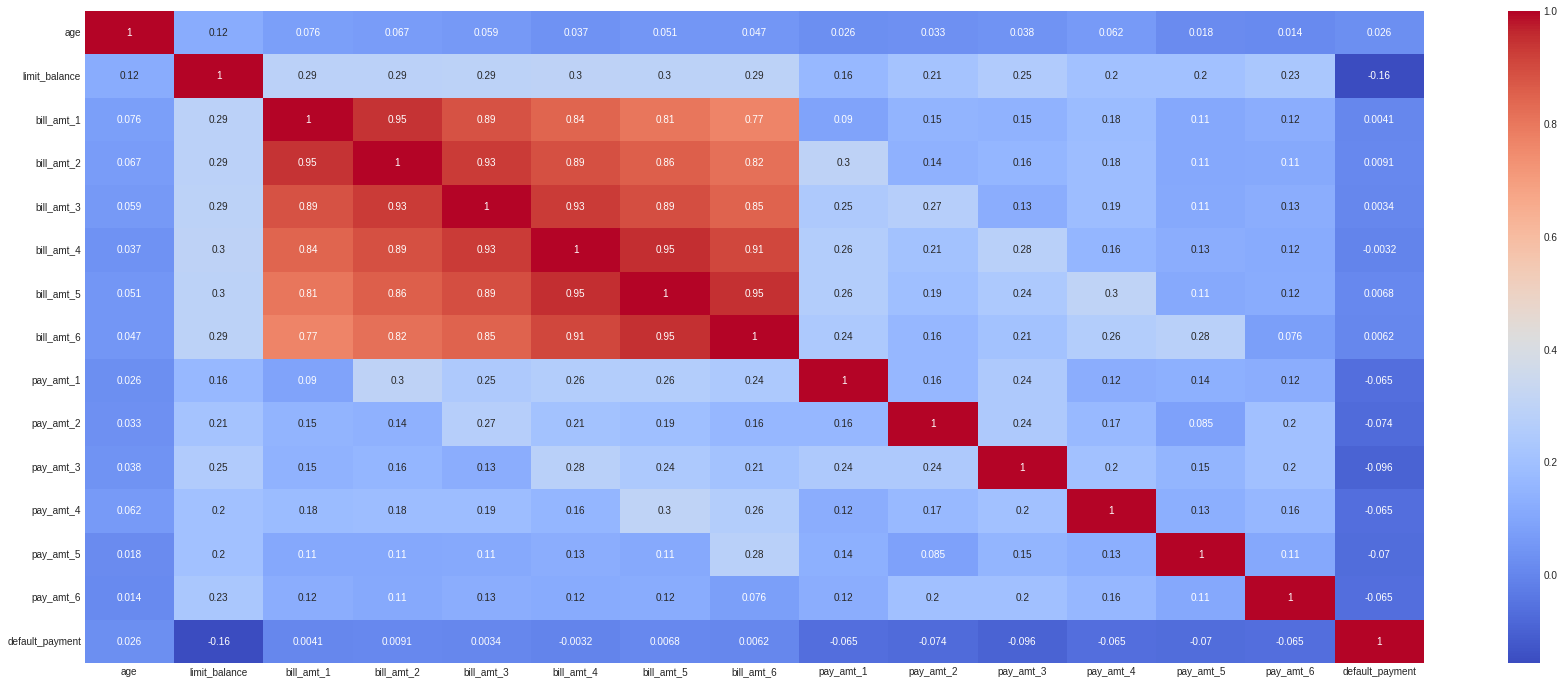

In [171]:
# correlation matrix (heatmap style)
plt.figure(figsize=(30,12))
sns.heatmap(data_train_final.corr(method='pearson'),annot=True,cmap="coolwarm")

<AxesSubplot:title={'center':'Correlation with Default Payment'}>

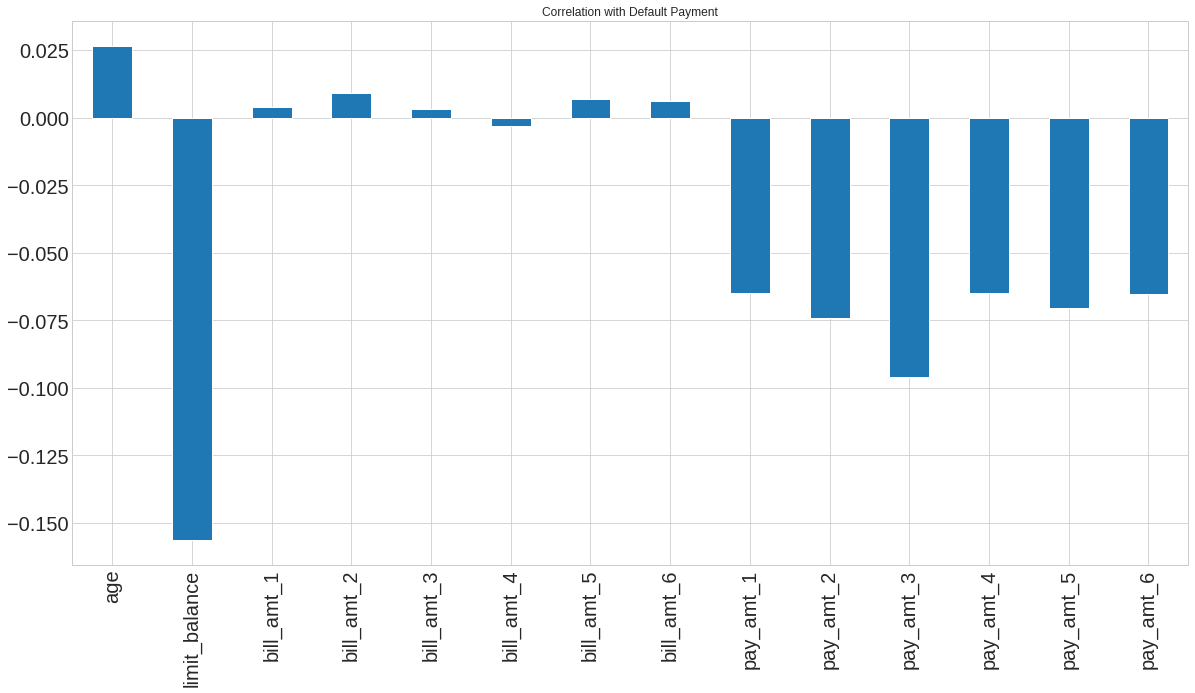

In [172]:
# check the positive and negative correlations between features and the target variable 'default_payment'
X = data_train_final.drop(['default_payment'],axis=1)
plt.style.use('seaborn-whitegrid')
X.corrwith(data_train_final['default_payment']).plot.bar(figsize = (20, 10), title = "Correlation with Default Payment", fontsize = 20,rot = 90, grid = True)

Berdasarkan hasil korelasi di atas dan hasil fitur seleksi di awal, didapatkan bahwa variabel yang memiliki hubungan dengan target `default_payment` yaitu:
1. pay_1
2. pay_2
3. pay_3
4. pay_4
5. pay_5
6. pay_6
7. limit_balance
8. pay_amt_1
9. pay_amt_2
10. pay_amt_3
11. pay_amt_4
12. pay_amt_5
13. pay_amt_6
14. education_level
15. age
16. marital_status
17. gender.
<br>

Namun, sebelumnya Saya sudah melakukan hypothesis testing di proses EDA untuk mengetahui apakah ada hubungan yang signifikan antara variabel `gender, education_level dan marital_status` dengan variabel target `default_payment`. Hasilnya menyatakan bahwa ketiga variabel tersebut tidak ada hubungan yang signifikan terhadap variabel target. Jadi, Saya akan melakukan `drop columns` untuk variabel:
1. gender
2. education_level
3. marital_status
4. bill_amt_1
5. bill_amt_2
6. bill_amt_3
7. bill_amt_4
8. bill_amt_5
9. bill_amt_6.

### Train & Test final dataFrame without Handling Imbalanced Dataset

In [173]:
# define imbalance dataset
X_train_final_df = pd.concat([X_train_num_df, X_train_cat], axis=1)
X_test_final_df = pd.concat([X_test_num_df, X_test_cat], axis=1)

# create a new variable containing columns are not used in model
col_not_used = X_train_final_df[['gender', 'education_level', 'marital_status', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6']]

# drop columns in X_train_final_df and X_test_final_df which are not used in model 
X_train_final_df.drop(col_not_used, axis=1, inplace=True)
X_test_final_df.drop(col_not_used, axis=1, inplace=True)
X_train_final_df

,age,limit_balance,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
0,0.666667,0.111111,-0.541667,0.375155,-0.497309,-0.430811,-0.454320,-0.417428,1,-2,-1,2,2,-2
1,0.166667,-0.166667,2.170365,0.421522,0.503817,-0.430811,1.967254,-0.417428,2,2,2,2,2,2
2,0.479167,-0.666667,-0.491617,4.614431,-0.170692,-0.242703,-0.258393,-0.193060,0,-1,-1,0,0,0
3,0.395833,1.222222,1.932199,3.201339,10.995370,0.930270,0.927628,1.150535,0,0,0,-1,0,0
4,0.145833,0.055556,0.131410,-0.396727,0.185208,-0.238378,-0.454320,-0.417428,-1,-1,-2,-1,-1,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,0.479167,0.944444,1.923817,13.364741,0.754098,0.650270,0.453770,0.887034,-1,0,0,0,0,0
2359,0.041667,-0.666667,2.910010,-0.236796,-0.259542,-0.430811,-0.413043,1.147926,-1,-1,0,0,0,0
2360,0.250000,0.055556,-0.483235,-0.167121,-0.211738,-0.142432,-0.124106,-0.117402,0,-1,-1,-1,-1,-1
2361,0.479167,-0.222222,0.148669,0.099182,0.754098,-0.430811,0.206109,0.208714,2,2,2,2,3,2


In [174]:
# check shape dataset
print('Train Size : ', X_train_final_df.shape)
print('Test Size  : ', X_test_final_df.shape)

Train Size :  (2363, 14)
Test Size  :  (591, 14)


Berdasarkan informasi di atas, diketahui bahwa data Train-Set terdiri dari 2363 baris dan 14 kolom. Sedangkan data Test-Set adalah 591 baris dan 14 kolom.

### Train & Test dataFrame with Handling Imbalanced Dataset

In [175]:
# define balance dataset
X_train_balanced = pd.concat([X_train_balanced_num, X_train_balanced_cat], axis=1)

# create a new variable containing columns are not used in model
col_not_used = X_train_balanced[['gender', 'education_level', 'marital_status', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6']]

# drop columns in X_train_balanced which are not used in model 
X_train_balanced.drop(col_not_used, axis=1, inplace=True)
X_train_balanced

,limit_balance,age,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
0,0.111111,0.666667,-0.541667,0.375155,-0.497309,-0.430811,-0.454320,-0.417428,payment delay for 1 month,pay duly 2 months,pay duly 1 month,payment delay for 2 month,payment delay for 2 month,pay duly 2 months
1,-0.166667,0.166667,2.170365,0.421522,0.503817,-0.430811,1.967254,-0.417428,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month
2,-0.666667,0.479167,-0.491617,4.614431,-0.170692,-0.242703,-0.258393,-0.193060,on time,pay duly 1 month,pay duly 1 month,on time,on time,on time
3,1.222222,0.395833,1.932199,3.201339,10.995370,0.930270,0.927628,1.150535,on time,on time,on time,pay duly 1 month,on time,on time
4,0.055556,0.145833,0.131410,-0.396727,0.185208,-0.238378,-0.454320,-0.417428,pay duly 1 month,pay duly 1 month,pay duly 2 months,pay duly 1 month,pay duly 1 month,pay duly 2 months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3711,0.588351,0.375092,2.724240,1.773673,0.838336,1.351567,0.992917,0.392352,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,on time,on time
3712,-0.045983,0.270833,0.068349,0.667761,-0.497309,1.548451,-0.454320,0.288787,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month
3713,-0.319489,0.499933,-0.372115,0.439980,-0.302242,-0.244946,1.307346,-0.417428,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month
3714,-0.664557,0.082282,0.014108,-0.520704,-0.473544,-0.382450,0.443889,0.464778,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month


In [176]:
# check shape dataset
print('Train Size : ', X_train_balanced.shape)

Train Size :  (3716, 14)


Berdasarkan informasi di atas, diketahui bahwa data Train-Set yang sudah balance terdiri dari 3716 baris dan 14 kolom.

In [177]:
# Create a new variable containing categorical columns and numerical columns
cat_col_bal = X_train_balanced[['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']]
num_col_bal = X_train_balanced.drop(cat_col_bal, axis=1)

# Get Numerical Columns and Categorical Columns in List
num_columns_bal = num_col_bal.columns.tolist()
cat_columns_bal = cat_col_bal.columns.tolist()

print('Num Columns : ', num_columns_bal)
print('Cat Columns : ', cat_columns_bal)

Num Columns :  ['limit_balance', 'age', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
Cat Columns :  ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']


In [178]:
# Split between Numerical Features and Categorical Features

X_train_balanced_num = X_train_balanced[num_columns_bal].reset_index().drop(['index'], axis = 1)
X_train_balanced_cat = X_train_balanced[cat_columns_bal].reset_index().drop(['index'], axis = 1)
X_train_balanced_cat

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
0,payment delay for 1 month,pay duly 2 months,pay duly 1 month,payment delay for 2 month,payment delay for 2 month,pay duly 2 months
1,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month
2,on time,pay duly 1 month,pay duly 1 month,on time,on time,on time
3,on time,on time,on time,pay duly 1 month,on time,on time
4,pay duly 1 month,pay duly 1 month,pay duly 2 months,pay duly 1 month,pay duly 1 month,pay duly 2 months
...,...,...,...,...,...,...
3711,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,on time,on time
3712,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month
3713,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month
3714,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month


## Feature Encoding

Feature Encoding adalah proses untuk mengubah data kategorikal menjadi numerik. Proses ini perlu dilakukan karena model machine learning tidak dapat memproses data dengan tipe data kategorik.

In [179]:
# Display `X_train_balanced_cat`

X_train_balanced_cat

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
0,payment delay for 1 month,pay duly 2 months,pay duly 1 month,payment delay for 2 month,payment delay for 2 month,pay duly 2 months
1,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month
2,on time,pay duly 1 month,pay duly 1 month,on time,on time,on time
3,on time,on time,on time,pay duly 1 month,on time,on time
4,pay duly 1 month,pay duly 1 month,pay duly 2 months,pay duly 1 month,pay duly 1 month,pay duly 2 months
...,...,...,...,...,...,...
3711,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,on time,on time
3712,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month
3713,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month
3714,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month,payment delay for 2 month


Dari informasi di atas, kita mempunyai 6 variabel kategorik yang akan kita ubah ke numerik. Namun, disini Saya hanya menggunakan teknik `mapping` untuk mengembalikan nilai kategorik ke dalam bentuk numerik seperti di awal.

In [180]:
# Convert Categorical Features
X_train_balanced_cat['pay_1']=X_train_balanced_cat['pay_1'].map({'pay duly 2 months': -2, 'pay duly 1 month': -1, 'on time': 0, 'payment delay for 1 month': 1, 'payment delay for 2 month': 2, 'payment delay for 3 month': 3, 'payment delay for 4 month': 4, 'payment delay for 5 month': 5, 'payment delay for 6 month': 6, 'payment delay for 7 month': 7, 'payment delay for 8 month': 8})
X_train_balanced_cat['pay_2']=X_train_balanced_cat['pay_2'].map({'pay duly 2 months': -2, 'pay duly 1 month': -1, 'on time': 0, 'payment delay for 1 month': 1, 'payment delay for 2 month': 2, 'payment delay for 3 month': 3, 'payment delay for 4 month': 4, 'payment delay for 5 month': 5, 'payment delay for 6 month': 6, 'payment delay for 7 month': 7, 'payment delay for 8 month': 8})
X_train_balanced_cat['pay_3']=X_train_balanced_cat['pay_3'].map({'pay duly 2 months': -2, 'pay duly 1 month': -1, 'on time': 0, 'payment delay for 1 month': 1, 'payment delay for 2 month': 2, 'payment delay for 3 month': 3, 'payment delay for 4 month': 4, 'payment delay for 5 month': 5, 'payment delay for 6 month': 6, 'payment delay for 7 month': 7, 'payment delay for 8 month': 8})
X_train_balanced_cat['pay_4']=X_train_balanced_cat['pay_4'].map({'pay duly 2 months': -2, 'pay duly 1 month': -1, 'on time': 0, 'payment delay for 1 month': 1, 'payment delay for 2 month': 2, 'payment delay for 3 month': 3, 'payment delay for 4 month': 4, 'payment delay for 5 month': 5, 'payment delay for 6 month': 6, 'payment delay for 7 month': 7, 'payment delay for 8 month': 8})
X_train_balanced_cat['pay_5']=X_train_balanced_cat['pay_5'].map({'pay duly 2 months': -2, 'pay duly 1 month': -1, 'on time': 0, 'payment delay for 1 month': 1, 'payment delay for 2 month': 2, 'payment delay for 3 month': 3, 'payment delay for 4 month': 4, 'payment delay for 5 month': 5, 'payment delay for 6 month': 6, 'payment delay for 7 month': 7, 'payment delay for 8 month': 8})
X_train_balanced_cat['pay_6']=X_train_balanced_cat['pay_6'].map({'pay duly 2 months': -2, 'pay duly 1 month': -1, 'on time': 0, 'payment delay for 1 month': 1, 'payment delay for 2 month': 2, 'payment delay for 3 month': 3, 'payment delay for 4 month': 4, 'payment delay for 5 month': 5, 'payment delay for 6 month': 6, 'payment delay for 7 month': 7, 'payment delay for 8 month': 8})

In [181]:
# Show categorical features
X_train_balanced_cat

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
0,1,-2,-1,2,2,-2
1,2,2,2,2,2,2
2,0,-1,-1,0,0,0
3,0,0,0,-1,0,0
4,-1,-1,-2,-1,-1,-2
...,...,...,...,...,...,...
3711,2,2,2,2,0,0
3712,2,2,2,2,2,2
3713,2,2,2,2,2,2
3714,2,2,2,2,2,2


## Menggabungkan (concate)  kolom Numerikal dan kolom Kategorikal (Balanced Data)

In [182]:
# Merge Numerical Features with Categorical Column

X_train_balanced_final = pd.concat([X_train_balanced_num, X_train_balanced_cat], axis=1)
X_train_balanced_final

,limit_balance,age,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
0,0.111111,0.666667,-0.541667,0.375155,-0.497309,-0.430811,-0.454320,-0.417428,1,-2,-1,2,2,-2
1,-0.166667,0.166667,2.170365,0.421522,0.503817,-0.430811,1.967254,-0.417428,2,2,2,2,2,2
2,-0.666667,0.479167,-0.491617,4.614431,-0.170692,-0.242703,-0.258393,-0.193060,0,-1,-1,0,0,0
3,1.222222,0.395833,1.932199,3.201339,10.995370,0.930270,0.927628,1.150535,0,0,0,-1,0,0
4,0.055556,0.145833,0.131410,-0.396727,0.185208,-0.238378,-0.454320,-0.417428,-1,-1,-2,-1,-1,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3711,0.588351,0.375092,2.724240,1.773673,0.838336,1.351567,0.992917,0.392352,2,2,2,2,0,0
3712,-0.045983,0.270833,0.068349,0.667761,-0.497309,1.548451,-0.454320,0.288787,2,2,2,2,2,2
3713,-0.319489,0.499933,-0.372115,0.439980,-0.302242,-0.244946,1.307346,-0.417428,2,2,2,2,2,2
3714,-0.664557,0.082282,0.014108,-0.520704,-0.473544,-0.382450,0.443889,0.464778,2,2,2,2,2,2


In [183]:
# Re-arrange columns
X_train_balanced_final = X_train_balanced_final.iloc[:,[1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]]
X_train_balanced_final

,age,limit_balance,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
0,0.666667,0.111111,-0.541667,0.375155,-0.497309,-0.430811,-0.454320,-0.417428,1,-2,-1,2,2,-2
1,0.166667,-0.166667,2.170365,0.421522,0.503817,-0.430811,1.967254,-0.417428,2,2,2,2,2,2
2,0.479167,-0.666667,-0.491617,4.614431,-0.170692,-0.242703,-0.258393,-0.193060,0,-1,-1,0,0,0
3,0.395833,1.222222,1.932199,3.201339,10.995370,0.930270,0.927628,1.150535,0,0,0,-1,0,0
4,0.145833,0.055556,0.131410,-0.396727,0.185208,-0.238378,-0.454320,-0.417428,-1,-1,-2,-1,-1,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3711,0.375092,0.588351,2.724240,1.773673,0.838336,1.351567,0.992917,0.392352,2,2,2,2,0,0
3712,0.270833,-0.045983,0.068349,0.667761,-0.497309,1.548451,-0.454320,0.288787,2,2,2,2,2,2
3713,0.499933,-0.319489,-0.372115,0.439980,-0.302242,-0.244946,1.307346,-0.417428,2,2,2,2,2,2
3714,0.082282,-0.664557,0.014108,-0.520704,-0.473544,-0.382450,0.443889,0.464778,2,2,2,2,2,2


# vi. Model Definition

>Bagian ini berisi cell untuk mendefinisikan model seperti alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai.

 1. Algoritma `Supervised learning` yang dipakai adalah:<br>
   - `Logistic Regression`. Algoritma ini baik digunakan untuk kasus klasifikasi ketika data kita memiliki hubungan linear antara variabel independen dengan target. Namun, jika data kita tidak linear, model ini tidak cukup bagus untuk memprediksi karena kesalahan dalam memilih variabel untuk dimasukkan ke dalam model.<br>
   - `SVM`. Algoritma ini baik digunakan untuk klasifikasi baik dengan data yang linear atau non-linear. Namun, algoritma ini tidak efisien untuk data yang besar, karena waktu training modelnya bisa sangat lama.<br>
   - `Decision Tree`, `Random Forest`, `AdaBoostClassifier`, `Gradient Boosting`, `LightGBM`, `XGBoost` merupakan Algoritma yang berbasis tree. Baik digunakan juga untuk data yang non-linear tanpa harus menangani outlier, scaling karena model ini tidak terpengaruh oleh besaran fitur. Namun kelemahannya jika menangani kasus yang kompleks, maka akan lebih banyak dan dalam lagi tree yang dibuat, dan itu akan membutuhkan waktu yang lebih lama dan storage yang besar.<br>
   - `KNN` merupakan Algoritma yang lebih cepat trainingnya, karena baru belajar ketika ada data baru. Namun tidak cocok untuk data yang dimensinya besar.<br>
   - `Naive Bayes` merupakan Algoritma yang kecepatan trainingnya tinggi. Namun, asumsinya bahwa masing-masing variabel independen membuat berkurangnya akurasi, karena biasanya ada korelasi antara variabel yang satu dengan yang lain.<br>

2. Hyperparameter yang dipakai adalah:
  - Pertama yang digunakan dalam kasus ini adalah baseline setiap model dengan `default parameter`.<br>
  - Setelah itu dilakukan `cross validation` setiap modelnya, dan dipilih model yang terbaik.<br>
  - Didapatkan model yang terbaik adalah `XGB`. Kemudian dilakukan hyperparameter tuning dengan `Random Search` dan `Grid Search`.<br>
  - `Random Search` menghasilkan hyperparameter terbaik: `{'n_estimators': 266, 'min_child_weight': 3, 'max_depth': 450}` dan `Grid Search` menghasilkan hyperparameter terbaik: `{'max_depth': 450, 'min_child_weight': 3, 'n_estimators': 241}`. Namun keduanya menghasilkan evaluasi model yang hampir sama. Sehingga Saya memilih menggunakan hyperparameter dari `GridSearchCV`.<br>

3. Metrics yang dapat digunakan seperti `Accuracy`, `Precision`, `Recall`, `F1-score`. Tapi untuk kasus ini, metrics yang akan dipakai adalah `F1-score`. Saya tidak menggunakan `accuracy` dalam kasus ini karena kita mempunyai data yang tidak seimbang (imbalanced data). Data yang tidak seimbang lebih cocok dilakukan evaluasi modelnya menggunakan metrics `Precision`, `Recall`, dan `F1-score`. Tapi karena Saya ingin menghasilkan model yang akurasinya baik untuk memprediksi seseorang yang menunggak pembayaran kredit sehingga di default kartu kreditnya maupun sebaliknya, maka disini Saya tidak hanya fokus pada score `Precision` saja atau `Recall` saja, tapi lebih kepada score `F1-score`. 

# vii. Model Training

>Bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

## Baseline model

Disini, Saya akan membuat *baseline model*. *Baseline model* adalah model yang ditraining menggunakan default parameter.

### Logistic Regression

In [184]:
# Training Baseline Model using Logistic Regression against imbalanced data

model_log_reg_1 = LogisticRegression()
model_log_reg_1_imb = model_log_reg_1.fit(X_train_final_df, y_train)
%time model_log_reg_1_imb

CPU times: user 8 µs, sys: 2 µs, total: 10 µs
Wall time: 9.06 µs


LogisticRegression()

In [185]:
# Train the Model using balanced data

model_log_reg_2 = LogisticRegression()
model_log_reg_2_bal = model_log_reg_2.fit(X_train_balanced_final, y_train_balanced)
%time model_log_reg_2_bal

CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 7.15 µs


LogisticRegression()

### SVM (Support Vector Machine)

In [186]:
# Training Baseline Model using SVM against imbalanced data

model_svm_1 = SVC()
model_svm_1_imb = model_svm_1.fit(X_train_final_df, y_train)
%time model_svm_1_imb

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.54 µs


SVC()

In [187]:
# Train the Model using balanced data

model_svm_2 = SVC()
model_svm_2_bal = model_svm_2.fit(X_train_balanced_final, y_train_balanced)
%time model_svm_2_bal

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.78 µs


SVC()

### Decision Tree

In [188]:
# Training Baseline Model using Decision Tree against imbalanced data

model_dtc_1 = DecisionTreeClassifier()
model_dtc_1_imb = model_dtc_1.fit(X_train_final_df, y_train)
%time model_dtc_1_imb

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 10.7 µs


DecisionTreeClassifier()

In [189]:
# Train the Model using balanced data

model_dtc_2 = DecisionTreeClassifier()
model_dtc_2_bal = model_dtc_2.fit(X_train_balanced_final, y_train_balanced)
%time model_dtc_2_bal

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.3 µs


DecisionTreeClassifier()

### Random Forest

In [190]:
# Training Baseline Model using Random Forest against imbalanced data

model_rf_1 = RandomForestClassifier()
model_rf_1_imb = model_rf_1.fit(X_train_final_df, y_train)
%time model_rf_1_imb

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10 µs


RandomForestClassifier()

In [191]:
# Train the Model using balanced data

model_rf_2 = RandomForestClassifier()
model_rf_2_bal = model_rf_2.fit(X_train_balanced_final, y_train_balanced)
%time model_rf_2_bal

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs


RandomForestClassifier()

### AdaBoostClassifier

In [192]:
# Training Baseline Model using AdaBoostClassifier against imbalanced data

model_abc_1 = AdaBoostClassifier()
model_abc_1_imb = model_abc_1.fit(X_train_final_df, y_train)
%time model_abc_1_imb

CPU times: user 12 µs, sys: 2 µs, total: 14 µs
Wall time: 17.2 µs


AdaBoostClassifier()

In [193]:
# Train the Model using balanced data

model_abc_2 = AdaBoostClassifier()
model_abc_2_bal = model_abc_2.fit(X_train_balanced_final, y_train_balanced)
%time model_abc_2_bal

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


AdaBoostClassifier()

### Gradient Boosting

In [194]:
# Training Baseline Model using Gradient Boosting against imbalanced data

model_gb_1 = GradientBoostingClassifier()
model_gb_1_imb = model_gb_1.fit(X_train_final_df, y_train)
%time model_gb_1_imb

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


GradientBoostingClassifier()

In [195]:
# Train the Model using balanced data

model_gb_2 = GradientBoostingClassifier()
model_gb_2_bal = model_gb_2.fit(X_train_balanced_final, y_train_balanced)
%time model_gb_2_bal

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs


GradientBoostingClassifier()

### KNN

In [196]:
# Training Baseline Model using KNN against imbalanced data

model_knn_1 = KNeighborsClassifier()
model_knn_1_imb = model_knn_1.fit(X_train_final_df, y_train)
%time model_knn_1_imb

CPU times: user 0 ns, sys: 4 µs, total: 4 µs
Wall time: 7.63 µs


KNeighborsClassifier()

In [197]:
# Train the Model using balanced data

model_knn_2 = KNeighborsClassifier()
model_knn_2_bal = model_knn_2.fit(X_train_balanced_final, y_train_balanced)
%time model_knn_2_bal

CPU times: user 0 ns, sys: 6 µs, total: 6 µs
Wall time: 11 µs


KNeighborsClassifier()

### Naive Bayes

In [198]:
# Training Baseline Model using Naive Bayes against imbalanced data

model_nb_1 = GaussianNB()
model_nb_1_imb = model_nb_1.fit(X_train_final_df, y_train)
%time model_nb_1_imb

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.54 µs


GaussianNB()

In [199]:
# Train the Model using balanced data

model_nb_2 = GaussianNB()
model_nb_2_bal = model_nb_2.fit(X_train_balanced_final, y_train_balanced)
%time model_nb_2_bal

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.78 µs


GaussianNB()

### LightGBM

In [200]:
# Training Baseline Model using LightGBM against imbalanced data

model_lgbm_1 = LGBMClassifier()
model_lgbm_1_imb = model_lgbm_1.fit(X_train_final_df, y_train)
%time model_lgbm_1_imb

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.34 µs


LGBMClassifier()

In [201]:
# Train the Model using balanced data

model_lgbm_2 = LGBMClassifier()
model_lgbm_2_bal = model_lgbm_2.fit(X_train_balanced_final, y_train_balanced)
%time model_lgbm_2_bal

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.34 µs


LGBMClassifier()

### XGBoost

In [202]:
# Training Baseline Model using XGBoost against imbalanced data

model_xgb_1 = XGBClassifier()
model_xgb_1_imb = model_xgb_1.fit(X_train_final_df, y_train)
%time model_xgb_1_imb

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.58 µs


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [203]:
# Train the Model using balanced data

model_xgb_2 = XGBClassifier()
model_xgb_2_bal = model_xgb_2.fit(X_train_balanced_final, y_train_balanced)
%time model_xgb_2_bal

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

# viii. Model Evaluation

>Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. **Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.**

## Baseline model

### Logistic Regression

In [204]:
# Predict Train-Set and Test-Set

y_pred_train_1 = model_log_reg_1.predict(X_train_final_df)
y_pred_test_1 = model_log_reg_1.predict(X_test_final_df)

In [205]:
# Model Evaluation using accuracy score
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_1))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_1))

accuracy score train :  0.8294540837917901
accuracy score test :  0.8155668358714044


F1 Score - Train Set  :  0.43159379407616355 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      1858
           1       0.75      0.30      0.43       505

    accuracy                           0.83      2363
   macro avg       0.79      0.64      0.67      2363
weighted avg       0.82      0.83      0.80      2363
 

Confusion Matrix      : 


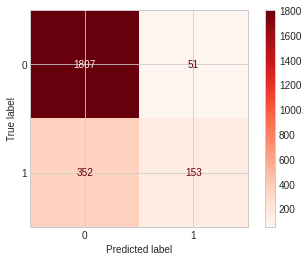

In [206]:
# Check Performance Model against Train-Set

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_1), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_1), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_log_reg_1, X_train_final_df, y_train, cmap='Reds'))

#### Stratified k-fold Cross Validation with shuffle split

k-fold cross-validation adalah teknik yang sangat berguna untuk mengecek/memvalidasi hasil evaluasi performa model (apakah score train-set itu nilainya konsisten atau tidak). Tapi, karena di sini kita memiliki dataset yang tidak seimbang (imbalanced), jadi dalam kasus ini, Saya akan menggunakan teknik lain untuk mengevaluasi performa model. Ini disebut **`stratified k-fold cross-validation`**.

Dalam **`stratified k-fold cross-validation`**, kita membagi data sedemikian rupa sehingga proporsi antar kelas sama di setiap fold-nya.

Selain itu, Saya akan melakukan *shuffle* data sebelum split datanya karena pengacakan data menghasilkan hasil yang jauh lebih baik.

In [207]:
# Cross Validation using `cross_val_score`
%%time


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

f1_score_train_cross_val = cross_val_score(model_log_reg_1, 
                                           X_train_final_df, 
                                           y_train, 
                                           cv=skf, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.45517241 0.41176471 0.4        0.37583893 0.3880597 ]
F1 Score - Mean - Cross Validation :  0.40616714946849813
F1 Score - Std - Cross Validation  :  0.027271094962507302
F1 Score - Range of Test-Set       :  0.37889605450599084 - 0.4334382444310054
CPU times: user 169 ms, sys: 112 ms, total: 282 ms
Wall time: 153 ms


Berdasarkan hasil cross validation di atas, kita dapat melihat bahwa dari kelima fold itu nilai F1 Score-nya cukup konsisten. Kemudian rata-rata score-nya yaitu `0.41` dan standar deviasi-nya yaitu `0.03` berarti mendekati 0. Yang dapat disimpulkan disini adalah berarti score model yang kita punya itu cukup konsisten namun belum bisa dikatakan baik dalam memprediksi label 1.

F1 Score - Test Set  :  0.3550295857988166 

Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.97      0.89       465
           1       0.70      0.24      0.36       126

    accuracy                           0.82       591
   macro avg       0.76      0.61      0.62       591
weighted avg       0.80      0.82      0.78       591
 

Confusion Matrix      : 


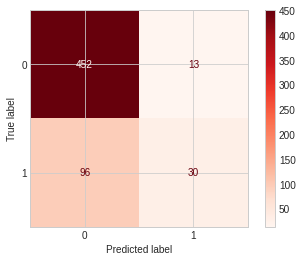

In [208]:
# Check Performance Model against Test-Set

print('F1 Score - Test Set  : ', f1_score(y_test, y_pred_test_1), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_1), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_log_reg_1, X_test_final_df, y_test, cmap='Reds'))

In [209]:
# Save Classification Report into a Dictionary

all_reports = {}
score_reports = {
    'train - precision' : precision_score(y_train,y_pred_train_1),
    'train - recall' : recall_score(y_train,y_pred_train_1),
    'train - accuracy' : accuracy_score(y_train,y_pred_train_1),
    'train - f1_score' : f1_score(y_train,y_pred_train_1),
    'test - precision' : precision_score(y_test,y_pred_test_1),
    'test - recall' : recall_score(y_test,y_pred_test_1),
    'test - accuracy_score' : accuracy_score(y_test,y_pred_test_1),
    'test - f1_score' : f1_score(y_test,y_pred_test_1),
}
all_reports['Baseline (Log_Reg)'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Log_Reg)
test - accuracy_score,0.815567
test - f1_score,0.355030
test - precision,0.697674
test - recall,0.238095
train - accuracy,0.829454
train - f1_score,0.431594
train - precision,0.750000
train - recall,0.302970


Inference:
- Berdasarkan hasil evaluasi model `Logistic Regression` menggunakan `accuracy score` menunjukkan bahwa accuracy score train (0.83) dan accuracy score test  (0.82), artinya model ini dapat dikatakan `good fit` jika kita menangani kasus dengan `data yang balance`. Karena data yang kita punya tidak balance, maka tidak disarankan untuk melihat performansi model dari `accuracy score`.
- Dalam kasus ini Saya akan menggunakan metrics `F1-score` karena Saya mementingkan keduanya (`Precision` dan `Recall`). Disini, label kelas yang menjadi `interest` Saya adalah label 1 yang menyatakan seseorang itu menunggak dalam pembayaran kartu kreditnya. Jadi Saya hanya fokus pada classification report pada label 1. 
Berdasarkan classification report data train, hasilnya menunjukkan bahwa score f1-score yang dimiliki oleh label 1 adalah `0.43` sedangkan pada classification report data test menunjukkan scorenya adalah `0.36`. Artinya, bahwa model `Logistic Regression` ini masih `underfit` atau sederhananya model kita ini masih belum baik untuk memprediksi label 1.
- Hal ini dapat dibuktikan dengan `confusion matrix`. Misalnya pada data train. Dapat dilihat bahwa `False Negative` dan `False Positive` tinggi. 
  1. `False Negative` terjadi ketika model `memprediksikan` bahwa seseorang `tidak menunggak`, padahal aktualnya orang ini menunggak pembayaran kredit. Model ini sudah melakukan salah prediksi sebanyak 352 orang.
  2. `False Positive` terjadi ketika model `memprediksikan` bahwa seseorang `menunggak pembayaran kredit`, padahal aktualnya orang ini tidak menunggak. Model ini sudah melakukan salah prediksi sebanyak 51 orang.

#### Result comparison between imbalanced and balanced dataset

In [210]:
# Check Train Results

print(classification_report(y_train, model_log_reg_1.predict(X_train_final_df)))
print(classification_report(y_train_balanced, model_log_reg_2.predict(X_train_balanced_final)))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1858
           1       0.75      0.30      0.43       505

    accuracy                           0.83      2363
   macro avg       0.79      0.64      0.67      2363
weighted avg       0.82      0.83      0.80      2363

              precision    recall  f1-score   support

           0       0.67      0.64      0.65      1858
           1       0.66      0.68      0.67      1858

    accuracy                           0.66      3716
   macro avg       0.66      0.66      0.66      3716
weighted avg       0.66      0.66      0.66      3716



In [211]:
# Check Test Results

print(classification_report(y_test, model_log_reg_1.predict(X_test_final_df)))
print(classification_report(y_test, model_log_reg_2.predict(X_test_final_df)))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       465
           1       0.70      0.24      0.36       126

    accuracy                           0.82       591
   macro avg       0.76      0.61      0.62       591
weighted avg       0.80      0.82      0.78       591

              precision    recall  f1-score   support

           0       0.90      0.68      0.77       465
           1       0.37      0.71      0.49       126

    accuracy                           0.69       591
   macro avg       0.63      0.69      0.63       591
weighted avg       0.78      0.69      0.71       591



In [212]:
# Cross Validation using `cross_val_score`
%%time

f1_score_train_cross_val = cross_val_score(model_log_reg_2, 
                                           X_train_balanced_final, 
                                           y_train_balanced, 
                                           cv=skf, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.63874346 0.67929293 0.69010417 0.63273728 0.68385346]
F1 Score - Mean - Cross Validation :  0.6649462575817041
F1 Score - Std - Cross Validation  :  0.024167064288995822
F1 Score - Range of Test-Set       :  0.6407791932927083 - 0.6891133218707
CPU times: user 215 ms, sys: 207 ms, total: 422 ms
Wall time: 369 ms


Berdasarkan hasil f1-score pada label 1 dalam kondisi dataset masih *imbalanced*:
- Train set menunjukkan score `0.43` sedangkan Test set menunjukkan scorenya adalah `0.36`. Artinya, bahwa model `Logistic Regression` ini masih `underfit` atau sederhananya model kita ini masih belum baik untuk memprediksi label 1. 

Sedangkan ketika kita menyeimbangkan dataset, perolehan f1-score itu lebih tinggi daripada f1-score tanpa menyeimbangkan dataset, yaitu Train set menunjukkan score `0.67` sedangkan Test set menunjukkan scorenya adalah `0.49`. Kemudian dari hasil validasi evaluasi performa model (cross validation) menggunakan *balanced data* itu menunjukkan score train-set yang nilainya konsisten dan standar deviasi yang lebih kecil daripada tanpa menyeimbangkan dataset.

In [213]:
# Save Classification Report into a Dictionary

all_reports_balanced = {}
score_reports_bal = {
    'train - precision' : precision_score(y_train_balanced, model_log_reg_2.predict(X_train_balanced_final)),
    'train - recall' : recall_score(y_train_balanced, model_log_reg_2.predict(X_train_balanced_final)),
    'train - accuracy' : accuracy_score(y_train_balanced, model_log_reg_2.predict(X_train_balanced_final)),
    'train - f1_score' : f1_score(y_train_balanced, model_log_reg_2.predict(X_train_balanced_final)),
    'test - precision' : precision_score(y_test, model_log_reg_2.predict(X_test_final_df)),
    'test - recall' : recall_score(y_test, model_log_reg_2.predict(X_test_final_df)),
    'test - accuracy_score' : accuracy_score(y_test, model_log_reg_2.predict(X_test_final_df)),
    'test - f1_score' : f1_score(y_test, model_log_reg_2.predict(X_test_final_df)),
}
all_reports_balanced['Baseline (Log_Reg)'] = score_reports_bal
pd.DataFrame(all_reports_balanced)

,Baseline (Log_Reg)
test - accuracy_score,0.685279
test - f1_score,0.489011
test - precision,0.373950
test - recall,0.706349
train - accuracy,0.662002
train - f1_score,0.668951
train - precision,0.655475
train - recall,0.682992


### SVM (Support Vector Machine)

In [214]:
# Predict Train-Set and Test-Set

y_pred_train_2 = model_svm_1.predict(X_train_final_df)
y_pred_test_2 = model_svm_1.predict(X_test_final_df)

In [215]:
# Model Evaluation using accuracy score
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_2))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_2))

accuracy score train :  0.830300465509945
accuracy score test :  0.8155668358714044


F1 Score - Train Set  :  0.4484181568088033 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      1858
           1       0.73      0.32      0.45       505

    accuracy                           0.83      2363
   macro avg       0.79      0.65      0.67      2363
weighted avg       0.82      0.83      0.80      2363
 

Confusion Matrix      : 


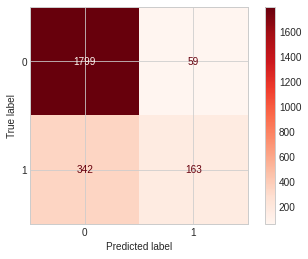

In [216]:
# Check Performance Model against Train-Set

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_2), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_2), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_svm_1, X_train_final_df, y_train, cmap='Reds'))

#### Stratified k-fold Cross Validation with shuffle split

In [217]:
# Cross Validation using `cross_val_score`
%%time


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

f1_score_train_cross_val = cross_val_score(model_svm_1, 
                                           X_train_final_df, 
                                           y_train, 
                                           cv=skf, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.47368421 0.4        0.45517241 0.39473684 0.42857143]
F1 Score - Mean - Cross Validation :  0.43043297899922217
F1 Score - Std - Cross Validation  :  0.030615533418333698
F1 Score - Range of Test-Set       :  0.3998174455808885 - 0.46104851241755584
CPU times: user 1.21 s, sys: 3.02 ms, total: 1.21 s
Wall time: 1.24 s


Berdasarkan hasil cross validation di atas, kita dapat melihat bahwa dari kelima fold itu nilai F1 Score-nya cukup konsisten. Kemudian rata-rata score-nya yaitu `0.43` dan standar deviasi-nya yaitu `0.03` berarti mendekati 0. Yang dapat disimpulkan disini adalah berarti score model yang kita punya itu cukup konsisten namun belum bisa dikatakan baik dalam memprediksi label 1.

F1 Score - Test Set  :  0.3393939393939394 

Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.98      0.89       465
           1       0.72      0.22      0.34       126

    accuracy                           0.82       591
   macro avg       0.77      0.60      0.62       591
weighted avg       0.80      0.82      0.77       591
 

Confusion Matrix      : 


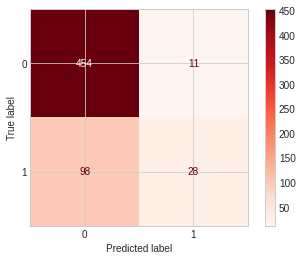

In [218]:
# Check Performance Model against Test-Set

print('F1 Score - Test Set  : ', f1_score(y_test, y_pred_test_2), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_2), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_svm_1, X_test_final_df, y_test, cmap='Reds'))

In [219]:
# Save Classification Report into a Dictionary

score_reports = {
    'train - precision' : precision_score(y_train, y_pred_train_2),
    'train - recall' : recall_score(y_train, y_pred_train_2),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_2),
    'train - f1_score' : f1_score(y_train, y_pred_train_2),
    'test - precision' : precision_score(y_test, y_pred_test_2),
    'test - recall' : recall_score(y_test, y_pred_test_2),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_2),
    'test - f1_score' : f1_score(y_test, y_pred_test_2),
}
all_reports['Baseline (SVM)'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Log_Reg),Baseline (SVM)
train - precision,0.750000,0.734234
train - recall,0.302970,0.322772
train - accuracy,0.829454,0.830300
train - f1_score,0.431594,0.448418
test - precision,0.697674,0.717949
test - recall,0.238095,0.222222
test - accuracy_score,0.815567,0.815567
test - f1_score,0.355030,0.339394


Inference:
- Berdasarkan hasil evaluasi model `SVM` menggunakan `accuracy score` menunjukkan bahwa accuracy score train (0.83) dan accuracy score test  (0.82), artinya model ini dapat dikatakan `good fit` jika kita menangani kasus dengan `data yang balance`. Karena data yang kita punya tidak balance, maka tidak disarankan untuk melihat performansi model dari `accuracy score`.
- Berdasarkan classification report data train, hasilnya menunjukkan bahwa score f1-score yang dimiliki oleh label 1 adalah `0.45` sedangkan pada classification report data test menunjukkan scorenya adalah `0.34`. Artinya, bahwa model `SVM` ini masih `underfit` atau sederhananya model kita ini masih belum baik untuk memprediksi label 1.
- Hal ini dapat dibuktikan dengan `confusion matrix`. Misalnya pada data train. Dapat dilihat bahwa `False Negative` dan `False Positive` tinggi. 
  1. `False Negative` terjadi ketika model `memprediksikan` bahwa seseorang `tidak menunggak`, padahal aktualnya orang ini menunggak pembayaran kredit. Model ini sudah melakukan salah prediksi sebanyak 342 orang.
  2. `False Positive` terjadi ketika model `memprediksikan` bahwa seseorang `menunggak pembayaran kredit`, padahal aktualnya orang ini tidak menunggak. Model ini sudah melakukan salah prediksi sebanyak 59 orang.

#### Result comparison between imbalanced and balanced dataset

In [220]:
# Check Train Results

print(classification_report(y_train, model_svm_1.predict(X_train_final_df)))
print(classification_report(y_train_balanced, model_svm_2.predict(X_train_balanced_final)))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1858
           1       0.73      0.32      0.45       505

    accuracy                           0.83      2363
   macro avg       0.79      0.65      0.67      2363
weighted avg       0.82      0.83      0.80      2363

              precision    recall  f1-score   support

           0       0.66      0.88      0.75      1858
           1       0.82      0.54      0.65      1858

    accuracy                           0.71      3716
   macro avg       0.74      0.71      0.70      3716
weighted avg       0.74      0.71      0.70      3716



In [221]:
# Check Test Results

print(classification_report(y_test, model_svm_1.predict(X_test_final_df)))
print(classification_report(y_test, model_svm_2.predict(X_test_final_df)))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89       465
           1       0.72      0.22      0.34       126

    accuracy                           0.82       591
   macro avg       0.77      0.60      0.62       591
weighted avg       0.80      0.82      0.77       591

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       465
           1       0.56      0.55      0.55       126

    accuracy                           0.81       591
   macro avg       0.72      0.71      0.72       591
weighted avg       0.81      0.81      0.81       591



In [222]:
# Cross Validation using `cross_val_score`
%%time

f1_score_train_cross_val = cross_val_score(model_svm_2, 
                                           X_train_balanced_final, 
                                           y_train_balanced, 
                                           cv=skf, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.64535769 0.6466877  0.65681445 0.59296482 0.63893511]
F1 Score - Mean - Cross Validation :  0.6361519531612079
F1 Score - Std - Cross Validation  :  0.02234081585697258
F1 Score - Range of Test-Set       :  0.6138111373042353 - 0.6584927690181804
CPU times: user 2.87 s, sys: 10 ms, total: 2.88 s
Wall time: 2.86 s


Berdasarkan hasil f1-score pada label 1 dalam kondisi dataset masih *imbalanced*:
- Train set menunjukkan score `0.45` sedangkan Test set menunjukkan scorenya adalah `0.34`. Artinya, bahwa model `SVM` ini masih `underfit` atau sederhananya model kita ini masih belum baik untuk memprediksi label 1. 

Sedangkan ketika kita menyeimbangkan dataset, perolehan f1-score itu lebih tinggi daripada f1-score tanpa menyeimbangkan dataset, yaitu Train set menunjukkan score `0.65` sedangkan Test set menunjukkan scorenya adalah `0.55`. Kemudian dari hasil validasi evaluasi performa model (cross validation) menggunakan *balanced data* itu menunjukkan score train-set yang nilainya konsisten dan standar deviasi yang lebih kecil daripada tanpa menyeimbangkan dataset.

In [223]:
# Save Classification Report into a Dictionary

score_reports_bal = {
    'train - precision' : precision_score(y_train_balanced, model_svm_2.predict(X_train_balanced_final)),
    'train - recall' : recall_score(y_train_balanced, model_svm_2.predict(X_train_balanced_final)),
    'train - accuracy' : accuracy_score(y_train_balanced, model_svm_2.predict(X_train_balanced_final)),
    'train - f1_score' : f1_score(y_train_balanced, model_svm_2.predict(X_train_balanced_final)),
    'test - precision' : precision_score(y_test, model_svm_2.predict(X_test_final_df)),
    'test - recall' : recall_score(y_test, model_svm_2.predict(X_test_final_df)),
    'test - accuracy_score' : accuracy_score(y_test, model_svm_2.predict(X_test_final_df)),
    'test - f1_score' : f1_score(y_test, model_svm_2.predict(X_test_final_df)),
}
all_reports_balanced['Baseline (SVM)'] = score_reports_bal
pd.DataFrame(all_reports_balanced)

,Baseline (Log_Reg),Baseline (SVM)
train - precision,0.655475,0.816788
train - recall,0.682992,0.544672
train - accuracy,0.662002,0.711249
train - f1_score,0.668951,0.653536
test - precision,0.373950,0.556452
test - recall,0.706349,0.547619
test - accuracy_score,0.685279,0.810491
test - f1_score,0.489011,0.552000


### Decision Tree

In [224]:
# Predict Train-Set and Test-Set

y_pred_train_3 = model_dtc_1.predict(X_train_final_df)
y_pred_test_3 = model_dtc_1.predict(X_test_final_df)

In [225]:
# Model Evaluation using accuracy score
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_3))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_3))

accuracy score train :  0.9995768091409225
accuracy score test :  0.7461928934010152


F1 Score - Train Set  :  0.9990089197224975 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1858
           1       1.00      1.00      1.00       505

    accuracy                           1.00      2363
   macro avg       1.00      1.00      1.00      2363
weighted avg       1.00      1.00      1.00      2363
 

Confusion Matrix      : 


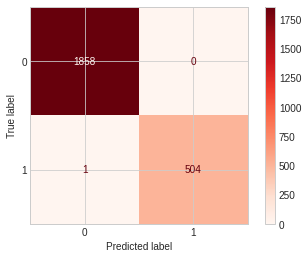

In [226]:
# Check Performance Model against Train-Set

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_3), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_3), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_dtc_1, X_train_final_df, y_train, cmap='Reds'))

#### Stratified k-fold Cross Validation with shuffle split

In [227]:
# Cross Validation using `cross_val_score`
%%time


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

f1_score_train_cross_val = cross_val_score(model_dtc_1, 
                                           X_train_final_df, 
                                           y_train, 
                                           cv=skf, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.42253521 0.3853211  0.40375587 0.43049327 0.4137931 ]
F1 Score - Mean - Cross Validation :  0.4111797115441028
F1 Score - Std - Cross Validation  :  0.015700777412014772
F1 Score - Range of Test-Set       :  0.39547893413208807 - 0.4268804889561176
CPU times: user 128 ms, sys: 0 ns, total: 128 ms
Wall time: 128 ms


Kita dapat melihat bahwa f1-score pada hasil prediksi data train (sebelum dilakukan cross validation) yaitu `0.99` itu tidak konsisten terlihat dari hasil cross validation di atas menyatakan rata-rata score-nya yaitu `0.41` dan standar deviasi-nya yaitu `0.008` berarti mendekati 0. Yang dapat disimpulkan disini adalah berarti score model yang kita punya itu belum bisa dikatakan baik dalam memprediksi label 1.

F1 Score - Test Set  :  0.3902439024390244 

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       465
           1       0.40      0.38      0.39       126

    accuracy                           0.75       591
   macro avg       0.62      0.61      0.61       591
weighted avg       0.74      0.75      0.74       591
 

Confusion Matrix      : 


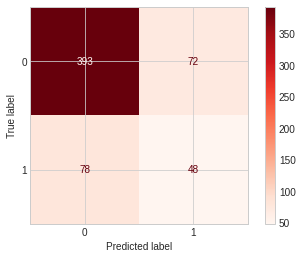

In [228]:
# Check Performance Model against Test-Set

print('F1 Score - Test Set  : ', f1_score(y_test, y_pred_test_3), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_3), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_dtc_1, X_test_final_df, y_test, cmap='Reds'))

In [229]:
# Save Classification Report into a Dictionary

score_reports = {
    'train - precision' : precision_score(y_train, y_pred_train_3),
    'train - recall' : recall_score(y_train, y_pred_train_3),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_3),
    'train - f1_score' : f1_score(y_train, y_pred_train_3),
    'test - precision' : precision_score(y_test, y_pred_test_3),
    'test - recall' : recall_score(y_test, y_pred_test_3),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_3),
    'test - f1_score' : f1_score(y_test, y_pred_test_3),
}
all_reports['Baseline (Decision Tree)'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Log_Reg),Baseline (SVM),Baseline (Decision Tree)
train - precision,0.750000,0.734234,1.000000
train - recall,0.302970,0.322772,0.998020
train - accuracy,0.829454,0.830300,0.999577
train - f1_score,0.431594,0.448418,0.999009
test - precision,0.697674,0.717949,0.400000
test - recall,0.238095,0.222222,0.380952
test - accuracy_score,0.815567,0.815567,0.746193
test - f1_score,0.355030,0.339394,0.390244


Inference:
- Berdasarkan hasil evaluasi model `Decision Tree` menggunakan `accuracy score` menunjukkan bahwa accuracy score train (0.99) dan accuracy score test  (0.75), artinya model ini dapat dikatakan `overfit` jika kita menangani kasus dengan `data yang balance`. Karena data yang kita punya tidak balance, maka tidak disarankan untuk melihat performansi model dari `accuracy score`.
- Berdasarkan classification report data train, hasilnya menunjukkan bahwa score f1-score yang dimiliki oleh label 1 adalah `0.99` sedangkan pada classification report data test menunjukkan scorenya adalah `0.42`. Artinya, bahwa model `Decision Tree` ini `overfit` atau sederhananya model kita ini hanya bagus ketika di training saja, namun masih belum baik untuk memprediksi label 1 pada data test.
- Hal ini dapat dibuktikan dengan `confusion matrix`. Misalnya pada data test. Dapat dilihat bahwa `False Negative` dan `False Positive` tinggi. 
  1. `False Negative` terjadi ketika model `memprediksikan` bahwa seseorang `tidak menunggak`, padahal aktualnya orang ini menunggak pembayaran kredit. Model ini sudah melakukan salah prediksi sebanyak 74 orang.
  2. `False Positive` terjadi ketika model `memprediksikan` bahwa seseorang `menunggak pembayaran kredit`, padahal aktualnya orang ini tidak menunggak. Model ini sudah melakukan salah prediksi sebanyak 72 orang.

#### Result comparison between imbalanced and balanced dataset

In [230]:
# Check Train Results

print(classification_report(y_train, model_dtc_1.predict(X_train_final_df)))
print(classification_report(y_train_balanced, model_dtc_2.predict(X_train_balanced_final)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1858
           1       1.00      1.00      1.00       505

    accuracy                           1.00      2363
   macro avg       1.00      1.00      1.00      2363
weighted avg       1.00      1.00      1.00      2363

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1858
           1       1.00      1.00      1.00      1858

    accuracy                           1.00      3716
   macro avg       1.00      1.00      1.00      3716
weighted avg       1.00      1.00      1.00      3716



In [231]:
# Check Test Results

print(classification_report(y_test, model_dtc_1.predict(X_test_final_df)))
print(classification_report(y_test, model_dtc_2.predict(X_test_final_df)))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       465
           1       0.40      0.38      0.39       126

    accuracy                           0.75       591
   macro avg       0.62      0.61      0.61       591
weighted avg       0.74      0.75      0.74       591

              precision    recall  f1-score   support

           0       0.85      0.73      0.78       465
           1       0.34      0.52      0.41       126

    accuracy                           0.68       591
   macro avg       0.59      0.62      0.60       591
weighted avg       0.74      0.68      0.70       591



In [232]:
# Cross Validation using `cross_val_score`
%%time

f1_score_train_cross_val = cross_val_score(model_dtc_2, 
                                           X_train_balanced_final, 
                                           y_train_balanced, 
                                           cv=skf, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.76821192 0.75366178 0.77284595 0.76264591 0.76401565]
F1 Score - Mean - Cross Validation :  0.7642762435176986
F1 Score - Std - Cross Validation  :  0.006392528504158486
F1 Score - Range of Test-Set       :  0.7578837150135401 - 0.7706687720218571
CPU times: user 185 ms, sys: 2.95 ms, total: 188 ms
Wall time: 187 ms


Berdasarkan hasil f1-score pada label 1 dalam kondisi dataset masih *imbalanced*:
- Train set menunjukkan score `0.99` sedangkan Test set menunjukkan scorenya adalah `0.42`. Artinya, bahwa model `Decision Tree` ini `overfit` atau sederhananya model kita ini hanya bagus ketika di training saja, namun masih belum baik untuk memprediksi label 1 pada data test.

Bahkan ketika kita menyeimbangkan dataset, perolehan f1-score itu sama saja jeleknya dengan f1-score tanpa menyeimbangkan dataset, yaitu Train set menunjukkan score `1.00` sedangkan Test set menunjukkan scorenya adalah `0.39`. Kemudian dari hasil validasi evaluasi performa model (cross validation) menggunakan *balanced data* itu menunjukkan score train-set yang nilainya tidak konsisten dan standar deviasi yang lebih kecil daripada tanpa menyeimbangkan dataset.

In [233]:
# Save Classification Report into a Dictionary

score_reports_bal = {
    'train - precision' : precision_score(y_train_balanced, model_dtc_2.predict(X_train_balanced_final)),
    'train - recall' : recall_score(y_train_balanced, model_dtc_2.predict(X_train_balanced_final)),
    'train - accuracy' : accuracy_score(y_train_balanced, model_dtc_2.predict(X_train_balanced_final)),
    'train - f1_score' : f1_score(y_train_balanced, model_dtc_2.predict(X_train_balanced_final)),
    'test - precision' : precision_score(y_test, model_dtc_2.predict(X_test_final_df)),
    'test - recall' : recall_score(y_test, model_dtc_2.predict(X_test_final_df)),
    'test - accuracy_score' : accuracy_score(y_test, model_dtc_2.predict(X_test_final_df)),
    'test - f1_score' : f1_score(y_test, model_dtc_2.predict(X_test_final_df)),
}
all_reports_balanced['Baseline (Decision Tree)'] = score_reports_bal
pd.DataFrame(all_reports_balanced)

,Baseline (Log_Reg),Baseline (SVM),Baseline (Decision Tree)
train - precision,0.655475,0.816788,1.000000
train - recall,0.682992,0.544672,0.999462
train - accuracy,0.662002,0.711249,0.999731
train - f1_score,0.668951,0.653536,0.999731
test - precision,0.373950,0.556452,0.340314
test - recall,0.706349,0.547619,0.515873
test - accuracy_score,0.685279,0.810491,0.683587
test - f1_score,0.489011,0.552000,0.410095


### Random Forest

In [234]:
# Predict Train-Set and Test-Set

y_pred_train_4 = model_rf_1.predict(X_train_final_df)
y_pred_test_4 = model_rf_1.predict(X_test_final_df)

In [235]:
# Model Evaluation using accuracy score
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_4))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_4))

accuracy score train :  0.9995768091409225
accuracy score test :  0.8274111675126904


F1 Score - Train Set  :  0.9990089197224975 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1858
           1       1.00      1.00      1.00       505

    accuracy                           1.00      2363
   macro avg       1.00      1.00      1.00      2363
weighted avg       1.00      1.00      1.00      2363
 

Confusion Matrix      : 


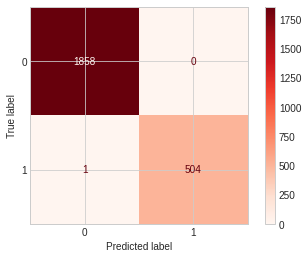

In [236]:
# Check Performance Model against Train-Set

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_4), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_4), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_rf_1, X_train_final_df, y_train, cmap='Reds'))

#### Stratified k-fold Cross Validation with shuffle split

In [237]:
# Cross Validation using `cross_val_score`
%%time


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

f1_score_train_cross_val = cross_val_score(model_rf_1, 
                                           X_train_final_df, 
                                           y_train, 
                                           cv=skf, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.52439024 0.50955414 0.45283019 0.44311377 0.53503185]
F1 Score - Mean - Cross Validation :  0.4929840384595841
F1 Score - Std - Cross Validation  :  0.03775794302512032
F1 Score - Range of Test-Set       :  0.4552260954344638 - 0.5307419814847044
CPU times: user 2.39 s, sys: 14 ms, total: 2.4 s
Wall time: 2.41 s


Kita dapat melihat bahwa f1-score pada hasil prediksi data train (sebelum dilakukan cross validation) yaitu `0.99` itu tidak konsisten terlihat dari hasil cross validation di atas menyatakan rata-rata score-nya yaitu `0.49` dan standar deviasi-nya yaitu `0.05` berarti mendekati 0. Yang dapat disimpulkan disini adalah berarti score model yang kita punya itu belum bisa dikatakan baik dalam memprediksi label 1.

F1 Score - Test Set  :  0.48999999999999994 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       465
           1       0.66      0.39      0.49       126

    accuracy                           0.83       591
   macro avg       0.76      0.67      0.69       591
weighted avg       0.81      0.83      0.81       591
 

Confusion Matrix      : 


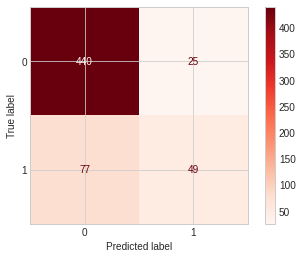

In [238]:
# Check Performance Model against Test-Set

print('F1 Score - Test Set  : ', f1_score(y_test, y_pred_test_4), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_4), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_rf_1, X_test_final_df, y_test, cmap='Reds'))

In [239]:
# Save Classification Report into a Dictionary

score_reports = {
    'train - precision' : precision_score(y_train, y_pred_train_4),
    'train - recall' : recall_score(y_train, y_pred_train_4),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_4),
    'train - f1_score' : f1_score(y_train, y_pred_train_4),
    'test - precision' : precision_score(y_test, y_pred_test_4),
    'test - recall' : recall_score(y_test, y_pred_test_4),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_4),
    'test - f1_score' : f1_score(y_test, y_pred_test_4),
}
all_reports['Baseline (Random Forest)'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Log_Reg),Baseline (SVM),Baseline (Decision Tree),Baseline (Random Forest)
train - precision,0.750000,0.734234,1.000000,1.000000
train - recall,0.302970,0.322772,0.998020,0.998020
train - accuracy,0.829454,0.830300,0.999577,0.999577
train - f1_score,0.431594,0.448418,0.999009,0.999009
test - precision,0.697674,0.717949,0.400000,0.662162
test - recall,0.238095,0.222222,0.380952,0.388889
test - accuracy_score,0.815567,0.815567,0.746193,0.827411
test - f1_score,0.355030,0.339394,0.390244,0.490000


Inference:
- Berdasarkan hasil evaluasi model `Random Forest` menggunakan `accuracy score` menunjukkan bahwa accuracy score train (0.99) dan accuracy score test  (0.83), artinya model ini dapat dikatakan `overfit` jika kita menangani kasus dengan `data yang balance`. Karena data yang kita punya tidak balance, maka tidak disarankan untuk melihat performansi model dari `accuracy score`.
- Berdasarkan classification report data train, hasilnya menunjukkan bahwa score f1-score yang dimiliki oleh label 1 adalah `0.99` sedangkan pada classification report data test menunjukkan scorenya adalah `0.47`. Artinya, bahwa model `Random Forest` ini `overfit` atau sederhananya model kita ini hanya bagus ketika di training saja, namun masih belum baik untuk memprediksi label 1 pada data test.
- Hal ini dapat dibuktikan dengan `confusion matrix`. Misalnya pada data test. Dapat dilihat bahwa `False Negative` dan `False Positive` tinggi. 
  1. `False Negative` terjadi ketika model `memprediksikan` bahwa seseorang `tidak menunggak`, padahal aktualnya orang ini menunggak pembayaran kredit. Model ini sudah melakukan salah prediksi sebanyak 81 orang.
  2. `False Positive` terjadi ketika model `memprediksikan` bahwa seseorang `menunggak pembayaran kredit`, padahal aktualnya orang ini tidak menunggak. Model ini sudah melakukan salah prediksi sebanyak 22 orang.

#### Result comparison between imbalanced and balanced dataset

In [240]:
# Check Train Results

print(classification_report(y_train, model_rf_1.predict(X_train_final_df)))
print(classification_report(y_train_balanced, model_rf_2.predict(X_train_balanced_final)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1858
           1       1.00      1.00      1.00       505

    accuracy                           1.00      2363
   macro avg       1.00      1.00      1.00      2363
weighted avg       1.00      1.00      1.00      2363

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1858
           1       1.00      1.00      1.00      1858

    accuracy                           1.00      3716
   macro avg       1.00      1.00      1.00      3716
weighted avg       1.00      1.00      1.00      3716



In [241]:
# Check Test Results

print(classification_report(y_test, model_rf_1.predict(X_test_final_df)))
print(classification_report(y_test, model_rf_2.predict(X_test_final_df)))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       465
           1       0.66      0.39      0.49       126

    accuracy                           0.83       591
   macro avg       0.76      0.67      0.69       591
weighted avg       0.81      0.83      0.81       591

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       465
           1       0.54      0.47      0.50       126

    accuracy                           0.80       591
   macro avg       0.70      0.68      0.69       591
weighted avg       0.79      0.80      0.80       591



In [242]:
# Cross Validation using `cross_val_score`
%%time

f1_score_train_cross_val = cross_val_score(model_rf_2, 
                                           X_train_balanced_final, 
                                           y_train_balanced, 
                                           cv=skf, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.82385576 0.85396384 0.87292818 0.83606557 0.86676017]
F1 Score - Mean - Cross Validation :  0.850714702685684
F1 Score - Std - Cross Validation  :  0.01842526680521775
F1 Score - Range of Test-Set       :  0.8322894358804663 - 0.8691399694909018
CPU times: user 4.62 s, sys: 19.9 ms, total: 4.64 s
Wall time: 6.08 s


Berdasarkan hasil f1-score pada label 1 dalam kondisi dataset masih *imbalanced*:
- Train set menunjukkan score `0.99` sedangkan Test set menunjukkan scorenya adalah `0.47`. Artinya, bahwa model `Random Forest` ini `overfit` atau sederhananya model kita ini hanya bagus ketika di training saja, namun masih belum baik untuk memprediksi label 1 pada data test.

Bahkan ketika kita menyeimbangkan dataset, perolehan f1-score itu sama saja jeleknya dengan f1-score tanpa menyeimbangkan dataset, yaitu Train set menunjukkan score `1.00` sedangkan Test set menunjukkan scorenya adalah `0.48`. Kemudian dari hasil validasi evaluasi performa model (cross validation) menggunakan *balanced data* itu menunjukkan score train-set yang nilainya juga tidak konsisten dan standar deviasi yang lebih rendah daripada tanpa menyeimbangkan dataset.

In [243]:
# Save Classification Report into a Dictionary

score_reports_bal = {
    'train - precision' : precision_score(y_train_balanced, model_rf_2.predict(X_train_balanced_final)),
    'train - recall' : recall_score(y_train_balanced, model_rf_2.predict(X_train_balanced_final)),
    'train - accuracy' : accuracy_score(y_train_balanced, model_rf_2.predict(X_train_balanced_final)),
    'train - f1_score' : f1_score(y_train_balanced, model_rf_2.predict(X_train_balanced_final)),
    'test - precision' : precision_score(y_test, model_rf_2.predict(X_test_final_df)),
    'test - recall' : recall_score(y_test, model_rf_2.predict(X_test_final_df)),
    'test - accuracy_score' : accuracy_score(y_test, model_rf_2.predict(X_test_final_df)),
    'test - f1_score' : f1_score(y_test, model_rf_2.predict(X_test_final_df)),
}
all_reports_balanced['Baseline (Random Forest)'] = score_reports_bal
pd.DataFrame(all_reports_balanced)

,Baseline (Log_Reg),Baseline (SVM),Baseline (Decision Tree),Baseline (Random Forest)
train - precision,0.655475,0.816788,1.000000,1.000000
train - recall,0.682992,0.544672,0.999462,0.999462
train - accuracy,0.662002,0.711249,0.999731,0.999731
train - f1_score,0.668951,0.653536,0.999731,0.999731
test - precision,0.373950,0.556452,0.340314,0.541284
test - recall,0.706349,0.547619,0.515873,0.468254
test - accuracy_score,0.685279,0.810491,0.683587,0.802030
test - f1_score,0.489011,0.552000,0.410095,0.502128


### AdaBoostClassifier

In [244]:
# Predict Train-Set and Test-Set

y_pred_train_5 = model_abc_1.predict(X_train_final_df)
y_pred_test_5 = model_abc_1.predict(X_test_final_df)

In [245]:
# Model Evaluation using accuracy score
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_5))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_5))

accuracy score train :  0.8451121455776556
accuracy score test :  0.8274111675126904


F1 Score - Train Set  :  0.5355329949238579 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1858
           1       0.75      0.42      0.54       505

    accuracy                           0.85      2363
   macro avg       0.80      0.69      0.72      2363
weighted avg       0.83      0.85      0.83      2363
 

Confusion Matrix      : 


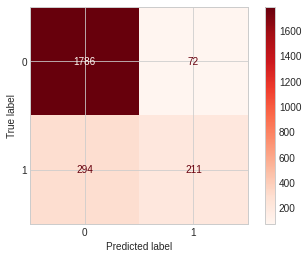

In [246]:
# Check Performance Model against Train-Set

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_5), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_5), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_abc_1, X_train_final_df, y_train, cmap='Reds'))

#### Stratified k-fold Cross Validation with shuffle split

In [247]:
# Cross Validation using `cross_val_score`
%%time


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

f1_score_train_cross_val = cross_val_score(model_abc_1, 
                                           X_train_final_df, 
                                           y_train, 
                                           cv=skf, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.54320988 0.47741935 0.50314465 0.41975309 0.48322148]
F1 Score - Mean - Cross Validation :  0.485349689679958
F1 Score - Std - Cross Validation  :  0.040086895223759196
F1 Score - Range of Test-Set       :  0.4452627944561988 - 0.5254365849037173
CPU times: user 1.05 s, sys: 6.43 ms, total: 1.05 s
Wall time: 1.07 s


Kita dapat melihat bahwa f1-score pada hasil prediksi data train (sebelum dilakukan cross validation) yaitu `0.54` itu tidak konsisten terlihat dari hasil cross validation di atas menyatakan rata-rata score-nya yaitu `0.49` dan standar deviasi-nya yaitu `0.04` berarti mendekati 0. Yang dapat disimpulkan disini adalah berarti score model yang kita punya itu belum bisa dikatakan baik dalam memprediksi label 1.

F1 Score - Test Set  :  0.46875000000000006 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       465
           1       0.68      0.36      0.47       126

    accuracy                           0.83       591
   macro avg       0.76      0.66      0.68       591
weighted avg       0.81      0.83      0.81       591
 

Confusion Matrix      : 


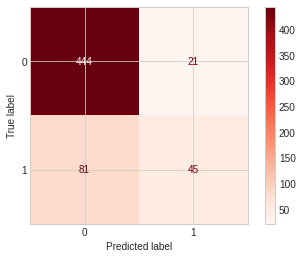

In [248]:
# Check Performance Model against Test-Set

print('F1 Score - Test Set  : ', f1_score(y_test, y_pred_test_5), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_5), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_abc_1, X_test_final_df, y_test, cmap='Reds'))

In [249]:
# Save Classification Report into a Dictionary

score_reports = {
    'train - precision' : precision_score(y_train, y_pred_train_5),
    'train - recall' : recall_score(y_train, y_pred_train_5),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_5),
    'train - f1_score' : f1_score(y_train, y_pred_train_5),
    'test - precision' : precision_score(y_test, y_pred_test_5),
    'test - recall' : recall_score(y_test, y_pred_test_5),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_5),
    'test - f1_score' : f1_score(y_test, y_pred_test_5),
}
all_reports['Baseline (AdaBoostClassifier)'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Log_Reg),Baseline (SVM),Baseline (Decision Tree),Baseline (Random Forest),Baseline (AdaBoostClassifier)
train - precision,0.750000,0.734234,1.000000,1.000000,0.745583
train - recall,0.302970,0.322772,0.998020,0.998020,0.417822
train - accuracy,0.829454,0.830300,0.999577,0.999577,0.845112
train - f1_score,0.431594,0.448418,0.999009,0.999009,0.535533
test - precision,0.697674,0.717949,0.400000,0.662162,0.681818
test - recall,0.238095,0.222222,0.380952,0.388889,0.357143
test - accuracy_score,0.815567,0.815567,0.746193,0.827411,0.827411
test - f1_score,0.355030,0.339394,0.390244,0.490000,0.468750


Inference:
- Berdasarkan hasil evaluasi model `AdaBoostClassifier` menggunakan `accuracy score` menunjukkan bahwa accuracy score train (0.85) dan accuracy score test  (0.83), artinya model ini dapat dikatakan `good fit` jika kita menangani kasus dengan `data yang balance`. Karena data yang kita punya tidak balance, maka tidak disarankan untuk melihat performansi model dari `accuracy score`.
- Berdasarkan classification report data train, hasilnya menunjukkan bahwa score f1-score yang dimiliki oleh label 1 adalah `0.54` sedangkan pada classification report data test menunjukkan scorenya adalah `0.47`. Artinya, bahwa model `AdaBoostClassifier` ini masih `underfit` atau sederhananya model kita ini masih belum baik untuk memprediksi label 1.
- Hal ini dapat dibuktikan dengan `confusion matrix`. Misalnya pada data train. Dapat dilihat bahwa `False Negative` dan `False Positive` tinggi. 
  1. `False Negative` terjadi ketika model `memprediksikan` bahwa seseorang `tidak menunggak`, padahal aktualnya orang ini menunggak pembayaran kredit. Model ini sudah melakukan salah prediksi sebanyak 294 orang.
  2. `False Positive` terjadi ketika model `memprediksikan` bahwa seseorang `menunggak pembayaran kredit`, padahal aktualnya orang ini tidak menunggak. Model ini sudah melakukan salah prediksi sebanyak 72 orang.

#### Result comparison between imbalanced and balanced dataset

In [250]:
# Check Train Results

print(classification_report(y_train, model_abc_1.predict(X_train_final_df)))
print(classification_report(y_train_balanced, model_abc_2.predict(X_train_balanced_final)))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1858
           1       0.75      0.42      0.54       505

    accuracy                           0.85      2363
   macro avg       0.80      0.69      0.72      2363
weighted avg       0.83      0.85      0.83      2363

              precision    recall  f1-score   support

           0       0.71      0.85      0.77      1858
           1       0.81      0.65      0.72      1858

    accuracy                           0.75      3716
   macro avg       0.76      0.75      0.75      3716
weighted avg       0.76      0.75      0.75      3716



In [251]:
# Check Test Results

print(classification_report(y_test, model_abc_1.predict(X_test_final_df)))
print(classification_report(y_test, model_abc_2.predict(X_test_final_df)))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       465
           1       0.68      0.36      0.47       126

    accuracy                           0.83       591
   macro avg       0.76      0.66      0.68       591
weighted avg       0.81      0.83      0.81       591

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       465
           1       0.48      0.51      0.49       126

    accuracy                           0.78       591
   macro avg       0.67      0.68      0.68       591
weighted avg       0.78      0.78      0.78       591



In [252]:
# Cross Validation using `cross_val_score`
%%time

f1_score_train_cross_val = cross_val_score(model_abc_2, 
                                           X_train_balanced_final, 
                                           y_train_balanced, 
                                           cv=skf, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.72093023 0.70175439 0.70072993 0.67062315 0.72238806]
F1 Score - Mean - Cross Validation :  0.7032851501264874
F1 Score - Std - Cross Validation  :  0.018718702118854964
F1 Score - Range of Test-Set       :  0.6845664480076324 - 0.7220038522453424
CPU times: user 1.46 s, sys: 4.44 ms, total: 1.47 s
Wall time: 1.47 s


Berdasarkan hasil f1-score pada label 1 dalam kondisi dataset masih *imbalanced*:
- Train set menunjukkan score `0.54` sedangkan Test set menunjukkan scorenya adalah `0.47`. Artinya, bahwa model `AdaBoostClassifier` ini masih `underfit` atau sederhananya model kita ini masih belum baik untuk memprediksi label 1. 

Sedangkan ketika kita menyeimbangkan dataset, perolehan f1-score itu lebih tinggi daripada f1-score tanpa menyeimbangkan dataset, yaitu Train set menunjukkan score `0.72` sedangkan Test set menunjukkan scorenya adalah `0.49`. Kemudian dari hasil validasi evaluasi performa model (cross validation) menggunakan *balanced data* itu menunjukkan score train-set yang nilainya konsisten dan standar deviasi yang lebih rendah daripada tanpa menyeimbangkan dataset.

In [253]:
# Save Classification Report into a Dictionary

score_reports_bal = {
    'train - precision' : precision_score(y_train_balanced, model_abc_2.predict(X_train_balanced_final)),
    'train - recall' : recall_score(y_train_balanced, model_abc_2.predict(X_train_balanced_final)),
    'train - accuracy' : accuracy_score(y_train_balanced, model_abc_2.predict(X_train_balanced_final)),
    'train - f1_score' : f1_score(y_train_balanced, model_abc_2.predict(X_train_balanced_final)),
    'test - precision' : precision_score(y_test, model_abc_2.predict(X_test_final_df)),
    'test - recall' : recall_score(y_test, model_abc_2.predict(X_test_final_df)),
    'test - accuracy_score' : accuracy_score(y_test, model_abc_2.predict(X_test_final_df)),
    'test - f1_score' : f1_score(y_test, model_abc_2.predict(X_test_final_df)),
}
all_reports_balanced['Baseline (AdaBoostClassifier)'] = score_reports_bal
pd.DataFrame(all_reports_balanced)

,Baseline (Log_Reg),Baseline (SVM),Baseline (Decision Tree),Baseline (Random Forest),Baseline (AdaBoostClassifier)
train - precision,0.655475,0.816788,1.000000,1.000000,0.813844
train - recall,0.682992,0.544672,0.999462,0.999462,0.651776
train - accuracy,0.662002,0.711249,0.999731,0.999731,0.751346
train - f1_score,0.668951,0.653536,0.999731,0.999731,0.723849
test - precision,0.373950,0.556452,0.340314,0.541284,0.481203
test - recall,0.706349,0.547619,0.515873,0.468254,0.507937
test - accuracy_score,0.685279,0.810491,0.683587,0.802030,0.778342
test - f1_score,0.489011,0.552000,0.410095,0.502128,0.494208


### Gradient Boosting

In [254]:
# Predict Train-Set and Test-Set

y_pred_train_6 = model_gb_1.predict(X_train_final_df)
y_pred_test_6 = model_gb_1.predict(X_test_final_df)

In [255]:
# Model Evaluation using accuracy score
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_6))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_6))

accuracy score train :  0.8709267879813796
accuracy score test :  0.8291032148900169


F1 Score - Train Set  :  0.6163522012578616 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      1858
           1       0.84      0.49      0.62       505

    accuracy                           0.87      2363
   macro avg       0.86      0.73      0.77      2363
weighted avg       0.87      0.87      0.86      2363
 

Confusion Matrix      : 


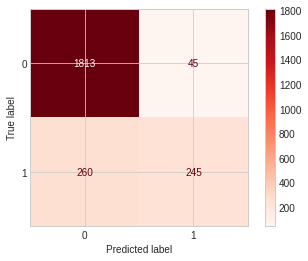

In [256]:
# Check Performance Model against Train-Set

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_6), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_6), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_gb_1, X_train_final_df, y_train, cmap='Reds'))

#### Stratified k-fold Cross Validation with shuffle split

In [257]:
# Cross Validation using `cross_val_score`
%%time


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

f1_score_train_cross_val = cross_val_score(model_gb_1, 
                                           X_train_final_df, 
                                           y_train, 
                                           cv=skf, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.54545455 0.50980392 0.49681529 0.43478261 0.53246753]
F1 Score - Mean - Cross Validation :  0.5038647789621122
F1 Score - Std - Cross Validation  :  0.03848412969220919
F1 Score - Range of Test-Set       :  0.465380649269903 - 0.5423489086543214
CPU times: user 2.5 s, sys: 8 ms, total: 2.51 s
Wall time: 2.52 s


Kita dapat melihat bahwa f1-score pada hasil prediksi data train (sebelum dilakukan cross validation) yaitu `0.62` itu tidak konsisten terlihat dari hasil cross validation di atas menyatakan rata-rata score-nya yaitu `0.51` dan standar deviasi-nya yaitu `0.04` berarti mendekati 0. Yang dapat disimpulkan disini adalah berarti score model yang kita punya itu belum bisa dikatakan baik dalam memprediksi label 1.

F1 Score - Test Set  :  0.46560846560846564 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.96      0.90       465
           1       0.70      0.35      0.47       126

    accuracy                           0.83       591
   macro avg       0.77      0.65      0.68       591
weighted avg       0.81      0.83      0.81       591
 

Confusion Matrix      : 


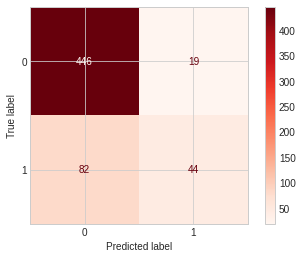

In [258]:
# Check Performance Model against Test-Set

print('F1 Score - Test Set  : ', f1_score(y_test, y_pred_test_6), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_6), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_gb_1, X_test_final_df, y_test, cmap='Reds'))

In [259]:
# Save Classification Report into a Dictionary

score_reports = {
    'train - precision' : precision_score(y_train, y_pred_train_6),
    'train - recall' : recall_score(y_train, y_pred_train_6),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_6),
    'train - f1_score' : f1_score(y_train, y_pred_train_6),
    'test - precision' : precision_score(y_test, y_pred_test_6),
    'test - recall' : recall_score(y_test, y_pred_test_6),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_6),
    'test - f1_score' : f1_score(y_test, y_pred_test_6),
}
all_reports['Baseline (Gradient Boosting)'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Log_Reg),Baseline (SVM),Baseline (Decision Tree),Baseline (Random Forest),Baseline (AdaBoostClassifier),Baseline (Gradient Boosting)
train - precision,0.750000,0.734234,1.000000,1.000000,0.745583,0.844828
train - recall,0.302970,0.322772,0.998020,0.998020,0.417822,0.485149
train - accuracy,0.829454,0.830300,0.999577,0.999577,0.845112,0.870927
train - f1_score,0.431594,0.448418,0.999009,0.999009,0.535533,0.616352
test - precision,0.697674,0.717949,0.400000,0.662162,0.681818,0.698413
test - recall,0.238095,0.222222,0.380952,0.388889,0.357143,0.349206
test - accuracy_score,0.815567,0.815567,0.746193,0.827411,0.827411,0.829103
test - f1_score,0.355030,0.339394,0.390244,0.490000,0.468750,0.465608


Inference:
- Berdasarkan hasil evaluasi model `Gradient Boosting` menggunakan `accuracy score` menunjukkan bahwa accuracy score train (0.87) dan accuracy score test  (0.83), artinya model ini dapat dikatakan `good fit` jika kita menangani kasus dengan `data yang balance`. Karena data yang kita punya tidak balance, maka tidak disarankan untuk melihat performansi model dari `accuracy score`.
- Berdasarkan classification report data train, hasilnya menunjukkan bahwa score f1-score yang dimiliki oleh label 1 adalah `0.62` sedangkan pada classification report data test menunjukkan scorenya adalah `0.47`. Artinya, bahwa model `Gradient Boosting` ini `underfit` atau sederhananya model kita ini masih belum baik untuk memprediksi label 1.
- Hal ini dapat dibuktikan dengan `confusion matrix`. Misalnya pada data train. Dapat dilihat bahwa `False Negative` dan `False Positive` tinggi. 
  1. `False Negative` terjadi ketika model `memprediksikan` bahwa seseorang `tidak menunggak`, padahal aktualnya orang ini menunggak pembayaran kredit. Model ini sudah melakukan salah prediksi sebanyak 260 orang.
  2. `False Positive` terjadi ketika model `memprediksikan` bahwa seseorang `menunggak pembayaran kredit`, padahal aktualnya orang ini tidak menunggak. Model ini sudah melakukan salah prediksi sebanyak 45 orang.

#### Result comparison between imbalanced and balanced dataset

In [260]:
# Check Train Results

print(classification_report(y_train, model_gb_1.predict(X_train_final_df)))
print(classification_report(y_train_balanced, model_gb_2.predict(X_train_balanced_final)))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1858
           1       0.84      0.49      0.62       505

    accuracy                           0.87      2363
   macro avg       0.86      0.73      0.77      2363
weighted avg       0.87      0.87      0.86      2363

              precision    recall  f1-score   support

           0       0.81      0.91      0.85      1858
           1       0.89      0.78      0.84      1858

    accuracy                           0.85      3716
   macro avg       0.85      0.85      0.84      3716
weighted avg       0.85      0.85      0.84      3716



In [261]:
# Check Test Results

print(classification_report(y_test, model_gb_1.predict(X_test_final_df)))
print(classification_report(y_test, model_gb_2.predict(X_test_final_df)))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       465
           1       0.70      0.35      0.47       126

    accuracy                           0.83       591
   macro avg       0.77      0.65      0.68       591
weighted avg       0.81      0.83      0.81       591

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       465
           1       0.55      0.50      0.53       126

    accuracy                           0.81       591
   macro avg       0.71      0.70      0.70       591
weighted avg       0.80      0.81      0.80       591



In [262]:
# Cross Validation using `cross_val_score`
%%time

f1_score_train_cross_val = cross_val_score(model_gb_2, 
                                          X_train_balanced_final, 
                                           y_train_balanced, 
                                           cv=skf, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.7661406  0.80512091 0.80588235 0.76564774 0.80696662]
F1 Score - Mean - Cross Validation :  0.7899516456017592
F1 Score - Std - Cross Validation  :  0.019652219913545654
F1 Score - Range of Test-Set       :  0.7702994256882136 - 0.8096038655153048
CPU times: user 5.67 s, sys: 8.92 ms, total: 5.68 s
Wall time: 5.83 s


Berdasarkan hasil f1-score pada label 1 dalam kondisi dataset masih *imbalanced*:
- Train set menunjukkan score `0.62` sedangkan Test set menunjukkan scorenya adalah `0.47`. Artinya, bahwa model `Gradient Boosting` ini masih `underfit` atau sederhananya model kita ini masih belum baik untuk memprediksi label 1. 

Sedangkan ketika kita menyeimbangkan dataset, perolehan f1-score itu lebih tinggi daripada f1-score tanpa menyeimbangkan dataset, yaitu Train set menunjukkan score `0.84` sedangkan Test set menunjukkan scorenya adalah `0.53`. Kemudian dari hasil validasi evaluasi performa model (cross validation) menggunakan *balanced data* itu menunjukkan score train-set yang nilainya tidak konsisten dan standar deviasi yang lebih rendah daripada tanpa menyeimbangkan dataset.

In [263]:
# Save Classification Report into a Dictionary

score_reports_bal = {
    'train - precision' : precision_score(y_train_balanced, model_gb_2.predict(X_train_balanced_final)),
    'train - recall' : recall_score(y_train_balanced, model_gb_2.predict(X_train_balanced_final)),
    'train - accuracy' : accuracy_score(y_train_balanced, model_gb_2.predict(X_train_balanced_final)),
    'train - f1_score' : f1_score(y_train_balanced, model_gb_2.predict(X_train_balanced_final)),
    'test - precision' : precision_score(y_test, model_gb_2.predict(X_test_final_df)),
    'test - recall' : recall_score(y_test, model_gb_2.predict(X_test_final_df)),
    'test - accuracy_score' : accuracy_score(y_test, model_gb_2.predict(X_test_final_df)),
    'test - f1_score' : f1_score(y_test, model_gb_2.predict(X_test_final_df)),
}
all_reports_balanced['Baseline (Gradient Boosting)'] = score_reports_bal
pd.DataFrame(all_reports_balanced)

,Baseline (Log_Reg),Baseline (SVM),Baseline (Decision Tree),Baseline (Random Forest),Baseline (AdaBoostClassifier),Baseline (Gradient Boosting)
train - precision,0.655475,0.816788,1.000000,1.000000,0.813844,0.894284
train - recall,0.682992,0.544672,0.999462,0.999462,0.651776,0.783100
train - accuracy,0.662002,0.711249,0.999731,0.999731,0.751346,0.845264
train - f1_score,0.668951,0.653536,0.999731,0.999731,0.723849,0.835007
test - precision,0.373950,0.556452,0.340314,0.541284,0.481203,0.552632
test - recall,0.706349,0.547619,0.515873,0.468254,0.507937,0.500000
test - accuracy_score,0.685279,0.810491,0.683587,0.802030,0.778342,0.807107
test - f1_score,0.489011,0.552000,0.410095,0.502128,0.494208,0.525000


### KNN

In [264]:
# Predict Train-Set and Test-Set

y_pred_train_7 = model_knn_1.predict(X_train_final_df)
y_pred_test_7 = model_knn_1.predict(X_test_final_df)

In [265]:
# Model Evaluation using accuracy score
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_7))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_7))

accuracy score train :  0.8548455353364367
accuracy score test :  0.8087986463620981


F1 Score - Train Set  :  0.5770653514180025 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1858
           1       0.76      0.46      0.58       505

    accuracy                           0.85      2363
   macro avg       0.82      0.71      0.74      2363
weighted avg       0.85      0.85      0.84      2363
 

Confusion Matrix      : 


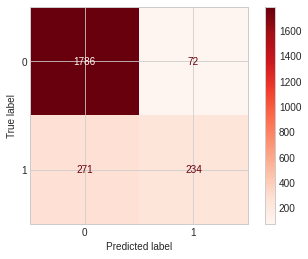

In [266]:
# Check Performance Model against Train-Set

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_7), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_7), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_knn_1, X_train_final_df, y_train, cmap='Reds'))

#### Stratified k-fold Cross Validation with shuffle split

In [267]:
# Cross Validation using `cross_val_score`
%%time


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

f1_score_train_cross_val = cross_val_score(model_knn_1, 
                                           X_train_final_df, 
                                           y_train, 
                                           cv=skf, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.56140351 0.44594595 0.48407643 0.43529412 0.47435897]
F1 Score - Mean - Cross Validation :  0.48021579596898556
F1 Score - Std - Cross Validation  :  0.04434643478933746
F1 Score - Range of Test-Set       :  0.4358693611796481 - 0.524562230758323
CPU times: user 189 ms, sys: 79 µs, total: 189 ms
Wall time: 188 ms


Kita dapat melihat bahwa f1-score pada hasil prediksi data train (sebelum dilakukan cross validation) yaitu `0.58` itu tidak konsisten terlihat dari hasil cross validation di atas menyatakan rata-rata score-nya yaitu `0.48` dan standar deviasi-nya yaitu `0.04` berarti mendekati 0. Yang dapat disimpulkan disini adalah berarti score model yang kita punya itu belum bisa dikatakan baik dalam memprediksi label 1.

F1 Score - Test Set  :  0.3891891891891892 

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.95      0.89       465
           1       0.61      0.29      0.39       126

    accuracy                           0.81       591
   macro avg       0.72      0.62      0.64       591
weighted avg       0.78      0.81      0.78       591
 

Confusion Matrix      : 


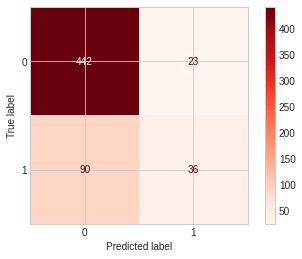

In [268]:
# Check Performance Model against Test-Set

print('F1 Score - Test Set  : ', f1_score(y_test, y_pred_test_7), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_7), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_knn_1, X_test_final_df, y_test, cmap='Reds'))

In [269]:
# Save Classification Report into a Dictionary

score_reports = {
    'train - precision' : precision_score(y_train, y_pred_train_7),
    'train - recall' : recall_score(y_train, y_pred_train_7),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_7),
    'train - f1_score' : f1_score(y_train, y_pred_train_7),
    'test - precision' : precision_score(y_test, y_pred_test_7),
    'test - recall' : recall_score(y_test, y_pred_test_7),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_7),
    'test - f1_score' : f1_score(y_test, y_pred_test_7),
}
all_reports['Baseline (KNN)'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Log_Reg),Baseline (SVM),Baseline (Decision Tree),Baseline (Random Forest),Baseline (AdaBoostClassifier),Baseline (Gradient Boosting),Baseline (KNN)
train - precision,0.750000,0.734234,1.000000,1.000000,0.745583,0.844828,0.764706
train - recall,0.302970,0.322772,0.998020,0.998020,0.417822,0.485149,0.463366
train - accuracy,0.829454,0.830300,0.999577,0.999577,0.845112,0.870927,0.854846
train - f1_score,0.431594,0.448418,0.999009,0.999009,0.535533,0.616352,0.577065
test - precision,0.697674,0.717949,0.400000,0.662162,0.681818,0.698413,0.610169
test - recall,0.238095,0.222222,0.380952,0.388889,0.357143,0.349206,0.285714
test - accuracy_score,0.815567,0.815567,0.746193,0.827411,0.827411,0.829103,0.808799
test - f1_score,0.355030,0.339394,0.390244,0.490000,0.468750,0.465608,0.389189


Inference:
- Berdasarkan hasil evaluasi model `KNN` menggunakan `accuracy score` menunjukkan bahwa accuracy score train (0.85) dan accuracy score test  (0.81), artinya model ini dapat dikatakan `good fit` jika kita menangani kasus dengan `data yang balance`. Karena data yang kita punya tidak balance, maka tidak disarankan untuk melihat performansi model dari `accuracy score`.
- Berdasarkan classification report data train, hasilnya menunjukkan bahwa score f1-score yang dimiliki oleh label 1 adalah `0.58` sedangkan pada classification report data test menunjukkan scorenya adalah `0.39`. Artinya, bahwa model `KNN` ini masih `underfit` atau sederhananya model kita ini masih belum baik untuk memprediksi label 1.
- Hal ini dapat dibuktikan dengan `confusion matrix`. Misalnya pada data train. Dapat dilihat bahwa `False Negative` dan `False Positive` tinggi. 
  1. `False Negative` terjadi ketika model `memprediksikan` bahwa seseorang `tidak menunggak`, padahal aktualnya orang ini menunggak pembayaran kredit. Model ini sudah melakukan salah prediksi sebanyak 271 orang.
  2. `False Positive` terjadi ketika model `memprediksikan` bahwa seseorang `menunggak pembayaran kredit`, padahal aktualnya orang ini tidak menunggak. Model ini sudah melakukan salah prediksi sebanyak 72 orang.

#### Result comparison between imbalanced and balanced dataset

In [270]:
# Check Train Results

print(classification_report(y_train, model_knn_1.predict(X_train_final_df)))
print(classification_report(y_train_balanced, model_knn_2.predict(X_train_balanced_final)))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1858
           1       0.76      0.46      0.58       505

    accuracy                           0.85      2363
   macro avg       0.82      0.71      0.74      2363
weighted avg       0.85      0.85      0.84      2363

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1858
           1       0.82      0.90      0.86      1858

    accuracy                           0.85      3716
   macro avg       0.86      0.85      0.85      3716
weighted avg       0.86      0.85      0.85      3716



In [271]:
# Check Test Results

print(classification_report(y_test, model_knn_1.predict(X_test_final_df)))
print(classification_report(y_test, model_knn_2.predict(X_test_final_df)))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       465
           1       0.61      0.29      0.39       126

    accuracy                           0.81       591
   macro avg       0.72      0.62      0.64       591
weighted avg       0.78      0.81      0.78       591

              precision    recall  f1-score   support

           0       0.86      0.72      0.78       465
           1       0.35      0.56      0.43       126

    accuracy                           0.69       591
   macro avg       0.60      0.64      0.61       591
weighted avg       0.75      0.69      0.71       591



In [272]:
# Cross Validation using `cross_val_score`
%%time

f1_score_train_cross_val = cross_val_score(model_knn_2, 
                                           X_train_balanced_final, 
                                           y_train_balanced, 
                                           cv=skf, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.77377892 0.77935484 0.7979408  0.78509317 0.78974359]
F1 Score - Mean - Cross Validation :  0.7851822628808823
F1 Score - Std - Cross Validation  :  0.008337732927710107
F1 Score - Range of Test-Set       :  0.7768445299531722 - 0.7935199958085924
CPU times: user 326 ms, sys: 7.24 ms, total: 333 ms
Wall time: 330 ms


Berdasarkan hasil f1-score pada label 1 dalam kondisi dataset masih *imbalanced*:
- Train set menunjukkan score `0.58` sedangkan Test set menunjukkan scorenya adalah `0.39`. Artinya, bahwa model `SVM` ini masih `underfit` atau sederhananya model kita ini masih belum baik untuk memprediksi label 1. 

Sedangkan ketika kita menyeimbangkan dataset, perolehan f1-score itu lebih tinggi daripada f1-score tanpa menyeimbangkan dataset, yaitu Train set menunjukkan score `0.86` sedangkan Test set menunjukkan scorenya adalah `0.43`. Kemudian dari hasil validasi evaluasi performa model (cross validation) menggunakan *balanced data* itu menunjukkan score train-set yang nilainya tidak konsisten dan standar deviasi yang lebih kecil daripada tanpa menyeimbangkan dataset.

In [273]:
# Save Classification Report into a Dictionary

score_reports_bal = {
    'train - precision' : precision_score(y_train_balanced, model_knn_2.predict(X_train_balanced_final)),
    'train - recall' : recall_score(y_train_balanced, model_knn_2.predict(X_train_balanced_final)),
    'train - accuracy' : accuracy_score(y_train_balanced, model_knn_2.predict(X_train_balanced_final)),
    'train - f1_score' : f1_score(y_train_balanced, model_knn_2.predict(X_train_balanced_final)),
    'test - precision' : precision_score(y_test, model_knn_2.predict(X_test_final_df)),
    'test - recall' : recall_score(y_test, model_knn_2.predict(X_test_final_df)),
    'test - accuracy_score' : accuracy_score(y_test, model_knn_2.predict(X_test_final_df)),
    'test - f1_score' : f1_score(y_test, model_knn_2.predict(X_test_final_df)),
}
all_reports_balanced['Baseline (KNN)'] = score_reports_bal
pd.DataFrame(all_reports_balanced)

,Baseline (Log_Reg),Baseline (SVM),Baseline (Decision Tree),Baseline (Random Forest),Baseline (AdaBoostClassifier),Baseline (Gradient Boosting),Baseline (KNN)
train - precision,0.655475,0.816788,1.000000,1.000000,0.813844,0.894284,0.823414
train - recall,0.682992,0.544672,0.999462,0.999462,0.651776,0.783100,0.900969
train - accuracy,0.662002,0.711249,0.999731,0.999731,0.751346,0.845264,0.853875
train - f1_score,0.668951,0.653536,0.999731,0.999731,0.723849,0.835007,0.860447
test - precision,0.373950,0.556452,0.340314,0.541284,0.481203,0.552632,0.350000
test - recall,0.706349,0.547619,0.515873,0.468254,0.507937,0.500000,0.555556
test - accuracy_score,0.685279,0.810491,0.683587,0.802030,0.778342,0.807107,0.685279
test - f1_score,0.489011,0.552000,0.410095,0.502128,0.494208,0.525000,0.429448


### Naive Bayes

In [274]:
# Predict Train-Set and Test-Set

y_pred_train_8 = model_nb_1.predict(X_train_final_df)
y_pred_test_8 = model_nb_1.predict(X_test_final_df)

In [275]:
# Model Evaluation using accuracy score
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_8))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_8))

accuracy score train :  0.46085484553533645
accuracy score test :  0.4720812182741117


F1 Score - Train Set  :  0.4035580524344569 

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.35      0.51      1858
           1       0.26      0.85      0.40       505

    accuracy                           0.46      2363
   macro avg       0.58      0.60      0.46      2363
weighted avg       0.76      0.46      0.49      2363
 

Confusion Matrix      : 


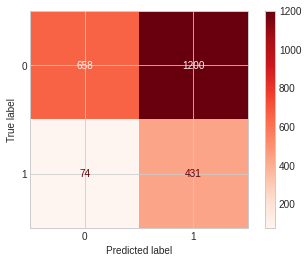

In [276]:
# Check Performance Model against Train-Set

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_8), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_8), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_nb_1, X_train_final_df, y_train, cmap='Reds'))

#### Stratified k-fold Cross Validation with shuffle split

In [277]:
# Cross Validation using `cross_val_score`
%%time


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

f1_score_train_cross_val = cross_val_score(model_nb_1, 
                                           X_train_final_df, 
                                           y_train, 
                                           cv=skf, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.35840708 0.38410596 0.41062802 0.43342037 0.41849148]
F1 Score - Mean - Cross Validation :  0.40101058179095056
F1 Score - Std - Cross Validation  :  0.0266431820903867
F1 Score - Range of Test-Set       :  0.3743673997005639 - 0.42765376388133725
CPU times: user 48.8 ms, sys: 0 ns, total: 48.8 ms
Wall time: 49.8 ms


Kita dapat melihat bahwa f1-score pada hasil prediksi data train (sebelum dilakukan cross validation) itu cukup konsisten terlihat dari hasil cross validation di atas menyatakan rata-rata score-nya yaitu `0.40` dan standar deviasi-nya yaitu `0.02` berarti mendekati 0. Yang dapat disimpulkan disini adalah berarti score model yang kita punya itu cukup konsisten namun belum bisa dikatakan baik dalam memprediksi label 1.

F1 Score - Test Set  :  0.40684410646387836 

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.37      0.52       465
           1       0.27      0.85      0.41       126

    accuracy                           0.47       591
   macro avg       0.58      0.61      0.47       591
weighted avg       0.77      0.47      0.50       591
 

Confusion Matrix      : 


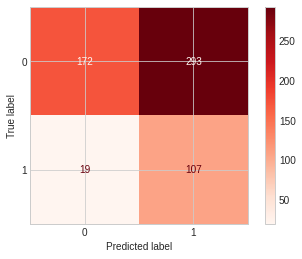

In [278]:
# Check Performance Model against Test-Set

print('F1 Score - Test Set  : ', f1_score(y_test, y_pred_test_8), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_8), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_nb_1, X_test_final_df, y_test, cmap='Reds'))

In [279]:
# Save Classification Report into a Dictionary

score_reports = {
    'train - precision' : precision_score(y_train, y_pred_train_8),
    'train - recall' : recall_score(y_train, y_pred_train_8),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_8),
    'train - f1_score' : f1_score(y_train, y_pred_train_8),
    'test - precision' : precision_score(y_test, y_pred_test_8),
    'test - recall' : recall_score(y_test, y_pred_test_8),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_8),
    'test - f1_score' : f1_score(y_test, y_pred_test_8),
}
all_reports['Baseline (Naive Bayes)'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Log_Reg),Baseline (SVM),Baseline (Decision Tree),Baseline (Random Forest),Baseline (AdaBoostClassifier),Baseline (Gradient Boosting),Baseline (KNN),Baseline (Naive Bayes)
train - precision,0.750000,0.734234,1.000000,1.000000,0.745583,0.844828,0.764706,0.264255
train - recall,0.302970,0.322772,0.998020,0.998020,0.417822,0.485149,0.463366,0.853465
train - accuracy,0.829454,0.830300,0.999577,0.999577,0.845112,0.870927,0.854846,0.460855
train - f1_score,0.431594,0.448418,0.999009,0.999009,0.535533,0.616352,0.577065,0.403558
test - precision,0.697674,0.717949,0.400000,0.662162,0.681818,0.698413,0.610169,0.267500
test - recall,0.238095,0.222222,0.380952,0.388889,0.357143,0.349206,0.285714,0.849206
test - accuracy_score,0.815567,0.815567,0.746193,0.827411,0.827411,0.829103,0.808799,0.472081
test - f1_score,0.355030,0.339394,0.390244,0.490000,0.468750,0.465608,0.389189,0.406844


Inference:
- Berdasarkan hasil evaluasi model `Naive Bayes` menggunakan `accuracy score` menunjukkan bahwa accuracy score train (0.46) dan accuracy score test  (0.47), artinya model ini dapat dikatakan `underfit` jika kita menangani kasus dengan `data yang balance`. Karena data yang kita punya tidak balance, maka tidak disarankan untuk melihat performansi model dari `accuracy score`.
- Berdasarkan classification report data train, hasilnya menunjukkan bahwa score f1-score yang dimiliki oleh label 1 adalah `0.40` sedangkan pada classification report data test menunjukkan scorenya adalah `0.41`. Artinya, bahwa model `Naive Bayes` ini masih `underfit` atau sederhananya model kita ini masih belum baik untuk memprediksi label 1.
- Hal ini dapat dibuktikan dengan `confusion matrix`. Misalnya pada data train. Dapat dilihat bahwa `False Negative` dan `False Positive` tinggi. 
  1. `False Negative` terjadi ketika model `memprediksikan` bahwa seseorang `tidak menunggak`, padahal aktualnya orang ini menunggak pembayaran kredit. Model ini sudah melakukan salah prediksi sebanyak 74 orang.
  2. `False Positive` terjadi ketika model `memprediksikan` bahwa seseorang `menunggak pembayaran kredit`, padahal aktualnya orang ini tidak menunggak. Model ini sudah melakukan salah prediksi sebanyak 1200 orang.

#### Result comparison between imbalanced and balanced dataset

In [280]:
# Check Train Results

print(classification_report(y_train, model_nb_1.predict(X_train_final_df)))
print(classification_report(y_train_balanced, model_nb_2.predict(X_train_balanced_final)))

              precision    recall  f1-score   support

           0       0.90      0.35      0.51      1858
           1       0.26      0.85      0.40       505

    accuracy                           0.46      2363
   macro avg       0.58      0.60      0.46      2363
weighted avg       0.76      0.46      0.49      2363

              precision    recall  f1-score   support

           0       0.74      0.24      0.37      1858
           1       0.55      0.91      0.68      1858

    accuracy                           0.58      3716
   macro avg       0.64      0.58      0.52      3716
weighted avg       0.64      0.58      0.52      3716



In [281]:
# Check Test Results

print(classification_report(y_test, model_nb_1.predict(X_test_final_df)))
print(classification_report(y_test, model_nb_2.predict(X_test_final_df)))

              precision    recall  f1-score   support

           0       0.90      0.37      0.52       465
           1       0.27      0.85      0.41       126

    accuracy                           0.47       591
   macro avg       0.58      0.61      0.47       591
weighted avg       0.77      0.47      0.50       591

              precision    recall  f1-score   support

           0       0.92      0.26      0.41       465
           1       0.25      0.91      0.39       126

    accuracy                           0.40       591
   macro avg       0.58      0.59      0.40       591
weighted avg       0.77      0.40      0.40       591



In [282]:
# Cross Validation using `cross_val_score`
%%time

f1_score_train_cross_val = cross_val_score(model_nb_2, 
                                           X_train_balanced_final, 
                                           y_train_balanced, 
                                           cv=skf, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.67738693 0.68862275 0.69215292 0.68287741 0.67755102]
F1 Score - Mean - Cross Validation :  0.683718206671848
F1 Score - Std - Cross Validation  :  0.005899577492936227
F1 Score - Range of Test-Set       :  0.6778186291789118 - 0.6896177841647843
CPU times: user 61 ms, sys: 974 µs, total: 61.9 ms
Wall time: 65.9 ms


Berdasarkan hasil f1-score pada label 1 dalam kondisi dataset masih *imbalanced*:
- Train set menunjukkan score `0.40` sedangkan Test set menunjukkan scorenya adalah `0.41`. Artinya, bahwa model `Naive Bayes` ini masih `underfit` atau sederhananya model kita ini masih belum baik untuk memprediksi label 1. 

Sedangkan ketika kita menyeimbangkan dataset, perolehan f1-score itu lebih tinggi daripada f1-score tanpa menyeimbangkan dataset, yaitu Train set menunjukkan score `0.68` sedangkan Test set menunjukkan scorenya adalah `0.39`. Kemudian dari hasil validasi evaluasi performa model (cross validation) menggunakan *balanced data* itu menunjukkan score train-set yang nilainya konsisten dan standar deviasi yang lebih kecil daripada tanpa menyeimbangkan dataset.

In [283]:
# Save Classification Report into a Dictionary

score_reports_bal = {
    'train - precision' : precision_score(y_train_balanced, model_nb_2.predict(X_train_balanced_final)),
    'train - recall' : recall_score(y_train_balanced, model_nb_2.predict(X_train_balanced_final)),
    'train - accuracy' : accuracy_score(y_train_balanced, model_nb_2.predict(X_train_balanced_final)),
    'train - f1_score' : f1_score(y_train_balanced, model_nb_2.predict(X_train_balanced_final)),
    'test - precision' : precision_score(y_test, model_nb_2.predict(X_test_final_df)),
    'test - recall' : recall_score(y_test, model_nb_2.predict(X_test_final_df)),
    'test - accuracy_score' : accuracy_score(y_test, model_nb_2.predict(X_test_final_df)),
    'test - f1_score' : f1_score(y_test, model_nb_2.predict(X_test_final_df)),
}
all_reports_balanced['Baseline (Naive Bayes)'] = score_reports_bal
pd.DataFrame(all_reports_balanced)

,Baseline (Log_Reg),Baseline (SVM),Baseline (Decision Tree),Baseline (Random Forest),Baseline (AdaBoostClassifier),Baseline (Gradient Boosting),Baseline (KNN),Baseline (Naive Bayes)
train - precision,0.655475,0.816788,1.000000,1.000000,0.813844,0.894284,0.823414,0.546714
train - recall,0.682992,0.544672,0.999462,0.999462,0.651776,0.783100,0.900969,0.913348
train - accuracy,0.662002,0.711249,0.999731,0.999731,0.751346,0.845264,0.853875,0.578041
train - f1_score,0.668951,0.653536,0.999731,0.999731,0.723849,0.835007,0.860447,0.683998
test - precision,0.373950,0.556452,0.340314,0.541284,0.481203,0.552632,0.350000,0.250545
test - recall,0.706349,0.547619,0.515873,0.468254,0.507937,0.500000,0.555556,0.912698
test - accuracy_score,0.685279,0.810491,0.683587,0.802030,0.778342,0.807107,0.685279,0.399323
test - f1_score,0.489011,0.552000,0.410095,0.502128,0.494208,0.525000,0.429448,0.393162


### LightGBM

In [284]:
# Predict Train-Set and Test-Set

y_pred_train_9 = model_lgbm_1.predict(X_train_final_df)
y_pred_test_9 = model_lgbm_1.predict(X_test_final_df)

In [285]:
# Model Evaluation using accuracy score
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_9))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_9))

accuracy score train :  0.9610664409648751
accuracy score test :  0.817258883248731


F1 Score - Train Set  :  0.9004329004329003 

Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      1858
           1       0.99      0.82      0.90       505

    accuracy                           0.96      2363
   macro avg       0.97      0.91      0.94      2363
weighted avg       0.96      0.96      0.96      2363
 

Confusion Matrix      : 


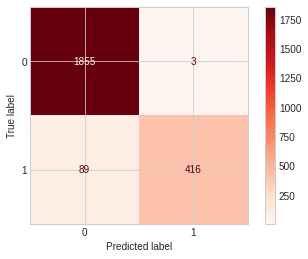

In [286]:
# Check Performance Model against Train-Set

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_9), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_9), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_lgbm_1, X_train_final_df, y_train, cmap='Reds'))

#### Stratified k-fold Cross Validation with shuffle split

In [287]:
# Cross Validation using `cross_val_score`
%%time


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

f1_score_train_cross_val = cross_val_score(model_lgbm_1, 
                                           X_train_final_df, 
                                           y_train, 
                                           cv=skf, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.53571429 0.53658537 0.49382716 0.39520958 0.54193548]
F1 Score - Mean - Cross Validation :  0.5006543753542124
F1 Score - Std - Cross Validation  :  0.055478966944866086
F1 Score - Range of Test-Set       :  0.44517540840934633 - 0.5561333422990785
CPU times: user 1.47 s, sys: 41.4 ms, total: 1.52 s
Wall time: 788 ms


Kita dapat melihat bahwa f1-score pada hasil prediksi data train (sebelum dilakukan cross validation) yaitu `0.90` itu tidak konsisten terlihat dari hasil cross validation di atas menyatakan rata-rata score-nya yaitu `0.50` dan standar deviasi-nya yaitu `0.06` berarti mendekati 0. Yang dapat disimpulkan disini adalah berarti score model yang kita punya itu belum bisa dikatakan baik dalam memprediksi label 1.

F1 Score - Test Set  :  0.44897959183673464 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.94      0.89       465
           1       0.63      0.35      0.45       126

    accuracy                           0.82       591
   macro avg       0.74      0.65      0.67       591
weighted avg       0.80      0.82      0.80       591
 

Confusion Matrix      : 


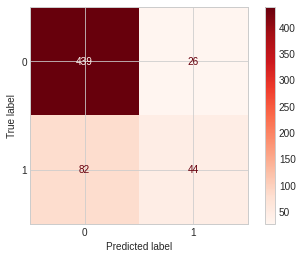

In [288]:
# Check Performance Model against Test-Set

print('F1 Score - Test Set  : ', f1_score(y_test, y_pred_test_9), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_9), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_lgbm_1, X_test_final_df, y_test, cmap='Reds'))

In [289]:
# Save Classification Report into a Dictionary

score_reports = {
    'train - precision' : precision_score(y_train, y_pred_train_9),
    'train - recall' : recall_score(y_train, y_pred_train_9),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_9),
    'train - f1_score' : f1_score(y_train, y_pred_train_9),
    'test - precision' : precision_score(y_test, y_pred_test_9),
    'test - recall' : recall_score(y_test, y_pred_test_9),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_9),
    'test - f1_score' : f1_score(y_test, y_pred_test_9),
}
all_reports['Baseline (LightGBM)'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Log_Reg),Baseline (SVM),Baseline (Decision Tree),Baseline (Random Forest),Baseline (AdaBoostClassifier),Baseline (Gradient Boosting),Baseline (KNN),Baseline (Naive Bayes),Baseline (LightGBM)
train - precision,0.750000,0.734234,1.000000,1.000000,0.745583,0.844828,0.764706,0.264255,0.992840
train - recall,0.302970,0.322772,0.998020,0.998020,0.417822,0.485149,0.463366,0.853465,0.823762
train - accuracy,0.829454,0.830300,0.999577,0.999577,0.845112,0.870927,0.854846,0.460855,0.961066
train - f1_score,0.431594,0.448418,0.999009,0.999009,0.535533,0.616352,0.577065,0.403558,0.900433
test - precision,0.697674,0.717949,0.400000,0.662162,0.681818,0.698413,0.610169,0.267500,0.628571
test - recall,0.238095,0.222222,0.380952,0.388889,0.357143,0.349206,0.285714,0.849206,0.349206
test - accuracy_score,0.815567,0.815567,0.746193,0.827411,0.827411,0.829103,0.808799,0.472081,0.817259
test - f1_score,0.355030,0.339394,0.390244,0.490000,0.468750,0.465608,0.389189,0.406844,0.448980


Inference:
- Berdasarkan hasil evaluasi model `LightGBM` menggunakan `accuracy score` menunjukkan bahwa accuracy score train (0.96) dan accuracy score test  (0.82), artinya model ini dapat dikatakan `overfit` jika kita menangani kasus dengan `data yang balance`. Karena data yang kita punya tidak balance, maka tidak disarankan untuk melihat performansi model dari `accuracy score`.
- Berdasarkan classification report data train, hasilnya menunjukkan bahwa score f1-score yang dimiliki oleh label 1 adalah `0.90` sedangkan pada classification report data test menunjukkan scorenya adalah `0.45`. Artinya, bahwa model `LightGBM` ini `overfit` atau sederhananya model kita ini hanya bagus ketika di training saja, namun masih belum baik untuk memprediksi label 1 pada data test.
- Hal ini dapat dibuktikan dengan `confusion matrix`. Misalnya pada data test. Dapat dilihat bahwa `False Negative` dan `False Positive` tinggi. 
  1. `False Negative` terjadi ketika model `memprediksikan` bahwa seseorang `tidak menunggak`, padahal aktualnya orang ini menunggak pembayaran kredit. Model ini sudah melakukan salah prediksi sebanyak 82 orang.
  2. `False Positive` terjadi ketika model `memprediksikan` bahwa seseorang `menunggak pembayaran kredit`, padahal aktualnya orang ini tidak menunggak. Model ini sudah melakukan salah prediksi sebanyak 26 orang.

#### Result comparison between imbalanced and balanced dataset

In [290]:
# Check Train Results

print(classification_report(y_train, model_lgbm_1.predict(X_train_final_df)))
print(classification_report(y_train_balanced, model_lgbm_2.predict(X_train_balanced_final)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1858
           1       0.99      0.82      0.90       505

    accuracy                           0.96      2363
   macro avg       0.97      0.91      0.94      2363
weighted avg       0.96      0.96      0.96      2363

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1858
           1       0.99      0.95      0.97      1858

    accuracy                           0.97      3716
   macro avg       0.97      0.97      0.97      3716
weighted avg       0.97      0.97      0.97      3716



In [291]:
# Check Test Results

print(classification_report(y_test, model_lgbm_1.predict(X_test_final_df)))
print(classification_report(y_test, model_lgbm_2.predict(X_test_final_df)))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       465
           1       0.63      0.35      0.45       126

    accuracy                           0.82       591
   macro avg       0.74      0.65      0.67       591
weighted avg       0.80      0.82      0.80       591

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       465
           1       0.51      0.43      0.47       126

    accuracy                           0.79       591
   macro avg       0.68      0.66      0.67       591
weighted avg       0.78      0.79      0.78       591



In [292]:
# Cross Validation using `cross_val_score`
%%time

f1_score_train_cross_val = cross_val_score(model_lgbm_2, 
                                           X_train_balanced_final, 
                                           y_train_balanced, 
                                           cv=skf, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.85294118 0.85674157 0.86575342 0.87179487 0.87394958]
F1 Score - Mean - Cross Validation :  0.8642361251577271
F1 Score - Std - Cross Validation  :  0.008216230614938338
F1 Score - Range of Test-Set       :  0.8560198945427887 - 0.8724523557726654
CPU times: user 2 s, sys: 63.6 ms, total: 2.07 s
Wall time: 1.07 s


Berdasarkan hasil f1-score pada label 1 dalam kondisi dataset masih *imbalanced*:
- Train set menunjukkan score `0.90` sedangkan Test set menunjukkan scorenya adalah `0.45`. Artinya, model ini dapat dikatakan `overfit` atau sederhananya model kita ini hanya bagus ketika di training saja, namun masih belum baik untuk memprediksi label 1 pada data test.

Sedangkan ketika kita menyeimbangkan dataset, perolehan f1-score itu lebih tinggi daripada f1-score tanpa menyeimbangkan dataset, yaitu Train set menunjukkan score `0.97` sedangkan Test set menunjukkan scorenya adalah `0.47`. Namun dari hasil validasi evaluasi performa model (cross validation) menggunakan *balanced data* itu menunjukkan score train-set yang nilainya tidak konsisten dan standar deviasi yang lebih rendah daripada tanpa menyeimbangkan dataset.

In [293]:
# Save Classification Report into a Dictionary

score_reports_bal = {
    'train - precision' : precision_score(y_train_balanced, model_lgbm_2.predict(X_train_balanced_final)),
    'train - recall' : recall_score(y_train_balanced, model_lgbm_2.predict(X_train_balanced_final)),
    'train - accuracy' : accuracy_score(y_train_balanced, model_lgbm_2.predict(X_train_balanced_final)),
    'train - f1_score' : f1_score(y_train_balanced, model_lgbm_2.predict(X_train_balanced_final)),
    'test - precision' : precision_score(y_test, model_lgbm_2.predict(X_test_final_df)),
    'test - recall' : recall_score(y_test, model_lgbm_2.predict(X_test_final_df)),
    'test - accuracy_score' : accuracy_score(y_test, model_lgbm_2.predict(X_test_final_df)),
    'test - f1_score' : f1_score(y_test, model_lgbm_2.predict(X_test_final_df)),
}
all_reports_balanced['Baseline (LightGBM)'] = score_reports_bal
pd.DataFrame(all_reports_balanced)

,Baseline (Log_Reg),Baseline (SVM),Baseline (Decision Tree),Baseline (Random Forest),Baseline (AdaBoostClassifier),Baseline (Gradient Boosting),Baseline (KNN),Baseline (Naive Bayes),Baseline (LightGBM)
train - precision,0.655475,0.816788,1.000000,1.000000,0.813844,0.894284,0.823414,0.546714,0.985987
train - recall,0.682992,0.544672,0.999462,0.999462,0.651776,0.783100,0.900969,0.913348,0.946717
train - accuracy,0.662002,0.711249,0.999731,0.999731,0.751346,0.845264,0.853875,0.578041,0.966631
train - f1_score,0.668951,0.653536,0.999731,0.999731,0.723849,0.835007,0.860447,0.683998,0.965953
test - precision,0.373950,0.556452,0.340314,0.541284,0.481203,0.552632,0.350000,0.250545,0.509434
test - recall,0.706349,0.547619,0.515873,0.468254,0.507937,0.500000,0.555556,0.912698,0.428571
test - accuracy_score,0.685279,0.810491,0.683587,0.802030,0.778342,0.807107,0.685279,0.399323,0.790186
test - f1_score,0.489011,0.552000,0.410095,0.502128,0.494208,0.525000,0.429448,0.393162,0.465517


### XGBoost

In [294]:
# Predict Train-Set and Test-Set

y_pred_train_10 = model_xgb_1.predict(X_train_final_df)
y_pred_test_10 = model_xgb_1.predict(X_test_final_df)

In [295]:
# Model Evaluation using accuracy score
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_10))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_10))

accuracy score train :  0.9919593736775285
accuracy score test :  0.8155668358714044


F1 Score - Train Set  :  0.9808660624370594 

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1858
           1       1.00      0.96      0.98       505

    accuracy                           0.99      2363
   macro avg       0.99      0.98      0.99      2363
weighted avg       0.99      0.99      0.99      2363
 

Confusion Matrix      : 


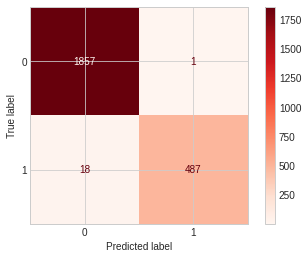

In [296]:
# Check Performance Model against Train-Set

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_10), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_10), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_xgb_1, X_train_final_df, y_train, cmap='Reds'))

#### Stratified k-fold Cross Validation with shuffle split

In [297]:
# Cross Validation using `cross_val_score`
%%time


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

f1_score_train_cross_val = cross_val_score(model_xgb_1, 
                                           X_train_final_df, 
                                           y_train, 
                                           cv=skf, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.5        0.51219512 0.47852761 0.43113772 0.48407643]
F1 Score - Mean - Cross Validation :  0.48118737739701994
F1 Score - Std - Cross Validation  :  0.02769759470125053
F1 Score - Range of Test-Set       :  0.4534897826957694 - 0.5088849720982704
CPU times: user 4.87 s, sys: 47.3 ms, total: 4.92 s
Wall time: 3.67 s


Kita dapat melihat bahwa f1-score pada hasil prediksi data train (sebelum dilakukan cross validation) yaitu `0.98` itu tidak konsisten terlihat dari hasil cross validation di atas menyatakan rata-rata score-nya yaitu `0.48` dan standar deviasi-nya yaitu `0.03` berarti mendekati 0. Yang dapat disimpulkan disini adalah berarti score model yang kita punya itu belum bisa dikatakan baik dalam memprediksi label 1.

F1 Score - Test Set  :  0.45226130653266333 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.94      0.89       465
           1       0.62      0.36      0.45       126

    accuracy                           0.82       591
   macro avg       0.73      0.65      0.67       591
weighted avg       0.80      0.82      0.80       591
 

Confusion Matrix      : 


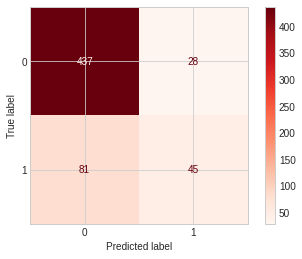

In [298]:
# Check Performance Model against Test-Set

print('F1 Score - Test Set  : ', f1_score(y_test, y_pred_test_10), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_10), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_xgb_1, X_test_final_df, y_test, cmap='Reds'))

In [299]:
# Save Classification Report into a Dictionary

score_reports = {
    'train - precision' : precision_score(y_train, y_pred_train_10),
    'train - recall' : recall_score(y_train, y_pred_train_10),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_10),
    'train - f1_score' : f1_score(y_train, y_pred_train_10),
    'test - precision' : precision_score(y_test, y_pred_test_10),
    'test - recall' : recall_score(y_test, y_pred_test_10),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_10),
    'test - f1_score' : f1_score(y_test, y_pred_test_10),
}
all_reports['Baseline (XGBoost)'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Log_Reg),Baseline (SVM),Baseline (Decision Tree),Baseline (Random Forest),Baseline (AdaBoostClassifier),Baseline (Gradient Boosting),Baseline (KNN),Baseline (Naive Bayes),Baseline (LightGBM),Baseline (XGBoost)
train - precision,0.750000,0.734234,1.000000,1.000000,0.745583,0.844828,0.764706,0.264255,0.992840,0.997951
train - recall,0.302970,0.322772,0.998020,0.998020,0.417822,0.485149,0.463366,0.853465,0.823762,0.964356
train - accuracy,0.829454,0.830300,0.999577,0.999577,0.845112,0.870927,0.854846,0.460855,0.961066,0.991959
train - f1_score,0.431594,0.448418,0.999009,0.999009,0.535533,0.616352,0.577065,0.403558,0.900433,0.980866
test - precision,0.697674,0.717949,0.400000,0.662162,0.681818,0.698413,0.610169,0.267500,0.628571,0.616438
test - recall,0.238095,0.222222,0.380952,0.388889,0.357143,0.349206,0.285714,0.849206,0.349206,0.357143
test - accuracy_score,0.815567,0.815567,0.746193,0.827411,0.827411,0.829103,0.808799,0.472081,0.817259,0.815567
test - f1_score,0.355030,0.339394,0.390244,0.490000,0.468750,0.465608,0.389189,0.406844,0.448980,0.452261


Inference:
- Berdasarkan hasil evaluasi model `XGBoost` menggunakan `accuracy score` menunjukkan bahwa accuracy score train (0.99) dan accuracy score test  (0.82), artinya model ini dapat dikatakan `overfit` jika kita menangani kasus dengan `data yang balance`. Karena data yang kita punya tidak balance, maka tidak disarankan untuk melihat performansi model dari `accuracy score`.
- Berdasarkan classification report data train, hasilnya menunjukkan bahwa score f1-score yang dimiliki oleh label 1 adalah `0.98` sedangkan pada classification report data test menunjukkan scorenya adalah `0.45`. Artinya, bahwa model `XGBoost` ini `overfit` atau sederhananya model kita ini hanya bagus ketika di training saja, namun masih belum baik untuk memprediksi label 1 pada data test.
- Hal ini dapat dibuktikan dengan `confusion matrix`. Misalnya pada data test. Dapat dilihat bahwa `False Negative` dan `False Positive` tinggi. 
  1. `False Negative` terjadi ketika model `memprediksikan` bahwa seseorang `tidak menunggak`, padahal aktualnya orang ini menunggak pembayaran kredit. Model ini sudah melakukan salah prediksi sebanyak 81 orang.
  2. `False Positive` terjadi ketika model `memprediksikan` bahwa seseorang `menunggak pembayaran kredit`, padahal aktualnya orang ini tidak menunggak. Model ini sudah melakukan salah prediksi sebanyak 28 orang.

#### Result comparison between imbalanced and balanced dataset

In [300]:
# Check Train Results

print(classification_report(y_train, model_xgb_1.predict(X_train_final_df)))
print(classification_report(y_train_balanced, model_xgb_2.predict(X_train_balanced_final)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1858
           1       1.00      0.96      0.98       505

    accuracy                           0.99      2363
   macro avg       0.99      0.98      0.99      2363
weighted avg       0.99      0.99      0.99      2363

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1858
           1       1.00      0.99      0.99      1858

    accuracy                           0.99      3716
   macro avg       0.99      0.99      0.99      3716
weighted avg       0.99      0.99      0.99      3716



Confusion Matrix      : 


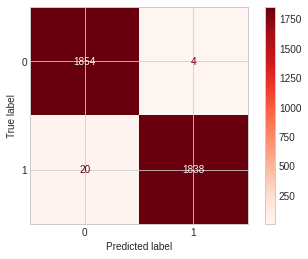

In [301]:
# Confusion Matrix against Train-Set (balanced)
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_xgb_2, X_train_balanced_final, y_train_balanced, cmap='Reds'))

In [302]:
# Check Test Results

print(classification_report(y_test, model_xgb_1.predict(X_test_final_df)))
print(classification_report(y_test, model_xgb_2.predict(X_test_final_df)))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       465
           1       0.62      0.36      0.45       126

    accuracy                           0.82       591
   macro avg       0.73      0.65      0.67       591
weighted avg       0.80      0.82      0.80       591

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       465
           1       0.49      0.37      0.43       126

    accuracy                           0.79       591
   macro avg       0.67      0.63      0.65       591
weighted avg       0.77      0.79      0.77       591



Confusion Matrix      : 


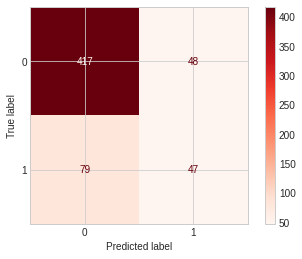

In [303]:
# Confusion Matrix against Test-Set (balanced)
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_xgb_2, X_test_final_df, y_test, cmap='Reds'))

In [304]:
# Cross Validation using `cross_val_score`
%%time

f1_score_train_cross_val = cross_val_score(model_xgb_2, 
                                           X_train_balanced_final, 
                                           y_train_balanced, 
                                           cv=skf, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.84823848 0.85871056 0.87771739 0.86909582 0.87569061]
F1 Score - Mean - Cross Validation :  0.8658905720604964
F1 Score - Std - Cross Validation  :  0.011039354625793557
F1 Score - Range of Test-Set       :  0.8548512174347028 - 0.8769299266862899
CPU times: user 5.03 s, sys: 58.4 ms, total: 5.08 s
Wall time: 2.67 s


Berdasarkan hasil f1-score pada label 1 dalam kondisi dataset masih *imbalanced*:
- Train set menunjukkan score `0.98` sedangkan Test set menunjukkan scorenya adalah `0.45`. Artinya, model ini dapat dikatakan `overfit` atau sederhananya model kita ini hanya bagus ketika di training saja, namun masih belum baik untuk memprediksi label 1 pada data test.

Sedangkan ketika kita menyeimbangkan dataset, perolehan f1-score itu lebih tinggi daripada f1-score tanpa menyeimbangkan dataset, yaitu Train set menunjukkan score `0.99` sedangkan Test set menunjukkan scorenya adalah `0.43`. Namun dari hasil validasi evaluasi performa model (cross validation) menggunakan *balanced data* itu menunjukkan score train-set yang nilainya tidak konsisten dan standar deviasi yang lebih rendah daripada tanpa menyeimbangkan dataset.

In [305]:
# Save Classification Report into a Dictionary

score_reports_bal = {
    'train - precision' : precision_score(y_train_balanced, model_xgb_2.predict(X_train_balanced_final)),
    'train - recall' : recall_score(y_train_balanced, model_xgb_2.predict(X_train_balanced_final)),
    'train - accuracy' : accuracy_score(y_train_balanced, model_xgb_2.predict(X_train_balanced_final)),
    'train - f1_score' : f1_score(y_train_balanced, model_xgb_2.predict(X_train_balanced_final)),
    'test - precision' : precision_score(y_test, model_xgb_2.predict(X_test_final_df)),
    'test - recall' : recall_score(y_test, model_xgb_2.predict(X_test_final_df)),
    'test - accuracy_score' : accuracy_score(y_test, model_xgb_2.predict(X_test_final_df)),
    'test - f1_score' : f1_score(y_test, model_xgb_2.predict(X_test_final_df)),
}
all_reports_balanced['Baseline (XGB)'] = score_reports_bal
pd.DataFrame(all_reports_balanced)

,Baseline (Log_Reg),Baseline (SVM),Baseline (Decision Tree),Baseline (Random Forest),Baseline (AdaBoostClassifier),Baseline (Gradient Boosting),Baseline (KNN),Baseline (Naive Bayes),Baseline (LightGBM),Baseline (XGB)
train - precision,0.655475,0.816788,1.000000,1.000000,0.813844,0.894284,0.823414,0.546714,0.985987,0.997828
train - recall,0.682992,0.544672,0.999462,0.999462,0.651776,0.783100,0.900969,0.913348,0.946717,0.989236
train - accuracy,0.662002,0.711249,0.999731,0.999731,0.751346,0.845264,0.853875,0.578041,0.966631,0.993541
train - f1_score,0.668951,0.653536,0.999731,0.999731,0.723849,0.835007,0.860447,0.683998,0.965953,0.993514
test - precision,0.373950,0.556452,0.340314,0.541284,0.481203,0.552632,0.350000,0.250545,0.509434,0.494737
test - recall,0.706349,0.547619,0.515873,0.468254,0.507937,0.500000,0.555556,0.912698,0.428571,0.373016
test - accuracy_score,0.685279,0.810491,0.683587,0.802030,0.778342,0.807107,0.685279,0.399323,0.790186,0.785110
test - f1_score,0.489011,0.552000,0.410095,0.502128,0.494208,0.525000,0.429448,0.393162,0.465517,0.425339


### Cross Validation Score (All model)

#### Imbalanced data

In [306]:
# Cross-validate base model

# prepare models and put it into list
models = []
models.append(('LR', model_log_reg_1))
models.append(('SVM', model_svm_1))
models.append(('DT', model_dtc_1))
models.append(('RF', model_rf_1))
models.append(('ADA', model_abc_1))
models.append(('GB', model_gb_1))
models.append(('KNN', model_knn_1))
models.append(('NB', model_nb_1))
models.append(('LGBM', model_lgbm_1))
models.append(('XGB', model_xgb_1))

# Create empty list to stores result
names = []
results = []
mean_score = []
stdev_score = []

# Cross-validate each model
for name, model in models:
    model.fit(X_train_final_df, y_train)
    scores = cross_val_score(model, X_train_final_df, y_train, scoring='f1', cv=skf)

    names.append(name)
    results.append(scores)
    mean_score.append(round(np.mean(scores),4))
    stdev_score.append(round(np.std(scores),4))

cv_result = pd.DataFrame({'models':names, 'mean_score':mean_score, 'stdev_score':stdev_score})

In [307]:
# Showing the result mean descending order
cv_result.sort_values(by='mean_score', ascending=False)

,models,mean_score,stdev_score
5,GB,0.5018,0.0349
8,LGBM,0.5007,0.0555
3,RF,0.4953,0.0406
4,ADA,0.4853,0.0401
9,XGB,0.4812,0.0277
6,KNN,0.4802,0.0443
1,SVM,0.4304,0.0306
0,LR,0.4062,0.0273
7,NB,0.4010,0.0266
2,DT,0.4009,0.0139


In [308]:
# Showing the result stdev descending order
cv_result.sort_values(by='stdev_score')

,models,mean_score,stdev_score
2,DT,0.4009,0.0139
7,NB,0.4010,0.0266
0,LR,0.4062,0.0273
9,XGB,0.4812,0.0277
1,SVM,0.4304,0.0306
5,GB,0.5018,0.0349
4,ADA,0.4853,0.0401
3,RF,0.4953,0.0406
6,KNN,0.4802,0.0443
8,LGBM,0.5007,0.0555


In [309]:
# All Reports of imbalanced data
pd.DataFrame(all_reports)

,Baseline (Log_Reg),Baseline (SVM),Baseline (Decision Tree),Baseline (Random Forest),Baseline (AdaBoostClassifier),Baseline (Gradient Boosting),Baseline (KNN),Baseline (Naive Bayes),Baseline (LightGBM),Baseline (XGBoost)
train - precision,0.750000,0.734234,1.000000,1.000000,0.745583,0.844828,0.764706,0.264255,0.992840,0.997951
train - recall,0.302970,0.322772,0.998020,0.998020,0.417822,0.485149,0.463366,0.853465,0.823762,0.964356
train - accuracy,0.829454,0.830300,0.999577,0.999577,0.845112,0.870927,0.854846,0.460855,0.961066,0.991959
train - f1_score,0.431594,0.448418,0.999009,0.999009,0.535533,0.616352,0.577065,0.403558,0.900433,0.980866
test - precision,0.697674,0.717949,0.400000,0.662162,0.681818,0.698413,0.610169,0.267500,0.628571,0.616438
test - recall,0.238095,0.222222,0.380952,0.388889,0.357143,0.349206,0.285714,0.849206,0.349206,0.357143
test - accuracy_score,0.815567,0.815567,0.746193,0.827411,0.827411,0.829103,0.808799,0.472081,0.817259,0.815567
test - f1_score,0.355030,0.339394,0.390244,0.490000,0.468750,0.465608,0.389189,0.406844,0.448980,0.452261


Berdasarkan hasil evaluasi dari model training dengan menggunakan parameter default (baseline model) pada data yang *imbalanced* menunjukkan bahwa mayoritas nilai f1-score tidak menunjukkan nilai yang konsisten setelah dilakukan *cross validation* . Meskipun ada beberapa yang cukup konsisten, namun nilainya masih rendah (underfit) untuk dijadikan sebagai model terbaik. Sehingga, Saya tidak memilih algoritma terbaik dari data yang *imbalanced*. Saya lakukan hal yang sama dengan data yang *balanced*. Apakah lebih baik? Coba kita lihat proses selanjutnya.

#### Balanced data

In [310]:
# Cross-validate base model

# prepare models and put it into list
models = []
models.append(('LR', model_log_reg_2))
models.append(('SVM', model_svm_2))
models.append(('DT', model_dtc_2))
models.append(('RF', model_rf_2))
models.append(('ADA', model_abc_2))
models.append(('GB', model_gb_2))
models.append(('KNN', model_knn_2))
models.append(('NB', model_nb_2))
models.append(('LGBM', model_lgbm_2))
models.append(('XGB', model_xgb_2))

# Create empty list to stores result
names = []
results = []
mean_score = []
stdev_score = []

# Cross-validate each model
for name, model in models:
    model.fit(X_train_balanced_final, y_train_balanced)
    scores = cross_val_score(model, X_train_balanced_final, y_train_balanced, scoring='f1', cv=skf)

    names.append(name)
    results.append(scores)
    mean_score.append(round(np.mean(scores),4))
    stdev_score.append(round(np.std(scores),4))

cv_result = pd.DataFrame({'models':names, 'mean_score':mean_score, 'stdev_score':stdev_score})

In [311]:
# Showing the result mean descending order
cv_result.sort_values(by='mean_score', ascending=False)

,models,mean_score,stdev_score
9,XGB,0.8659,0.0110
8,LGBM,0.8642,0.0082
3,RF,0.8495,0.0167
5,GB,0.7861,0.0239
6,KNN,0.7852,0.0083
2,DT,0.7640,0.0062
4,ADA,0.7033,0.0187
7,NB,0.6837,0.0059
0,LR,0.6649,0.0242
1,SVM,0.6362,0.0223


In [312]:
# Showing the result stdev descending order
cv_result.sort_values(by='stdev_score')

,models,mean_score,stdev_score
7,NB,0.6837,0.0059
2,DT,0.7640,0.0062
8,LGBM,0.8642,0.0082
6,KNN,0.7852,0.0083
9,XGB,0.8659,0.0110
3,RF,0.8495,0.0167
4,ADA,0.7033,0.0187
1,SVM,0.6362,0.0223
5,GB,0.7861,0.0239
0,LR,0.6649,0.0242


In [313]:
# All Reports of Balanced data
pd.DataFrame(all_reports_balanced)

,Baseline (Log_Reg),Baseline (SVM),Baseline (Decision Tree),Baseline (Random Forest),Baseline (AdaBoostClassifier),Baseline (Gradient Boosting),Baseline (KNN),Baseline (Naive Bayes),Baseline (LightGBM),Baseline (XGB)
train - precision,0.655475,0.816788,1.000000,1.000000,0.813844,0.894284,0.823414,0.546714,0.985987,0.997828
train - recall,0.682992,0.544672,0.999462,0.999462,0.651776,0.783100,0.900969,0.913348,0.946717,0.989236
train - accuracy,0.662002,0.711249,0.999731,0.999731,0.751346,0.845264,0.853875,0.578041,0.966631,0.993541
train - f1_score,0.668951,0.653536,0.999731,0.999731,0.723849,0.835007,0.860447,0.683998,0.965953,0.993514
test - precision,0.373950,0.556452,0.340314,0.541284,0.481203,0.552632,0.350000,0.250545,0.509434,0.494737
test - recall,0.706349,0.547619,0.515873,0.468254,0.507937,0.500000,0.555556,0.912698,0.428571,0.373016
test - accuracy_score,0.685279,0.810491,0.683587,0.802030,0.778342,0.807107,0.685279,0.399323,0.790186,0.785110
test - f1_score,0.489011,0.552000,0.410095,0.502128,0.494208,0.525000,0.429448,0.393162,0.465517,0.425339


Berdasarkan hasil evaluasi dari model training dengan menggunakan parameter default (baseline model) pada data yang *balanced* menunjukkan bahwa mayoritas nilai f1-score menunjukkan nilai yang konsisten setelah dilakukan *cross validation*. Sehingga, Saya memilih algoritma terbaik dari data yang *balanced* dengan mempertimbangkan `mean` dan `std` dari setiap modelnya. Dari hasil *cross validation*, algoritma yang terbaik ditunjukkan oleh **`XGBoost`** dengan `mean score tertinggi` yaitu `0.87` dan `standar deviasi score yang rendah` yaitu `0.01`.

Selanjutnya, Saya akan melakukan `Hyperparameter Tuning` pada model **`XGBoost`**.

## Hyperparameter Tuning

### Random Search

In [314]:
# Save Classification Report into a Dictionary
all_reports_xgb_tuning = {}
score_reports_xgb_tuning = {
    'train - precision' : precision_score(y_train_balanced, model_xgb_2.predict(X_train_balanced_final)),
    'train - recall' : recall_score(y_train_balanced, model_xgb_2.predict(X_train_balanced_final)),
    'train - accuracy' : accuracy_score(y_train_balanced, model_xgb_2.predict(X_train_balanced_final)),
    'train - f1_score' : f1_score(y_train_balanced, model_xgb_2.predict(X_train_balanced_final)),
    'test - precision' : precision_score(y_test, model_xgb_2.predict(X_test_final_df)),
    'test - recall' : recall_score(y_test, model_xgb_2.predict(X_test_final_df)),
    'test - accuracy_score' : accuracy_score(y_test, model_xgb_2.predict(X_test_final_df)),
    'test - f1_score' : f1_score(y_test, model_xgb_2.predict(X_test_final_df)),
}
all_reports_xgb_tuning['Baseline (XGB)'] = score_reports_xgb_tuning
pd.DataFrame(all_reports_xgb_tuning)

,Baseline (XGB)
test - accuracy_score,0.785110
test - f1_score,0.425339
test - precision,0.494737
test - recall,0.373016
train - accuracy,0.993541
train - f1_score,0.993514
train - precision,0.997828
train - recall,0.989236


In [315]:
# declare parameters for hyperparameter tuning

n_estimators = [int(x) for x in np.linspace(start=50, stop=2000, num = 10)]
max_depth = [int(x) for x in np.linspace(start=10, stop=1000, num = 10)]
min_child_weight = [2,3,4,5]

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_child_weight': min_child_weight}
random_grid

{'n_estimators': [50, 266, 483, 700, 916, 1133, 1350, 1566, 1783, 2000],
 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
 'min_child_weight': [2, 3, 4, 5]}

In [316]:
# Train with Random Search
%%time

model_xgb_randomcv = RandomizedSearchCV(estimator= model_xgb_2, 
                                       param_distributions=random_grid,
                                       n_iter=50,
                                       cv=5, 
                                       random_state=46, 
                                       n_jobs=-1, 
                                       scoring='f1')
model_xgb_randomcv.fit(X_train_balanced_final, y_train_balanced)

CPU times: user 14.1 s, sys: 1.16 s, total: 15.3 s
Wall time: 19min 16s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'min_child_weight': [2, 3, 4, 5],
                                        'n_estimators': [50, 266, 483, 700, 916,
                                                         1133, 1350, 1566, 1783,
                                                         2000]},
                   random_state=46, scoring='f1')

In [317]:
# Get Best Accuracy on Cross Validation
xgb_best_accuracy = model_xgb_randomcv.best_score_
print('Accuracy on Cross Validation set :',xgb_best_accuracy)

Accuracy on Cross Validation set : 0.8337216422934904


In [318]:
# Get Best Hyperparameters

xgb_best_hyperparameter = model_xgb_randomcv.best_params_
print('Best Hyperparameter :', xgb_best_hyperparameter)

Best Hyperparameter : {'n_estimators': 266, 'min_child_weight': 3, 'max_depth': 450}


In [319]:
# Get Best Estimator

xgb_best_estimator = model_xgb_randomcv.best_estimator_
print('Best Estimator :', xgb_best_estimator)

Best Estimator : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=450, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=266, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [320]:
# Cross Validation using `cross_val_score`
%%time

f1_score_train_cross_val = cross_val_score(xgb_best_estimator, 
                                           X_train_balanced_final, 
                                           y_train_balanced, 
                                           cv=skf, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.84420772 0.85675307 0.86827957 0.85486019 0.875513  ]
F1 Score - Mean - Cross Validation :  0.8599227089639296
F1 Score - Std - Cross Validation  :  0.010913575970235099
F1 Score - Range of Test-Set       :  0.8490091329936945 - 0.8708362849341648
CPU times: user 20.8 s, sys: 188 ms, total: 21 s
Wall time: 12.5 s


F1 Score - Test Set   :  0.4576271186440678 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.88      0.86       465
           1       0.49      0.43      0.46       126

    accuracy                           0.78       591
   macro avg       0.67      0.65      0.66       591
weighted avg       0.77      0.78      0.78       591
 

Confusion Matrix      : 


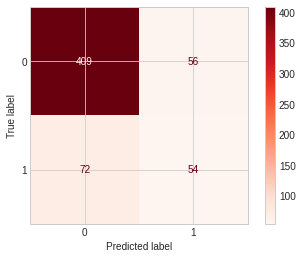

In [321]:
# Check Performance Model against Test-Set

y_pred_test = xgb_best_estimator.predict(X_test_final_df)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(xgb_best_estimator, X_test_final_df, y_test, cmap='Reds'))

In [322]:
# Save Classification Report into a Dictionary

score_reports_xgb_tuning = {
    'train - precision' : precision_score(y_train_balanced, xgb_best_estimator.predict(X_train_balanced_final)),
    'train - recall' : recall_score(y_train_balanced, xgb_best_estimator.predict(X_train_balanced_final)),
    'train - accuracy' : accuracy_score(y_train_balanced, xgb_best_estimator.predict(X_train_balanced_final)),
    'train - f1_score' : f1_score(y_train_balanced, xgb_best_estimator.predict(X_train_balanced_final)),
    'test - precision' : precision_score(y_test, y_pred_test),
    'test - recall' : recall_score(y_test, y_pred_test),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test),
    'test - f1_score' : f1_score(y_test, y_pred_test),
}
all_reports_xgb_tuning['Baseline (Random Search)'] = score_reports_xgb_tuning
pd.DataFrame(all_reports_xgb_tuning)

,Baseline (XGB),Baseline (Random Search)
train - precision,0.997828,0.999461
train - recall,0.989236,0.998924
train - accuracy,0.993541,0.999193
train - f1_score,0.993514,0.999192
test - precision,0.494737,0.490909
test - recall,0.373016,0.428571
test - accuracy_score,0.785110,0.783418
test - f1_score,0.425339,0.457627


### Grid Search

In [323]:
# Reuse best hyperparameters from Random Search for efficiency
param_grid = {
    'n_estimators': [model_xgb_randomcv.best_params_['n_estimators'] - 50, 
                     model_xgb_randomcv.best_params_['n_estimators'] - 25, 
                     model_xgb_randomcv.best_params_['n_estimators'], 
                     model_xgb_randomcv.best_params_['n_estimators'] + 25, 
                     model_xgb_randomcv.best_params_['n_estimators'] + 50],
    'max_depth': [model_xgb_randomcv.best_params_['max_depth']],
    'min_child_weight': [model_xgb_randomcv.best_params_['min_child_weight'], 
                         model_xgb_randomcv.best_params_['min_child_weight']+2, 
                         model_xgb_randomcv.best_params_['min_child_weight'] + 4]}

param_grid

{'n_estimators': [216, 241, 266, 291, 316],
 'max_depth': [450],
 'min_child_weight': [3, 5, 7]}

In [324]:
# Display Best Hyperparamters from Random Search

model_xgb_randomcv.best_params_

{'n_estimators': 266, 'min_child_weight': 3, 'max_depth': 450}

In [325]:
# Train with Grid Search
%%time

xgb_gridcv = GridSearchCV(estimator=model_xgb_2,
                          param_grid=param_grid,
                          cv=5,
                          n_jobs=-1,
                          verbose=2, 
                          scoring='f1')

xgb_gridcv.fit(X_train_balanced_final, y_train_balanced)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
CPU times: user 11 s, sys: 266 ms, total: 11.3 s
Wall time: 2min 46s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [450], 'min_child_weight': [3, 5, 7],
                         'n_estimators': [216, 241, 266, 291, 316]},
             scoring='f1', verbose=2)

In [326]:
# Get Best Hyperparameters

xgb_gridcv.best_params_

{'max_depth': 450, 'min_child_weight': 3, 'n_estimators': 241}

In [327]:
# Get Best Estimator

xgb_gridcv_best = xgb_gridcv.best_estimator_

F1 Score - Train Set  :  0.999192462987887 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1858
           1       1.00      1.00      1.00      1858

    accuracy                           1.00      3716
   macro avg       1.00      1.00      1.00      3716
weighted avg       1.00      1.00      1.00      3716
 

Confusion Matrix      : 


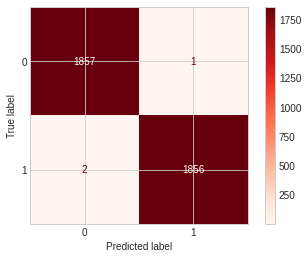

In [328]:
# Check Performance Model against Train-Set

y_pred_train = xgb_gridcv_best.predict(X_train_balanced_final)

print('F1 Score - Train Set  : ', f1_score(y_train_balanced, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train_balanced, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(xgb_gridcv_best, X_train_balanced_final, y_train_balanced, cmap='Reds'))

F1 Score - Test Set   :  0.4472573839662447 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.88      0.86       465
           1       0.48      0.42      0.45       126

    accuracy                           0.78       591
   macro avg       0.66      0.65      0.65       591
weighted avg       0.77      0.78      0.77       591
 

Confusion Matrix      : 


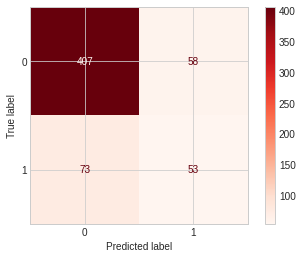

In [329]:
# Check Performance Model against Test-Set

y_pred_test = xgb_gridcv_best.predict(X_test_final_df)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(xgb_gridcv_best, X_test_final_df, y_test, cmap='Reds'))

In [330]:
# Save Classification Report into a Dictionary

score_reports_xgb_tuning = {
    'train - precision' : precision_score(y_train_balanced, xgb_gridcv_best.predict(X_train_balanced_final)),
    'train - recall' : recall_score(y_train_balanced, xgb_gridcv_best.predict(X_train_balanced_final)),
    'train - accuracy' : accuracy_score(y_train_balanced, xgb_gridcv_best.predict(X_train_balanced_final)),
    'train - f1_score' : f1_score(y_train_balanced, xgb_gridcv_best.predict(X_train_balanced_final)),
    'test - precision' : precision_score(y_test, y_pred_test),
    'test - recall' : recall_score(y_test, y_pred_test),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test),
    'test - f1_score' : f1_score(y_test, y_pred_test),
}
all_reports_xgb_tuning['Baseline (Grid Search)'] = score_reports_xgb_tuning
pd.DataFrame(all_reports_xgb_tuning)

,Baseline (XGB),Baseline (Random Search),Baseline (Grid Search)
train - precision,0.997828,0.999461,0.999461
train - recall,0.989236,0.998924,0.998924
train - accuracy,0.993541,0.999193,0.999193
train - f1_score,0.993514,0.999192,0.999192
test - precision,0.494737,0.490909,0.477477
test - recall,0.373016,0.428571,0.420635
test - accuracy_score,0.785110,0.783418,0.778342
test - f1_score,0.425339,0.457627,0.447257


#### ROC-AUC (All model)

In [331]:
# Get FPR, TPR, and AUC Score from XGB

y_pred_proba_xgb = xgb_gridcv_best.predict_proba(X_test_final_df)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

print('AUC Score : ', auc_xgb)

AUC Score :  0.7383341867212834


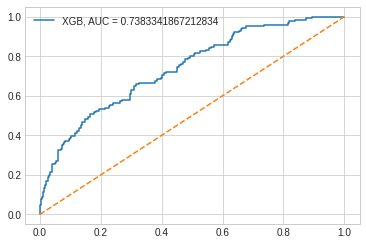

In [332]:
# Plot ROC-AUC Curve

plt.figure(0).clf()
plt.plot(fpr_xgb, tpr_xgb, label='XGB, AUC = ' + str(auc_xgb))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=0)

Berdasarkan `score reports model XGB` setelah dilakukan hyperparameter tuning baik dengan menggunakan `RandomSearchCV` dan `GridSearchCV`, keduanya menghasilkan performa model yang sama bagusnya. Dibuktikan dengan hasil f1-score pada data train yaitu `0.99` dan data test yaitu `0.45`. Terlihat bahwa setelah dilakukan hyperparameter tuning, f1-score mengalami kenaikan jika dibandingkan dengan f1-score sebelum dilakukan hyperparameter tuning (baseline model XGB) yang tadinya pada data train menunjukkan f1-score yaitu `0.99` dan data test yaitu `0.43`.

Dari sini kita tahu bahwa performansi model ini masih `overfit`.  Kondisi `overfit` ini dapat disebabkan salah satunya karena menggunakan teknik `feature engineering` yang kurang tepat atau bisa juga karena proporsi datanya yang harus ditambah untuk kelas 1, dan karna faktor lainnya. Tetapi karena terbatasnya waktu pengerjaan project, maka Saya tetap akan menggunakan model XGB dengan hyperparameter tuning `{'max_depth': 450, 'min_child_weight': 3, 'n_estimators': 241}` untuk memprediksi data inference di proses selanjutnya.<br>
- Berdasarkan classification report data train, hasilnya menunjukkan bahwa score f1-score yang dimiliki oleh label 1 adalah `0.99` sedangkan pada classification report data test menunjukkan scorenya adalah `0.45`. Artinya, bahwa model `XGBoost` ini `overfit` atau sederhananya model kita ini hanya bagus ketika di training saja, namun masih belum baik untuk memprediksi label 1 pada data test.
- Hal ini dapat dibuktikan dengan `confusion matrix`. Misalnya pada data test. Dapat dilihat bahwa `False Negative` dan `False Positive` tinggi. 
  1. `False Negative` terjadi ketika model `memprediksikan` bahwa seseorang `tidak menunggak`, padahal aktualnya orang ini menunggak pembayaran kredit. Model ini sudah melakukan salah prediksi sebanyak 73 orang.
  2. `False Positive` terjadi ketika model `memprediksikan` bahwa seseorang `menunggak pembayaran kredit`, padahal aktualnya orang ini tidak menunggak. Model ini sudah melakukan salah prediksi sebanyak 58 orang.
- Berbeda kondisinya dengan `confusion matrix`. Misalnya pada data train. Dapat dilihat bahwa `False Negative` dan `False Positive` rendah. 
  1. `False Negative` terjadi ketika model `memprediksikan` bahwa seseorang `tidak menunggak`, padahal aktualnya orang ini menunggak pembayaran kredit. Model ini sudah melakukan salah prediksi sebanyak 2 orang.
  2. `False Positive` terjadi ketika model `memprediksikan` bahwa seseorang `menunggak pembayaran kredit`, padahal aktualnya orang ini tidak menunggak. Model ini sudah melakukan salah prediksi sebanyak 1 orang.

# ix. Model Saving

>Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model.

In [333]:
# Save the Files of XGB after hyperparameter tuning

with open('xgb_gridcv_best.pkl', 'wb') as file_1:
  pickle.dump(xgb_gridcv_best, file_1)

with open('model_scaler1.pkl', 'wb') as file_2:
  pickle.dump(scaler1, file_2)

with open('model_scaler2.pkl', 'wb') as file_3:
  pickle.dump(scaler2, file_3)

with open('list_num_cols.txt', 'w') as file_4:
  json.dump(num_columns, file_4)

with open('list_cat_cols.txt', 'w') as file_5:
  json.dump(cat_columns, file_5)

# x. Model Inference

>Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

Pada bagian ini akan dilakukan proses model inference dengan menggunakan data `inference set` dan melakukan preprocessing yang sama seperti yang dilakukan sebelumnya **(tanpa proses handling outlier dan handling missing value)** serta melakukan prediksi terhadap data `inference-set`.

# xi. Pengambilan Kesimpulan

>Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

Berdasarkan proses **EDA** yang sudah dilakukan, kita memperoleh insight bahwa:
- Dari Univariate analysis: 
  1. Kebanyakan customer (sekitar 1.050 customer)memiliki limit kredit sekitar `NT$10.000 hingga NT$90.000`. Sedangkan customer yang memiliki limit kredit `di atas NT$550.000` sangat jarang terjadi.<br>
  2. Kebanyakan customer yang memiliki kartu kredit itu `Female` dengan hampir `61%` yaitu sebanyak `1.801` customer.<br>
  3. Sebagian besar customer memiliki level pendidikan tertinggi `education_level` sebagai `university` sekitar `47,23%` yaitu sebanyak `1.400` customer.<br>
  4. Sebagian besar customer memiliki status `Single` sekitar `53.78%` sebanyak `1.594` customer dan `Married` sekitar `44.91%` sebanyak `1.331` customer.<br>
  5. Kebanyakan customer dalam dataset ini berusia antara `25 dan 40 tahun`.<br>
  6. Kebanyakan customer yang memiliki `repayment status (pay_X)` setiap bulannya di nilai `0` yang berarti customer membayar tagihan kredit sesuai dengan jatuh tempo.<br>
  7. Kebanyakan customer yang memiliki `Amount of Bill Statement (bill_amt_X)` atau total tagihan kredit setiap bulannya `dibawah 100K`.<br>
  8. Kebanyakan customer yang memiliki `Amount of Previous Payment (pay_amt_X)` atau total pembayaran kredit sebelumnya `dibawah 10K`.<br>

- Dari Bivariate analysis:
  1. Ada tingkat customer default yang signifikan yaitu `(lebih dari 30%)` dari pelanggan dengan `limit kredit <=50K`. Dari sini dapat disimpulkan bahwa `semakin tinggi limit kreditnya, semakin rendah kemungkinan untuk default (gagal bayar)`.<br>
  2. Ada lebih banyak wanita daripada pria dalam dataset ini, namun tampaknya `pria` memiliki `peluang default (gagal bayar) yang sedikit lebih tinggi`.<br>
  3. Pendidikan yang tertinggi `(graduate_school)` memiliki `kemungkinan default (gagal bayar) yang lebih rendah`.<br>
  4. Orang yang sudah `Married` menunjukkan `lebih cenderung default (gagal bayar)`.<br>
  5. `kemungkinan customer default terendah` ada dalam rentang umur sekitar `25-30 tahun`.Sedangkan `kemungkinan customer default yang tertinggi` terjadi pada rentang umur `20-25, 40-50 dan 50-60 tahun`.<br>
  6. Customer yang memiliki `repayment status` di angka `1 hingga 8` itu memiliki `peluang default (gagal bayar) yang sangat tinggi`, yang artinya dalam rentang tersebut berarti customer menunggak pembayaran tagihan kredit.<br>
  7. Customer yang memiliki `total tagihan bernilai negatif` memiliki `kemungkinan default/gagal bayar yang lebih rendah` daripada yang lain.<br>
  8. `Customer yang tingkat default/gagal bayar tertinggi` berada diantara `mereka yang tidak membayar apa pun di bulan-bulan sebelumnya`.<br>

Berdasarkan **hasil evaluasi dari model** training dengan menggunakan parameter default (baseline model) pada data yang *balanced* menunjukkan bahwa mayoritas nilai f1-score menunjukkan nilai yang konsisten setelah dilakukan *cross validation*. Sehingga, Saya memilih algoritma terbaik dari data yang *balanced* dengan mempertimbangkan `mean` dan `std` dari setiap modelnya. Dari hasil *cross validation*, algoritma yang terbaik ditunjukkan oleh **`XGBoost`** dengan `mean score tertinggi` yaitu `0.87` dan `standar deviasi score yang rendah` yaitu `0.01`.<br>

Selanjutnya, Saya melakukan `Hyperparameter Tuning` pada model **`XGBoost`** dengan `Random Search` dan `Grid Search`. `Random Search` menghasilkan hyperparameter terbaik: `{'n_estimators': 266, 'min_child_weight': 3, 'max_depth': 450}` dan `Grid Search` menghasilkan hyperparameter terbaik: `{'max_depth': 450, 'min_child_weight': 3, 'n_estimators': 241}`. Namun keduanya menghasilkan evaluasi model yang hampir sama. Sehingga Saya memilih menggunakan hyperparameter dari `GridSearchCV`.<br> 
Berdasarkan hasil evaluasi model `XGBoost` menggunakan `accuracy score` menunjukkan bahwa accuracy score train (0.99) dan accuracy score test  (0.78), artinya model ini dapat dikatakan `overfit`.
- Berdasarkan classification report data train, hasilnya menunjukkan bahwa score f1-score yang dimiliki oleh label 1 adalah `0.99` sedangkan pada classification report data test menunjukkan scorenya adalah `0.45`. Artinya, bahwa model `XGBoost` ini `overfit` atau sederhananya model kita ini hanya bagus ketika di training saja, namun masih belum baik untuk memprediksi label 1 pada data test.
- Hal ini dapat dibuktikan dengan `confusion matrix`. Misalnya pada data test. Dapat dilihat bahwa `False Negative` dan `False Positive` tinggi. 
  1. `False Negative` terjadi ketika model `memprediksikan` bahwa seseorang `tidak menunggak`, padahal aktualnya orang ini menunggak pembayaran kredit. Model ini sudah melakukan salah prediksi sebanyak 73 orang.
  2. `False Positive` terjadi ketika model `memprediksikan` bahwa seseorang `menunggak pembayaran kredit`, padahal aktualnya orang ini tidak menunggak. Model ini sudah melakukan salah prediksi sebanyak 58 orang.
- Berbeda kondisinya dengan `confusion matrix`. Misalnya pada data train. Dapat dilihat bahwa `False Negative` dan `False Positive` rendah. 
  1. `False Negative` terjadi ketika model `memprediksikan` bahwa seseorang `tidak menunggak`, padahal aktualnya orang ini menunggak pembayaran kredit. Model ini sudah melakukan salah prediksi sebanyak 2 orang.
  2. `False Positive` terjadi ketika model `memprediksikan` bahwa seseorang `menunggak pembayaran kredit`, padahal aktualnya orang ini tidak menunggak. Model ini sudah melakukan salah prediksi sebanyak 1 orang.<br>

Melalui **percobaan model di data inference**, kita dapat mengetahui bagaimana keakuratan setiap model memprediksi apakah customer akan default pada kartu kreditnya. Kita melihat bahwa `ada 3 perbedaan` antara nilai aktual `default_payment` dengan `prediksi default_payment` menggunakan model XGB (dengan hyperparameter tuning). Interpretasinya yaitu model salah memprediksi bahwa seseorang `tidak menunggak pembayaran kredit`, padahal aktualnya orang ini `menunggak dan kartu kreditnya di blokir`.<br>
Pada proses evaluasi model sebelumnya, kita mendapatkan bahwa model yang memiliki performansi terbaik adalah `model XGB yang sudah dilakukan hyperparameter tuning`. Namun ternyata hasil evaluasi model yang didapat dibuktikan bahwa dari ke-10 data inference di atas, model ini ada melakukan kesalahan prediksi sebanyak `3 data` artinya `hanya 7 data dari 10 data yang ada` yang diprediksi benar oleh `model XGB yang sudah dilakukan hyperparameter tuning`. Sehingga, masih terus dibutuhkan *model improvement* untuk meningkatkan performa dari model ini.

# **Conceptual Problems**

## soal no.1

Apa yang dimaksud dengan `criterion` pada Decision Tree ? Jelaskan criterion yang kalian pakai dalam kasus ini !

`criterion` merupakan salah satu parameter yang terdapat pada model decision tree yang digunakan untuk memisahkan masing-masing atribut. <br>
`criterion` yang dipakai dalam kasus ini adalah `gini`. Gini mempunyai nilai antara `0 hingga 0,5`. Jika nilai gini semakin mendekati 0 atau `sama dengan (=0)` maka itu menandakan bahwa semakin tidak ada pembagian selanjutnya atau bisa dikatakan sudah menjadi leaf karena sudah `pure`/murni kelasnya.

## soal no.2

Jelaskan apa yang dimaksud dengan `pruning` pada Tree-based model (alasan, definisi, jenis, dll) !

Pada `Tree-based model` cenderung overfitting saat modeling. Dikarenakan `Tree-based model` akan selalu overfit pada data training jika kita membiarkannya mencapai max depthnya atau maksimal kedalamannya. Oleh karena itu, kita membutuhkan `pruning` untuk mengurangi terjadinya overfiting dengan menyederhanakan `Tree-based model` dengan cara menghapus aturan terlemah atau `the weekest rules`. Pruning menghentikan tree sebelum selesai mengklasifikasikan set training dan pruning memungkinkan tree untuk mengklasifikasikan set training dengan sempurna yang dilanjutkan dengan memangkas tree tersebut agar tidak terjadinya overfitting.

## soal no.3

Bagaimana cara memilih `K` yang optimal pada KNN ?

Dalam memilih `K` yang optimal pada KNN, yang perlu diperhatikan adalah `jumlah klasifikasi data`. Jika jumlah klasifikasi data `genap`, maka `K` yang optimal digunakan adalah `K` yang bernilai `ganjil` dan jika jumlah klasifikasi data `ganjil`, maka yang paling optimal yang digunakan adalah `K` yang bernilai `genap`. Hal ini bertujuan untuk menghindari kesamaan jarak data yang muncul saat model KNN di jalankan. Selain itu, cara untuk memilih nilai `K` secara optimal adalah dengan menggunakan `Elbow Method`.

## soal no.4

Jelaskan apa yang dimaksud dengan `Cross Validation` !

`Cross validation` merupakan teknik untuk mengecek/memvalidasi hasil evaluasi dari model, apakah performa dari model tersebut konsisten atau tidak. Teknik ini membagi train-set sebanyak k-folds berupa train-set dan validation-set. Dimana untuk k-1 folds nya akan ditraining, dan salah satu yang tersisa itu akan menjadi `validation-set` yang ditest. Diulang sebanyak k-times sampai semua folds merasakan menjadi `validation-set` yang ditest. Final performance metricnya adalah `rata-rata` yang terbesar dan `standar deviasi` yang terendah. 

## soal no.5

Apa yang dimaksud dengan metrics-metrics berikut : `Accuracy`, `Precision`, `Recall`, `F1 Score`, dan kapan waktu yang tepat untuk menggunakannya ?

- `Accuracy` merupakan matriks yang digunakan untuk melihat tingkat keakurasian atau seberapa tepat model itu dalam memprediksi. Kita dapat menggunakan metric ini jika data target yang kita punya itu `seimbang/balanced`.<br>
- `Precision` merupakan matriks perbandingan antara True Positive (TP) dengan banyaknya data yang diprediksi positif. Biasanya digunakan untuk melihat berapa banyak nilai peluang kemunculan hasil prediksi yang bernilai false positif (FP) pada suatu model. Semakin tinggi nilai presicion maka kemunculan false positif semakin kecil. Biasanya kita menggunakan matriks ini ketika kita ingin meminimalkan false positif (FP). Misalnya, kita ingin meminimalkan kesalahan model memprediksi seorang pasien terkena kanker, padahal pasien tidak terkena kanker.<br>
- `Recall` merupakan matriks perbandingan antara True Positive (TP) dengan banyaknya data yang sebenarnya positif. Biasanya digunakan untuk melihat berapa banyak nilai peluang kemunculan hasil prediksi yang bernilai false negatif (FN) pada suatu model. Semakin tinggi nilai recall maka kemunculan false negatif semakin kecil. Biasanya kita menggunakan matriks ini ketika kita ingin meminimalkan false negatif (FN). Misalnya, kita ingin meminimalkan kesalahan model memprediksi seorang pasien tidak terkena kanker, padahal pasien terkena kanker.<br>
- `F1 Score` adalah harmonic mean dari precision dan recall. Baik digunakan ketika mementingkan keduanya dan tidak ingin atau tidak tahu fokus kasus ini mau meminimalkan false positif atau negatif. Jadi biasanya kita menggunakan f1-score. 